# Business Understanding

Throughout the world there are many discrepancies for life expectancy between countries. This project aims to influence the United Nations (UN) and its 193 countries, on ways to improve life expectancy. Through the modeling of this project, recommendations will be made to increase life expectancy for all countries. Predicting variables that affect life expectancy, can assist any country and the UN in developing interventions to increase life expectancy.

# Data Understanding

The dataset is from the World Organization of Health (WHO). In the dataset there are 193 countries, or al the countries in the UN, which contains data from 2000-2015. There are 22 columns and 2928 rows. The target variable in this project will be life expectancy.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import SVDpp, Dataset, Reader
from surprise.model_selection import cross_validate
from collections import defaultdict
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import Dataset, Reader
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix



import os

# Define the folder path for the "lifeexpectancy" folder from Desktop
folder_path = os.path.join(os.path.expanduser("~"), "Desktop", "lifeexpectancy")
file_path = os.path.join(folder_path, 'Life Expectancy Data.csv')
# Check the number of rows in each DataFrame and display the first few rows with column names
# Load the dataset into a DataFrame
df = pd.read_csv(file_path)
# Print the names of the columns
print("Column Names:", df.columns.tolist())


Column Names: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


## Exploring the Data 

Columns were printed and described in the table below:

| Column Name                        | Description                           |
|------------------------------------|---------------------------------------|
| Country                            | Name of the country                   |
| Year                               | Calendar year of the data             |
| Status                             | Developed or Developing status        |
| Life expectancy                    | Life expectancy in age                |
| Adult Mortality                    | Adult mortality rates per 1000 population |
| Infant deaths                      | Number of infant deaths per 1000 population |
| Alcohol                            | Alcohol consumption per capita (liters) |
| Percentage expenditure             | Expenditure on health as a % of GDP per capita |
| Hepatitis B                        | Hepatitis B immunization coverage among 1-year-olds (%) |
| Measles                            | Number of reported measles cases per 1000 population |
| BMI                                | Average Body Mass Index of entire population |
| Under-five deaths                  | Number of under-five deaths per 1000 population |
| Polio                              | Polio immunization coverage among 1-year-olds (%) |
| Total expenditure                  | Government expenditure on health as a % of total government expenditure |
| Diphtheria                         | Diphtheria immunization coverage among 1-year-olds (%) |
| HIV/AIDS                           | Deaths per 1000 live births HIV/AIDS (0-4 years) |
| GDP                                | Gross Domestic Product per capita    |
| Population                         | Population of the country             |
| Thinness 1-19 years                | Prevalence of thinness among children and adolescents 10-19 years (%) |
| Thinness 5-9 years                 | Prevalence of thinness among children 5-9 years (%) |
| Income composition of resources    | Human Development Index in terms of income composition of resources |
| Schooling                          | Average number of years of schooling of the population |


In [2]:
# Print the first 10 rows
print(df.head(10))


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582       

In [3]:
# Print unique values in the "Country" column
unique_countries = df['Country'].unique()
print("Unique Countries:", unique_countries)
# Print the number of unique values directly
num_unique_countries = df['Country'].nunique()
print("Number of Unique Countries:", num_unique_countries)



Unique Countries: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Isl

In [4]:
# Print the actual column names
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


### Standardization 

This process removes spaces, and special characteristics to provide consistency and uniformity in column names, which can be helpful for data analysis, manipulation, and visualization tasks.

In [5]:
import pandas as pd

# Standardize column names: remove leading/trailing spaces, replace internal multiple spaces with a single space, and replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' +', ' ', regex=True).str.replace(' ', '_')

# Print cleaned column names to confirm changes
print(df.columns.tolist())



['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


## Exploring Life Expectancy

An initial review of the target variable was conducted to show the distribution of life expectancy in the entire dataset. The max amount of life expectancy was 89 years, while the minimum was 36 years. The average for the entire dataset was 69 years. However, there is a standard deviation of 9.5 years, indicating the distribution of life expectancy has a wide range across countries. 

The top 5 countries with the highest average life expectancy were Japan, Sweden, Iceland, Switzerland, and France. All of these countries had average life expectancies in the 80's. 

The bottom 5 countries with the lowest average life expectancy were Sierra Leone, Central African Republic, Lesotho, Angola, and Malawi. All of these countries had an average life expectancy in the 40's. 


In [6]:
# Print life expectancy distribution statistics
print("Life Expectancy Distribution:\n", df['Life_expectancy'].describe())


Life Expectancy Distribution:
 count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life_expectancy, dtype: float64


In [7]:
# Check for missing values in the 'Life expectancy' column
print("\nMissing Values in Life expectancy DataFrame:\n", df['Life_expectancy'].isnull().sum())

# Example of accessing another column without spacing issues
print("Adult Mortality Statistics:\n", df['Adult_Mortality'].describe())


Missing Values in Life expectancy DataFrame:
 10
Adult Mortality Statistics:
 count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult_Mortality, dtype: float64


In [8]:

# Compute average Life Expectancy by country
average_le_per_country = df.groupby('Country')['Life_expectancy'].mean()
# Count the number of Life Expectancy entries per country
le_per_country_distribution = df.groupby('Country')['Life_expectancy'].count()



In [9]:
# Display results for average life expectancy
print("Average Life Expectancy per Country:\n", average_le_per_country.describe())

# Display results for distribution of life expectancy entries per country
print("\nLife Expectancy Distribution per Country:\n", le_per_country_distribution.describe())


Average Life Expectancy per Country:
 count    183.000000
mean      69.224932
std        9.186432
min       46.112500
25%       62.475000
50%       72.487500
75%       75.106250
max       82.537500
Name: Life_expectancy, dtype: float64

Life Expectancy Distribution per Country:
 count    193.000000
mean      15.170984
std        3.555628
min        0.000000
25%       16.000000
50%       16.000000
75%       16.000000
max       16.000000
Name: Life_expectancy, dtype: float64


In [10]:
# Sort to find the top 5 countries with the highest average life expectancy
top_5_le_countries = average_le_per_country.sort_values(ascending=False).head(5)

# Sort to find the top 5 countries with the lowest average life expectancy
bottom_5_le_countries = average_le_per_country.sort_values(ascending=True).head(5)
# Display top 5 countries with highest life expectancy
print("Top 5 Countries with Highest Life Expectancy:\n", top_5_le_countries)

# Display bottom 5 countries with lowest life expectancy
print("Bottom 5 Countries with Lowest Life Expectancy:\n", bottom_5_le_countries)



Top 5 Countries with Highest Life Expectancy:
 Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Name: Life_expectancy, dtype: float64
Bottom 5 Countries with Lowest Life Expectancy:
 Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Name: Life_expectancy, dtype: float64


# Data preparation

## Life Expectancy

The initial step in the data preparation was to search for NAN values, and place holders in the life expectancy column.

There were 10 NaN values, upon further investigation as to what countries had these NaN values, Cook Islands, Dominica, Marshall Islands, Monaco, Nauru, Niue, Palau, Saint Kitts and Nevis, San Marino, and Tuvalu were identified. Further investigation into these countries, indicated substantial missing data in many columns for the year 2013. The decision was made to remove these 10 countries from further analysis for year 2013.

In [11]:
# Check for missing NaN values in the Life_expectancy column
na_count = df['Life_expectancy'].isnull().sum()
print("Number of NaN values in Life Expectancy:", na_count)

# Check for zeros or negative values in Life Expectancy which can be placeholders
placeholder_count = df[df['Life_expectancy'] <= 0]['Life_expectancy'].count()
print("Number of placeholder values in Life Expectancy (zeros or negatives):", placeholder_count)

# Print statistical summary for the Life Expectancy column
print("Statistical Summary for Life Expectancy:\n", df['Life_expectancy'].describe())



Number of NaN values in Life Expectancy: 10
Number of placeholder values in Life Expectancy (zeros or negatives): 0
Statistical Summary for Life Expectancy:
 count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life_expectancy, dtype: float64


In [12]:
import pandas as pd

# Filter to show rows where Life Expectancy is NaN
missing_life_expectancy = df[df['Life_expectancy'].isnull()]

# Display rows with missing Life Expectancy values
print("Rows with Missing Life Expectancy Values:\n", missing_life_expectancy[['Country', 'Year', 'Status', 'GDP', 'Population']])


Rows with Missing Life Expectancy Values:
                     Country  Year      Status          GDP  Population
624            Cook Islands  2013  Developing          NaN         NaN
769                Dominica  2013  Developing   722.756650         NaN
1650       Marshall Islands  2013  Developing  3617.752354         NaN
1715                 Monaco  2013  Developing          NaN         NaN
1812                  Nauru  2013  Developing   136.183210         NaN
1909                   Niue  2013  Developing          NaN         NaN
1958                  Palau  2013  Developing  1932.122370       292.0
2167  Saint Kitts and Nevis  2013  Developing          NaN         NaN
2216             San Marino  2013  Developing          NaN         NaN
2713                 Tuvalu  2013  Developing  3542.135890      1819.0


In [13]:
countries_of_interest = [
    "Cook Islands", "Dominica", "Marshall Islands", "Monaco", "Nauru", 
    "Niue", "Palau", "Saint Kitts and Nevis", "San Marino", "Tuvalu"
]

In [14]:
# Check all data available for the specified countries
all_data_for_countries = df[df['Country'].isin(countries_of_interest)]
print("All Available Data for Selected Countries:\n", all_data_for_countries[['Country', 'Year', 'Status', 'Life_expectancy', 'GDP', 'Population']])


All Available Data for Selected Countries:
                     Country  Year      Status  Life_expectancy          GDP  \
624            Cook Islands  2013  Developing              NaN          NaN   
769                Dominica  2013  Developing              NaN   722.756650   
1650       Marshall Islands  2013  Developing              NaN  3617.752354   
1715                 Monaco  2013  Developing              NaN          NaN   
1812                  Nauru  2013  Developing              NaN   136.183210   
1909                   Niue  2013  Developing              NaN          NaN   
1958                  Palau  2013  Developing              NaN  1932.122370   
2167  Saint Kitts and Nevis  2013  Developing              NaN          NaN   
2216             San Marino  2013  Developing              NaN          NaN   
2713                 Tuvalu  2013  Developing              NaN  3542.135890   

      Population  
624          NaN  
769          NaN  
1650         NaN  
1715      

In [15]:
countries_to_remove = ["Cook Islands", "Dominica", "Marshall Islands", "Monaco", 
                       "Nauru", "Niue", "Palau", "Saint Kitts and Nevis", 
                       "San Marino", "Tuvalu"]

# Filter out the rows where the 'Country' is in the list of countries to remove and the 'Year' is 2013
df_cleaned = df[~((df['Country'].isin(countries_to_remove)) & (df['Year'] == 2013))]


In [16]:
print(df_cleaned[df_cleaned['Year'] == 2013])


                                 Country  Year      Status  Life_expectancy  \
2                            Afghanistan  2013  Developing             59.9   
18                               Albania  2013  Developing             77.2   
34                               Algeria  2013  Developing             75.3   
50                                Angola  2013  Developing             51.1   
66                   Antigua and Barbuda  2013  Developing             76.1   
...                                  ...   ...         ...              ...   
2860  Venezuela (Bolivarian Republic of)  2013  Developing             73.8   
2876                            Viet Nam  2013  Developing             75.7   
2892                               Yemen  2013  Developing             65.4   
2908                              Zambia  2013  Developing             63.0   
2924                            Zimbabwe  2013  Developing             58.0   

      Adult_Mortality  infant_deaths  Alcohol  perc

In [17]:
# Get the number of unique countries in the original DataFrame
num_unique_countries_original = df_cleaned['Country'].nunique()

# Print the number of unique countries
print("Number of unique countries in df_cleaned:", num_unique_countries_original)


Number of unique countries in df_cleaned: 183


In [18]:
# Count the number of NaN values in each column of the cleaned DataFrame
nan_counts = df_cleaned.isnull().sum()
print("Number of NaNs in each column:\n", nan_counts)


Number of NaNs in each column:
 Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            193
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 32
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness_1-19_years                 32
thinness_5-9_years                  32
Income_composition_of_resources    160
Schooling                          160
dtype: int64


## Alcohol Column
The Alcohol column was investigated next, and the data indicated there were 193 missing rows. 
The names of the countries with missing low, or NaN values were printed out, and many countries on the list in fact do drink Alcohol. This raised alarm, and deeper examination was needed. Using data from all years, the mean was calculated by country for Alcohol. After this all NaN values in the corresponding countries, had the NaN or placeholder replaced with the average amount of Alcohol consumed over the 15 year period.

After replacing the NaN's, there was only one country that did not have any information regarding Alcohol. Upon further investigation, that country was South Sudan, and this country was missing data from multiple columns. For this reason Sudan was removed from the dataset.

The average amount of Alcohol consumed by all countries was 4.61 liters per capita. The bar chart indicated a high amount of countries with 0.00 liters The standard deviation of 4.05 indicated that there was a wide range of possibilities. The max amount if liters per capita was 17.87, while the least amount was 0.01 liters.


Statistical summary of Alcohol data:
 count    2735.000000
mean        4.614856
std         4.050749
min         0.010000
25%         0.905000
50%         3.770000
75%         7.715000
max        17.870000
Name: Alcohol, dtype: float64


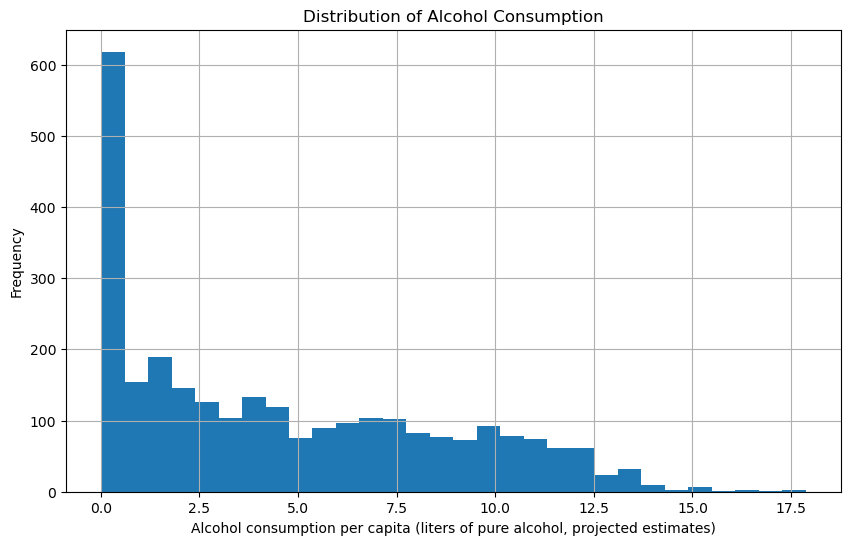

In [19]:
# Get a statistical summary of the Alcohol column
print("Statistical summary of Alcohol data:\n", df_cleaned['Alcohol'].describe())

# Visualizing the distribution of the Alcohol column
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_cleaned['Alcohol'].hist(bins=30)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol consumption per capita (liters of pure alcohol, projected estimates)')
plt.ylabel('Frequency')
plt.show()


In [20]:
nan_alcohol = df_cleaned[df_cleaned['Alcohol'].isnull()]
countries_with_nan_alcohol = nan_alcohol['Country'].unique()
print("Countries with NaN alcohol consumption:")
print(countries_with_nan_alcohol)


Countries with NaN alcohol consumption:
['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'I

In [21]:
# Filter the DataFrame for Argentina
argentina_data = df_cleaned[df_cleaned['Country'] == 'Argentina']

# Display data for Argentina across all years
print(argentina_data)


      Country  Year      Status  Life_expectancy  Adult_Mortality  \
80  Argentina  2015  Developing             76.3            116.0   
81  Argentina  2014  Developing             76.2            118.0   
82  Argentina  2013  Developing             76.0            119.0   
83  Argentina  2012  Developing             75.9             12.0   
84  Argentina  2011  Developing             75.7             12.0   
85  Argentina  2010  Developing             75.5            121.0   
86  Argentina  2009  Developing             75.6            126.0   
87  Argentina  2008  Developing             75.4            126.0   
88  Argentina  2007  Developing             74.8            129.0   
89  Argentina  2006  Developing             75.2            127.0   
90  Argentina  2005  Developing             74.9            127.0   
91  Argentina  2004  Developing             74.7             13.0   
92  Argentina  2003  Developing             74.1            137.0   
93  Argentina  2002  Developing   

In [22]:
# Calculate the mean alcohol consumption for each country and replace NaN values with the respective country's mean
df_cleaned['Alcohol'] = df_cleaned.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(x.mean()))

# Check if there are any NaN values left in the 'Alcohol' column after this operation
remaining_nans = df_cleaned['Alcohol'].isnull().sum()
print("Remaining NaNs in Alcohol column after country-specific mean imputation:", remaining_nans)


Remaining NaNs in Alcohol column after country-specific mean imputation: 16


/var/folders/6j/s4t4t49n5ns3bwtzvg_ys6xw0000gn/T/ipykernel_71415/1219539779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Alcohol'] = df_cleaned.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(x.mean()))


In [23]:
# Identify countries that still have NaN values after mean imputation
countries_with_remaining_nans = df_cleaned[df_cleaned['Alcohol'].isnull()]['Country'].unique()

# Display these countries and the count of their NaN values
nan_values_per_country = df_cleaned[df_cleaned['Alcohol'].isnull()].groupby('Country').size()

print("Countries with remaining NaNs in Alcohol column and their counts:")
print(nan_values_per_country)


Countries with remaining NaNs in Alcohol column and their counts:
Country
South Sudan    16
dtype: int64


In [24]:
# Filter the DataFrame for South Sudan
south_sudan_data = df_cleaned[df_cleaned['Country'] == 'South Sudan']

# Display data for South Sudanacross all years
print(south_sudan_data)


          Country  Year      Status  Life_expectancy  Adult_Mortality  \
2409  South Sudan  2015  Developing             57.3            332.0   
2410  South Sudan  2014  Developing             56.6            343.0   
2411  South Sudan  2013  Developing             56.4            345.0   
2412  South Sudan  2012  Developing             56.0            347.0   
2413  South Sudan  2011  Developing             55.4            355.0   
2414  South Sudan  2010  Developing             55.0            359.0   
2415  South Sudan  2009  Developing             54.3            369.0   
2416  South Sudan  2008  Developing             53.6            377.0   
2417  South Sudan  2007  Developing             53.1            381.0   
2418  South Sudan  2006  Developing             52.5            383.0   
2419  South Sudan  2005  Developing             51.9            383.0   
2420  South Sudan  2004  Developing             51.4            383.0   
2421  South Sudan  2003  Developing             58.

In [25]:
# Remove rows where the 'Country' is 'South Sudan'
df_cleaned = df_cleaned[df_cleaned['Country'] != 'South Sudan']

# Confirm that rows corresponding to South Sudan have been removed
print("Data for South Sudan has been removed: ")
print(df_cleaned[df_cleaned['Country'] == 'South Sudan'])


Data for South Sudan has been removed: 
Empty DataFrame
Columns: [Country, Year, Status, Life_expectancy, Adult_Mortality, infant_deaths, Alcohol, percentage_expenditure, Hepatitis_B, Measles, BMI, under-five_deaths, Polio, Total_expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness_1-19_years, thinness_5-9_years, Income_composition_of_resources, Schooling]
Index: []

[0 rows x 22 columns]


## Hepatitis B

There were 538 NaN values for Hepatitis B.

For countries with exactly one year of missing data, the missing values were changed using the mean of available years. Ten countries, including Antigua and Barbuda, Australia, Bahamas, and others, had their missing data replaced with the mean Hepatitis B value calculated from available years.

After review, there were still issues with the data. Some of the values seemed to small as compared to the rest of the years avaliability Outliers in the Hepatitis B data were detected using a rolling window approach. Outliers were defined as data points with a percentage difference from the rolling mean exceeding a threshold of 20%. Detected outliers were replaced with NaN values and then replaced with the mean of surrounding data points for that specfic country. 

There were many countires with low Hepatitis B rates, research was done and indicated that many countries in Europe indeed do not vaccinate for Hepatits B. 

In [26]:
# Count NaN values in the Hepatitis_B column
hep_b_nans = df_cleaned['Hepatitis_B'].isnull().sum()
print("Number of NaN values in the Hepatitis_B column:", hep_b_nans)


Number of NaN values in the Hepatitis_B column: 538


In [27]:
# Print statistical summary for the Hepatitis_B column
print("Statistical Summary for Hepatitis_B:\n", df_cleaned['Hepatitis_B'].describe())


Statistical Summary for Hepatitis_B:
 count    2374.000000
mean       80.981887
std        25.002572
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis_B, dtype: float64


In [28]:
# Find the rows where the 'Hepatitis_B' value is NaN
nan_hep_b_rows = df_cleaned[df_cleaned['Hepatitis_B'].isnull()]

# Get the unique list of countries with NaN values for Hepatitis B
countries_with_nan_hep_b = nan_hep_b_rows['Country'].unique()

print("Countries with NaN values for Hepatitis B:")
print(countries_with_nan_hep_b)


Countries with NaN values for Hepatitis B:
['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Benin'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Burundi' "Côte d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'Comoros' 'Congo' 'Croatia' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'Gabon'
 'Ghana' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Jamaica' 'Japan' 'Kenya'
 "Lao People's Democratic Republic" 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Malta' 'Mauritania' 'Montenegro' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Netherlands' 'Niger' 'Nigeria' 'Norway' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Russian Federation' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and 

In [29]:
# Group by Country and Year, then count NaN values in Hepatitis_B for each group
hep_b_nans_by_country_year = df_cleaned.groupby(['Country', 'Year'])['Hepatitis_B'].apply(lambda x: x.isnull().sum()).reset_index(name='NaN_Count')

# Filter the DataFrame to show only rows where NaN_Count > 0
hep_b_nans_by_country_year = hep_b_nans_by_country_year[hep_b_nans_by_country_year['NaN_Count'] > 0]

# Count the number of years each country has missing data
years_missing_data = hep_b_nans_by_country_year.groupby('Country').size().reset_index(name='Years with NaN')

# Filter to find countries with exactly one year of missing data
one_year_missing_data = years_missing_data[years_missing_data['Years with NaN'] == 1]

print("Countries with exactly one year of missing Hepatitis B data:")
print(one_year_missing_data)


Countries with exactly one year of missing Hepatitis B data:
                Country  Years with NaN
2   Antigua and Barbuda               1
4             Australia               1
6               Bahamas               1
8              Barbados               1
24        Côte d'Ivoire               1
36              Grenada               1
40               Guyana               1
58           Mozambique               1
67               Panama               1
70   Russian Federation               1


In [30]:
# List of selected countries with only one year of missing Hepatitis B data
selected_countries = ["Antigua and Barbuda", "Australia", "Bahamas", "Barbados",
                      "Côte d'Ivoire", "Grenada", "Guyana", "Mozambique", 
                      "Panama", "Russian Federation"]

# Impute missing Hepatitis B data for selected countries using mean of available years
for country in selected_countries:
    # Calculate the mean for the country excluding NaN values
    mean_hep_b = df_cleaned[df_cleaned['Country'] == country]['Hepatitis_B'].mean()
    # Impute missing values with the calculated mean
    df_cleaned.loc[(df_cleaned['Country'] == country) & (df_cleaned['Hepatitis_B'].isnull()), 'Hepatitis_B'] = mean_hep_b

# Check if imputation was successful
for country in selected_countries:
    missing_count = df_cleaned[(df_cleaned['Country'] == country) & (df_cleaned['Hepatitis_B'].isnull())].shape[0]
    print(f"Remaining missing Hepatitis B data for {country}: {missing_count}")


Remaining missing Hepatitis B data for Antigua and Barbuda: 0
Remaining missing Hepatitis B data for Australia: 0
Remaining missing Hepatitis B data for Bahamas: 0
Remaining missing Hepatitis B data for Barbados: 0
Remaining missing Hepatitis B data for Côte d'Ivoire: 0
Remaining missing Hepatitis B data for Grenada: 0
Remaining missing Hepatitis B data for Guyana: 0
Remaining missing Hepatitis B data for Mozambique: 0
Remaining missing Hepatitis B data for Panama: 0
Remaining missing Hepatitis B data for Russian Federation: 0


In [31]:
# Display the updated Hepatitis B data for verification
for country in selected_countries:
    updated_data = df_cleaned[df_cleaned['Country'] == country]
    print(f"Updated Hepatitis B data for {country}:\n", updated_data[['Country', 'Year', 'Hepatitis_B']])


Updated Hepatitis B data for Antigua and Barbuda:
                 Country  Year  Hepatitis_B
64  Antigua and Barbuda  2015    99.000000
65  Antigua and Barbuda  2014    99.000000
66  Antigua and Barbuda  2013    99.000000
67  Antigua and Barbuda  2012    98.000000
68  Antigua and Barbuda  2011    99.000000
69  Antigua and Barbuda  2010    98.000000
70  Antigua and Barbuda  2009    98.000000
71  Antigua and Barbuda  2008    98.000000
72  Antigua and Barbuda  2007    97.000000
73  Antigua and Barbuda  2006    99.000000
74  Antigua and Barbuda  2005    99.000000
75  Antigua and Barbuda  2004    97.000000
76  Antigua and Barbuda  2003    99.000000
77  Antigua and Barbuda  2002    99.000000
78  Antigua and Barbuda  2001    96.000000
79  Antigua and Barbuda  2000    98.266667
Updated Hepatitis B data for Australia:
        Country  Year  Hepatitis_B
112  Australia  2015         93.0
113  Australia  2014         91.0
114  Australia  2013         91.0
115  Australia  2012         91.0
116  Au

In [32]:
# Identifying countries with all NaN values for Hepatitis B
countries_total_nan = df_cleaned.groupby('Country')['Hepatitis_B'].apply(lambda x: x.isnull().all())
countries_with_all_nan = countries_total_nan[countries_total_nan].index.tolist()

print("Countries with all Hepatitis B data as NaN:", countries_with_all_nan)


Countries with all Hepatitis B data as NaN: ['Denmark', 'Finland', 'Hungary', 'Iceland', 'Japan', 'Norway', 'Slovenia', 'Switzerland', 'United Kingdom of Great Britain and Northern Ireland']


In [33]:
def detect_and_replace_outliers(df, column_name, window=3, threshold=20):
    """
    Detects outliers in a pandas series and replaces them with NaN.
    It then imputes these NaNs with the mean of surrounding data points.
    
    :param df: DataFrame
    :param column_name: column to check for outliers
    :param window: rolling window size
    :param threshold: percentage difference from rolling mean to consider as outlier
    """
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        rolling_mean = country_data[column_name].rolling(window, min_periods=1, center=True).mean()
        
        # Find where the absolute percent difference from the rolling mean exceeds the threshold
        outliers = country_data[(abs(country_data[column_name] - rolling_mean) / rolling_mean * 100) > threshold]
        
        # Set outliers to NaN
        df.loc[outliers.index, column_name] = np.nan
        
        # Impute NaN values with the mean of available data (not considering outliers)
        mean_val = df.loc[df['Country'] == country, column_name].mean()
        df.loc[df['Country'] == country, column_name] = df.loc[df['Country'] == country, column_name].fillna(mean_val)

# Example usage on 'Hepatitis_B'
detect_and_replace_outliers(df_cleaned, 'Hepatitis_B')


In [34]:
for country in df_cleaned['Country'].unique():
    print(country, df_cleaned[df_cleaned['Country'] == country][['Year', 'Hepatitis_B']])


Afghanistan     Year  Hepatitis_B
0   2015         65.0
1   2014         62.0
2   2013         64.0
3   2012         67.0
4   2011         68.0
5   2010         66.0
6   2009         63.0
7   2008         64.0
8   2007         63.0
9   2006         64.0
10  2005         66.0
11  2004         67.0
12  2003         65.0
13  2002         64.0
14  2001         63.0
15  2000         62.0
Albania     Year  Hepatitis_B
16  2015         99.0
17  2014         98.0
18  2013         99.0
19  2012         99.0
20  2011         99.0
21  2010         99.0
22  2009         98.0
23  2008         99.0
24  2007         98.0
25  2006         98.0
26  2005         98.0
27  2004         99.0
28  2003         97.0
29  2002         96.0
30  2001         96.0
31  2000         96.0
Algeria     Year  Hepatitis_B
32  2015       95.000
33  2014       95.000
34  2013       95.000
35  2012       95.000
36  2011       95.000
37  2010       95.000
38  2009       94.000
39  2008       93.125
40  2007       93.125
41  

In [35]:
# Print statistical summary for the Hepatitis_B column
print("Statistical Summary for Hepatitis_B:\n", df_cleaned['Hepatitis_B'].describe())


Statistical Summary for Hepatitis_B:
 count    2752.000000
mean       84.500288
std        16.700701
min         2.000000
25%        78.000000
50%        91.000000
75%        96.000000
max        99.000000
Name: Hepatitis_B, dtype: float64


In [36]:
# Filter rows where Hepatitis_B value is 10 or less
low_hepatitis_b = df_cleaned[df_cleaned['Hepatitis_B'] <= 40]

# Display country name and years for those rows
print("Rows with Hepatitis_B value of 10 or less:")
print(low_hepatitis_b[['Country', 'Year', 'Hepatitis_B']])


Rows with Hepatitis_B value of 10 or less:
      Country  Year  Hepatitis_B
143   Austria  2000         33.0
254   Belgium  2001          6.0
255   Belgium  2000          6.0
498    Canada  2013         29.5
499    Canada  2012         29.5
...       ...   ...          ...
2730  Ukraine  2015         22.0
2902    Yemen  2003         38.0
2903    Yemen  2002         31.0
2904    Yemen  2001         19.0
2905    Yemen  2000         14.0

[72 rows x 3 columns]


In [37]:
# Extract unique country names from the filtered DataFrame
unique_countries = low_hepatitis_b['Country'].unique()

# Display unique country names
print("Unique countries with Hepatitis_B value of 10 or less:")
print(unique_countries)


Unique countries with Hepatitis_B value of 10 or less:
['Austria' 'Belgium' 'Canada' 'Chad' 'Congo' 'France' 'Gabon' 'Ghana'
 'India' 'Montenegro' 'Myanmar' 'Nepal' 'Netherlands' 'New Zealand'
 'Nigeria' 'Samoa' 'Tajikistan' 'Trinidad and Tobago' 'Ukraine' 'Yemen']


In [38]:
# Filter DataFrame for the countries with Hepatitis_B value of 10 or less
filtered_countries = df_cleaned[df_cleaned['Country'].isin(unique_countries)]

# Display entire dataset for Hepatitis_B for the filtered countries
print("Entire dataset for Hepatitis_B across all available years for the selected countries:")
print(filtered_countries[['Country', 'Year', 'Hepatitis_B']])


Entire dataset for Hepatitis_B across all available years for the selected countries:
      Country  Year  Hepatitis_B
128   Austria  2015    93.000000
129   Austria  2014    98.000000
130   Austria  2013    95.000000
131   Austria  2012    92.000000
132   Austria  2011    89.000000
...       ...   ...          ...
2901    Yemen  2004    58.615385
2902    Yemen  2003    38.000000
2903    Yemen  2002    31.000000
2904    Yemen  2001    19.000000
2905    Yemen  2000    14.000000

[320 rows x 3 columns]


In [39]:
# Group the filtered DataFrame by country
grouped_countries = filtered_countries.groupby('Country')

# Iterate over each group to display the Hepatitis_B values for all years
for country, data in grouped_countries:
    print(country)
    print(data[['Year', 'Hepatitis_B']])
    print()


Austria
     Year  Hepatitis_B
128  2015         93.0
129  2014         98.0
130  2013         95.0
131  2012         92.0
132  2011         89.0
133  2010         86.0
134  2009         83.0
135  2008         83.0
136  2007         85.0
137  2006         83.0
138  2005         86.0
139  2004         83.0
140  2003         83.0
141  2002         81.0
142  2001         44.0
143  2000         33.0

Belgium
     Year  Hepatitis_B
240  2015    98.000000
241  2014    98.000000
242  2013    98.000000
243  2012    98.000000
244  2011    97.000000
245  2010    97.000000
246  2009    97.000000
247  2008    98.000000
248  2007    94.000000
249  2006    94.000000
250  2005    77.000000
251  2004    64.000000
252  2003    80.142857
253  2002    80.142857
254  2001     6.000000
255  2000     6.000000

Canada
     Year  Hepatitis_B
496  2015         55.0
497  2014         55.0
498  2013         29.5
499  2012         29.5
500  2011         29.5
501  2010         29.5
502  2009         42.0
503  2008

# BMI

BMI was dropped due because the data was unreliable. there were many NaN's as well as questionable values. For instance in 2015 the country Congo indicated that the BMI was 8, while in 2014 the BMI was 55. The mean BMI was 85, which would indicate the world was extremely obese.

In [40]:
# Compute descriptive statistics for BMI column
bmi_stats = df_cleaned['BMI'].describe()

# Display the descriptive statistics
print("Descriptive statistics for BMI:")
print(bmi_stats)


Descriptive statistics for BMI:
count    2896.000000
mean       38.235394
std        19.959590
min         1.000000
25%        19.300000
50%        43.350000
75%        56.100000
max        77.600000
Name: BMI, dtype: float64


In [41]:
# Filter DataFrame for BMI values greater than 50
high_bmi_countries = df_cleaned[df_cleaned['BMI'] > 50]

# Count the number of unique countries in the filtered dataset
num_unique_countries = high_bmi_countries['Country'].nunique()

# Display the number of unique countries with a BMI value over 50
print("Number of unique countries with a BMI value over 50:", num_unique_countries)


Number of unique countries with a BMI value over 50: 96


In [42]:
# Extract unique countries with BMI values over 50
unique_high_bmi_countries = high_bmi_countries['Country'].unique()

# Display the list of unique countries with a BMI value over 50
print("List of unique countries with a BMI value over 50:")
print(unique_high_bmi_countries)


List of unique countries with a BMI value over 50:
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Brazil'
 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Honduras' 'Hungary' 'Iceland' 'Iran (Islamic Republic of)'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kiribati' 'Kuwait' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg'
 'Malta' 'Mexico' 'Micronesia (Federated States of)' 'Mongolia'
 'Montenegro' 'Morocco' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Republic of Moldova'
 'Romania' 'Russian Federation' 'Saint Vincent and the Grenadines' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Slovakia' 'Sloven

In [43]:
# Filter DataFrame for countries with BMI values over 50
high_bmi_countries_data = df_cleaned[df_cleaned['Country'].isin(unique_high_bmi_countries)]

# Display BMI values for the selected countries by year
print("BMI values for countries with BMI over 50 by year:")
print(high_bmi_countries_data[['Country', 'Year', 'BMI']])


BMI values for countries with BMI over 50 by year:
                                 Country  Year   BMI
16                               Albania  2015  58.0
17                               Albania  2014  57.2
18                               Albania  2013  56.5
19                               Albania  2012  55.8
20                               Albania  2011  55.1
...                                  ...   ...   ...
2869  Venezuela (Bolivarian Republic of)  2004  55.9
2870  Venezuela (Bolivarian Republic of)  2003  55.3
2871  Venezuela (Bolivarian Republic of)  2002  54.7
2872  Venezuela (Bolivarian Republic of)  2001  54.1
2873  Venezuela (Bolivarian Republic of)  2000  53.4

[1536 rows x 3 columns]


In [44]:
# Select four countries with BMI values over 50
selected_countries = ['Albania', 'Argentina', 'Australia', 'Austria']

# Filter DataFrame for the selected countries
selected_countries_data = df_cleaned[df_cleaned['Country'].isin(selected_countries)]

# Display BMI values for the selected countries by year
print("BMI values for selected countries across all available years:")
print(selected_countries_data[['Country', 'Year', 'BMI']])


BMI values for selected countries across all available years:
     Country  Year   BMI
16   Albania  2015  58.0
17   Albania  2014  57.2
18   Albania  2013  56.5
19   Albania  2012  55.8
20   Albania  2011  55.1
..       ...   ...   ...
139  Austria  2004  52.2
140  Austria  2003  51.7
141  Austria  2002  51.2
142  Austria  2001   5.6
143  Austria  2000   5.1

[64 rows x 3 columns]


In [45]:
# Drop the 'BMI' column from the DataFrame
df_cleaned = df_cleaned.drop(columns=['BMI'])

# Confirm that the 'BMI' column has been dropped
print(df_cleaned.head())


       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0             

## Total Expenditure

The Total Expenditure column was missing 213 values. In order to fairly replace the NaN values, a technique was used to replace missing values with the mean expenditure value of the corresponding country. This ensures that missing data is replaced with reasonable estimates based on the available data for each country. After replacing these values, there were still 32 missing values. Upon further investigation, the data was from two countries the Democratic People's Republic of Korea(North Korea) and Somalia.

Upon further investigation, both of these countries were missing data from many columns. Both North Korea and Somalia are considered blackout countries, where access to accurate and reliable data is limited or non-existent. Given the challenges associated with obtaining trustworthy data from these countries, and the unreliability of the available data, it was decided to remove them from the dataset.

The descriptive statistics for total expenditure on health reveal some interesting insights. With a mean of approximately 5.93% of total government expenditure allocated to healthcare, there's variation across countries, ranging from a minimum of 0.37% to a maximum of 17.6%. This indicates differing priorities and resource allocations in healthcare systems worldwide.



In [46]:
# Compute descriptive statistics for Total_expenditure column
total_expenditure_stats = df_cleaned['Total_expenditure'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Total_expenditure:")
print(total_expenditure_stats)



Descriptive statistics for Total_expenditure:
count    2699.000000
mean        5.933742
std         2.482328
min         0.370000
25%         4.260000
50%         5.760000
75%         7.495000
max        17.600000
Name: Total_expenditure, dtype: float64


In [47]:
# Count the number of NaN values in the Total_expenditure column
total_expenditure_nan_count = df_cleaned['Total_expenditure'].isna().sum()

# Display the number of NaN values
print("Number of NaN values in the Total_expenditure column:", total_expenditure_nan_count)


Number of NaN values in the Total_expenditure column: 213


In [48]:
# Filter DataFrame for rows where Total_expenditure is NaN
missing_total_expenditure_data = df_cleaned[df_cleaned['Total_expenditure'].isna()]

# Display the countries where Total_expenditure values are missing
print("Countries with missing Total_expenditure values:")
print(missing_total_expenditure_data['Country'])


Countries with missing Total_expenditure values:
32                                 Algeria
48                                  Angola
64                     Antigua and Barbuda
80                               Argentina
96                                 Armenia
                       ...                
2858    Venezuela (Bolivarian Republic of)
2874                              Viet Nam
2890                                 Yemen
2906                                Zambia
2922                              Zimbabwe
Name: Country, Length: 213, dtype: object


In [49]:
# Count the number of missing Total_expenditure values for each year
missing_by_year = missing_total_expenditure_data.groupby('Year').size()

# Display the distribution of missing values by year
print("Distribution of missing Total_expenditure values by year:")
print(missing_by_year)


Distribution of missing Total_expenditure values by year:
Year
2000      3
2001      3
2002      3
2003      2
2004      2
2005      2
2006      2
2007      2
2008      2
2009      2
2010      2
2011      2
2012      2
2013      2
2014      2
2015    180
dtype: int64


In [50]:
# Compute the mean Total_expenditure for each country
mean_total_expenditure_by_country = df_cleaned.groupby('Country')['Total_expenditure'].mean()

# Fill missing Total_expenditure values with the mean values for each country
df_cleaned['Total_expenditure'] = df_cleaned.apply(lambda row: mean_total_expenditure_by_country[row['Country']] if pd.isna(row['Total_expenditure']) else row['Total_expenditure'], axis=1)

# Confirm that missing values have been filled
print("Number of NaN values in the Total_expenditure column after imputation:", df_cleaned['Total_expenditure'].isna().sum())


Number of NaN values in the Total_expenditure column after imputation: 32


In [51]:
# Filter DataFrame for rows where Total_expenditure is still NaN
remaining_missing_data = df_cleaned[df_cleaned['Total_expenditure'].isna()]

# Display the countries where Total_expenditure values are still missing
print("Countries with remaining missing Total_expenditure values:")
print(remaining_missing_data['Country'])


Countries with remaining missing Total_expenditure values:
705     Democratic People's Republic of Korea
706     Democratic People's Republic of Korea
707     Democratic People's Republic of Korea
708     Democratic People's Republic of Korea
709     Democratic People's Republic of Korea
710     Democratic People's Republic of Korea
711     Democratic People's Republic of Korea
712     Democratic People's Republic of Korea
713     Democratic People's Republic of Korea
714     Democratic People's Republic of Korea
715     Democratic People's Republic of Korea
716     Democratic People's Republic of Korea
717     Democratic People's Republic of Korea
718     Democratic People's Republic of Korea
719     Democratic People's Republic of Korea
720     Democratic People's Republic of Korea
2377                                  Somalia
2378                                  Somalia
2379                                  Somalia
2380                                  Somalia
2381                 

In [52]:
# Filter DataFrame for the countries of interest
countries_of_interest = ['Democratic People\'s Republic of Korea', 'Somalia']
country_data = df_cleaned[df_cleaned['Country'].isin(countries_of_interest)]

# Check for missing data across all columns
missing_data_summary = country_data.isnull().sum()

# Display the summary of missing data
print("Summary of missing data for the selected countries:")
print(missing_data_summary)


Summary of missing data for the selected countries:
Country                             0
Year                                0
Status                              0
Life_expectancy                     0
Adult_Mortality                     0
infant_deaths                       0
Alcohol                             0
percentage_expenditure              0
Hepatitis_B                         0
Measles                             0
under-five_deaths                   0
Polio                               0
Total_expenditure                  32
Diphtheria                          0
HIV/AIDS                            0
GDP                                29
Population                         32
thinness_1-19_years                 0
thinness_5-9_years                  0
Income_composition_of_resources    32
Schooling                          32
dtype: int64


In [53]:
# Drop rows corresponding to North Korea and Somalia
df_cleaned = df_cleaned[~df_cleaned['Country'].isin(["Democratic People's Republic of Korea", "Somalia"])]

# Confirm that the rows have been dropped
print("Number of rows after dropping North Korea and Somalia:", len(df_cleaned))


Number of rows after dropping North Korea and Somalia: 2880


In [54]:
# Check if 'Democratic People's Republic of Korea' is in the dataset
is_north_korea_in_data = "Democratic People's Republic of Korea" in df_cleaned['Country'].values
print(f"Is Democratic People's Republic of Korea in the data?: {is_north_korea_in_data}")


Is Democratic People's Republic of Korea in the data?: False


In [55]:
# Compute descriptive statistics for Total_expenditure column
total_expenditure_stats = df_cleaned['Total_expenditure'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Total_expenditure:")
print(total_expenditure_stats)


Descriptive statistics for Total_expenditure:
count    2880.000000
mean        5.931215
std         2.450025
min         0.370000
25%         4.280000
50%         5.760000
75%         7.460000
max        17.600000
Name: Total_expenditure, dtype: float64


## GDP



In [56]:
# Compute descriptive statistics for the GDP column
gdp_stats = df_cleaned['GDP'].describe()

# Display the descriptive statistics
print("Descriptive statistics for GDP:")
print(gdp_stats)


Descriptive statistics for GDP:
count      2474.000000
mean       7523.639187
std       14307.098758
min           1.681350
25%         464.195927
50%        1780.431605
75%        5955.138462
max      119172.741800
Name: GDP, dtype: float64


In [57]:
import os
import pandas as pd

# Define the folder path on your Desktop
folder_path = os.path.join(os.path.expanduser("~"), "Desktop", "lifeexpectancy")

# Define the file name of the CSV
file_name = "gdp.csv"

# Combine the folder path and file name to form the full path to the CSV
file_path = os.path.join(folder_path, file_name)

# Load the CSV file into a pandas DataFrame
df_gdp = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify its contents
print(df_gdp.head())


         Series Name         Country Name              2000              2001  \
0  GDP (current US$)          Afghanistan                ..                ..   
1  GDP (current US$)              Albania  3480355258.04122   3922100793.5403   
2  GDP (current US$)              Algeria  54790398570.3282   54744697926.068   
3  GDP (current US$)               Angola  9129594815.57661  8936079251.42093   
4  GDP (current US$)  Antigua and Barbuda   826370370.37037  800481481.481481   

           2002          2003          2004          2005          2006  \
0  3.825701e+09  4.520947e+09  5.224897e+09  6.203256e+09  6.971758e+09   
1  4.348068e+09  5.611496e+09  7.184686e+09  8.052077e+09  8.896075e+09   
2  5.676036e+10  6.786385e+10  8.533258e+10  1.031982e+11  1.170273e+11   
3  1.528559e+10  1.781270e+10  2.355206e+10  3.697090e+10  5.238103e+10   
4  8.143815e+08  8.563963e+08  9.197296e+08  1.022963e+09  1.157663e+09   

           2007          2008          2009          2010     

In [58]:
# Drop the 'Series Name' column as it's redundant
df_gdp.drop('Series Name', axis=1, inplace=True)

# Convert the DataFrame from wide to long format
df_gdp_long = pd.melt(df_gdp, id_vars='Country Name', var_name='year', value_name='gdp')

# Print the first few rows of the transformed DataFrame to verify the changes
print(df_gdp_long.head())



          Country Name  year               gdp
0          Afghanistan  2000                ..
1              Albania  2000  3480355258.04122
2              Algeria  2000  54790398570.3282
3               Angola  2000  9129594815.57661
4  Antigua and Barbuda  2000   826370370.37037


In [59]:
# Rename the columns for consistency
df_gdp_long.rename(columns={'Country Name': 'country'}, inplace=True)

# Convert 'year' to an integer to facilitate numerical operations
df_gdp_long['year'] = df_gdp_long['year'].astype(int)

# Replace placeholders '..' with NaN for missing GDP values
df_gdp_long['gdp'].replace('..', pd.NA, inplace=True)

# Attempt to convert 'gdp' to floats
df_gdp_long['gdp'] = pd.to_numeric(df_gdp_long['gdp'], errors='coerce')

# Print the first few rows to verify changes
print(df_gdp_long.head())


               country  year           gdp
0          Afghanistan  2000           NaN
1              Albania  2000  3.480355e+09
2              Algeria  2000  5.479040e+10
3               Angola  2000  9.129595e+09
4  Antigua and Barbuda  2000  8.263704e+08


In [60]:
# Count how many NaN values are present for each country
nan_counts = df_gdp_long[df_gdp_long['gdp'].isna()].groupby('country').size()

# Display the counts of NaN values by country
print("NaN counts by country:\n", nan_counts)


NaN counts by country:
 country
Afghanistan              2
Eritrea                  4
Sao Tome and Principe    1
Venezuela, RB            1
dtype: int64


In [61]:
# Reset the index to ensure alignment
df_gdp_long.reset_index(drop=True, inplace=True)

# Now attempt the transformation
try:
    df_gdp_long['gdp'] = df_gdp_long.groupby('country')['gdp'].transform(lambda x: x.fillna(x.mean()))
    print("NaN filling succeeded.")
except Exception as e:
    print("Error during NaN filling:", e)


Error during NaN filling: Length mismatch: Expected axis has 2896 elements, new values have 2976 elements


In [62]:
# Check for duplicate indices
if df_gdp_long.index.duplicated().any():
    print("There are duplicated indices.")
else:
    print("No duplicated indices.")

# Print the number of unique countries and the DataFrame shape
print("Number of unique countries:", df_gdp_long['country'].nunique())
print("Shape of df_gdp_long:", df_gdp_long.shape)



No duplicated indices.
Number of unique countries: 181
Shape of df_gdp_long: (2976, 3)


In [63]:
# Calculate the mean for each group without replacing the DataFrame column
try:
    mean_gdp = df_gdp_long.groupby('country')['gdp'].transform('mean')
    print("Successfully computed means. Data length:", len(mean_gdp))
except Exception as e:
    print("Failed to compute means:", e)


Successfully computed means. Data length: 2976


In [64]:
# Apply the means to fill NaN values directly
df_gdp_long['gdp'].fillna(mean_gdp, inplace=True)

# Check if any NaN values remain in the 'gdp' column
remaining_nans = df_gdp_long['gdp'].isna().sum()
print("Remaining NaN values in 'gdp' column:", remaining_nans)


Remaining NaN values in 'gdp' column: 80


In [65]:
# Check for NaN values in the 'country' column
nan_countries = df_gdp_long[df_gdp_long['country'].isna()]

# Print the number of entries with NaN as country
print("Number of entries with NaN as country:", len(nan_countries))

# Optionally, display these entries to inspect them
if not nan_countries.empty:
    print("Entries with NaN as country:\n", nan_countries)


Number of entries with NaN as country: 80
Entries with NaN as country:
      country  year  gdp
181      NaN  2000  NaN
182      NaN  2000  NaN
183      NaN  2000  NaN
184      NaN  2000  NaN
185      NaN  2000  NaN
...      ...   ...  ...
2971     NaN  2015  NaN
2972     NaN  2015  NaN
2973     NaN  2015  NaN
2974     NaN  2015  NaN
2975     NaN  2015  NaN

[80 rows x 3 columns]


In [66]:
# Remove rows where 'country' is NaN
df_gdp_long = df_gdp_long.dropna(subset=['country'])

# Verify the DataFrame by checking for any remaining NaN in the 'country' column and print the new shape
remaining_nan_countries = df_gdp_long['country'].isna().sum()
print("Remaining NaN values in 'country' column:", remaining_nan_countries)
print("New shape of df_gdp_long:", df_gdp_long.shape)


Remaining NaN values in 'country' column: 0
New shape of df_gdp_long: (2896, 3)


In [67]:
# Ensure df_gdp_long is an independent copy
df_gdp_long = df_gdp_long.copy()

# Now perform the fill operation
df_gdp_long.loc[:, 'gdp'] = df_gdp_long.groupby('country')['gdp'].transform(lambda x: x.fillna(x.mean()))

# Check if any NaN values remain after filling
remaining_nan_gdp = df_gdp_long['gdp'].isna().sum()
print("Remaining NaN values in 'gdp' column after filling:", remaining_nan_gdp)


Remaining NaN values in 'gdp' column after filling: 0


In [68]:
# Make country names lowercase
df_gdp_long['country'] = df_gdp_long['country'].str.lower()

# Replace spaces with underscores in the country names
df_gdp_long['country'] = df_gdp_long['country'].str.replace(' ', '_')

# Print out the modified unique country names
unique_countries_modified_updated = df_gdp_long['country'].unique()
print("Modified unique country names with underscores:")
print(unique_countries_modified_updated)


Modified unique country names with underscores:
['afghanistan' 'albania' 'algeria' 'angola' 'antigua_and_barbuda'
 'argentina' 'armenia' 'australia' 'austria' 'azerbaijan' 'bahamas,_the'
 'bahrain' 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin'
 'bhutan' 'bolivia' 'bosnia_and_herzegovina' 'botswana' 'brazil'
 'brunei_darussalam' 'bulgaria' 'burkina_faso' 'burundi' 'cabo_verde'
 'cambodia' 'cameroon' 'canada' 'central_african_republic' 'chad' 'chile'
 'china' 'colombia' 'comoros' 'congo,_dem._rep.' 'congo,_rep.'
 'costa_rica' "cote_d'ivoire" 'croatia' 'cuba' 'cyprus' 'czechia'
 'denmark' 'djibouti' 'dominican_republic' 'ecuador' 'egypt' 'el_salvador'
 'equatorial_guinea' 'eritrea' 'estonia' 'eswatini' 'ethiopia' 'fiji'
 'finland' 'france' 'gabon' 'gambia,_the' 'georgia' 'germany' 'ghana'
 'greece' 'grenada' 'guatemala' 'guinea' 'guinea-bissau' 'guyana' 'haiti'
 'honduras' 'hungary' 'iceland' 'india' 'indonesia' 'iran,_islamic_rep.'
 'iraq' 'ireland' 'israel' 'italy' 'jamai

In [69]:
# Make country names lowercase in df_cleaned
df_cleaned['Country'] = df_cleaned['Country'].str.lower()

# Replace spaces with underscores in the country names
df_cleaned['Country'] = df_cleaned['Country'].str.replace(' ', '_')

# Perform the fill operation for NaN values in the 'gdp' column of df_cleaned
df_cleaned['GDP'] = df_cleaned.groupby('Country')['GDP'].transform(lambda x: x.fillna(x.mean()))

#

# Find the difference between unique country names in df_cleaned and df_gdp_long
unique_countries_cleaned = set(df_cleaned['Country'].unique())
differences_cleaned_gdp_long = unique_countries_cleaned - set(df_gdp_long['country'].unique())

# Find the difference between unique country names in df_gdp_long and df_cleaned
differences_gdp_long_cleaned = set(df_gdp_long['country'].unique()) - unique_countries_cleaned

# Display the differences
print("Countries present in df_cleaned but not in df_gdp_long:")
print(differences_cleaned_gdp_long)
print("Countries present in df_gdp_long but not in df_cleaned:")
print(differences_gdp_long_cleaned)



Countries present in df_cleaned but not in df_gdp_long:
{'yemen', 'venezuela_(bolivarian_republic_of)', "côte_d'ivoire", 'democratic_republic_of_the_congo', 'turkey', 'united_republic_of_tanzania', 'slovakia', 'saint_lucia', 'republic_of_korea', 'iran_(islamic_republic_of)', 'saint_vincent_and_the_grenadines', 'kyrgyzstan', 'united_states_of_america', 'bahamas', 'micronesia_(federated_states_of)', "lao_people's_democratic_republic", 'bolivia_(plurinational_state_of)', 'swaziland', 'gambia', 'congo', 'the_former_yugoslav_republic_of_macedonia', 'republic_of_moldova', 'united_kingdom_of_great_britain_and_northern_ireland'}
Countries present in df_gdp_long but not in df_cleaned:
{'eswatini', 'micronesia,_fed._sts.', 'st._vincent_and_the_grenadines', 'bolivia', 'korea,_rep.', 'turkiye', 'united_states', 'north_macedonia', 'tanzania', 'congo,_rep.', 'palau', 'venezuela,_rb', 'lao_pdr', 'bahamas,_the', 'congo,_dem._rep.', 'yemen,_rep.', 'st._lucia', 'kyrgyz_republic', 'gambia,_the', 'slovak_

In [70]:
# Replace country names in the modified DataFrame
df_gdp_long['country'] = df_gdp_long['country'].replace({
    'netherlands_(kingdom_of_the)': 'netherlands',
    'north_macedonia': 'the_former_yugoslav_republic_of_macedonia',
    'côte_divoire': "côte_d'ivoire",
    'türkiye': 'turkey',
    'united_kingdom': 'united_kingdom_of_great_britain_and_northern_ireland',
    'united_states': 'united_states_of_america',
    'eswatini': 'swaziland',
    'venezuela,_rb': 'venezuela_(bolivarian_republic_of)',
    'bahamas,_the': 'bahamas',
    'micronesia,_fed._sts.': 'micronesia_(federated_states_of)',
    'lao_pdr': "lao_people's_democratic_republic",
    'north_macedonia': 'the_former_yugoslav_republic_of_macedonia',
    'gambia,_the': 'gambia',
    'congo,_rep.': 'congo',
    'moldova': 'republic_of_moldova',
    'slovak_republic': 'slovakia',
    'turkiye': 'turkey',
    'kyrgyz_republic': 'kyrgyzstan',
    'iran,_islamic_rep.': 'iran_(islamic_republic_of)',
    'united_kingdom': 'united_kingdom_of_great_britain_and_northern_ireland',
    'eswatini': 'swaziland',
    'st._lucia': 'saint_lucia',
    'korea,_rep.': 'republic_of_korea',
    'st._vincent_and_the_grenadines': 'saint_vincent_and_the_grenadines',
    'tanzania': 'united_republic_of_tanzania',
    'yemen,_rep.': 'yemen',
    'congo,_dem._rep.': 'democratic_republic_of_the_congo',
    'united_states': 'united_states_of_america',
    'bolivia': 'bolivia_(plurinational_state_of)',
    'lao_peoples_democratic_republic': "lao_people's_democratic_republic", 
    'korea,_rep.': 'republic_of_korea',
    'bahamas,_the': 'bahamas',
    'united_states': 'united_states_of_america',
    'gambia,_the': 'gambia',
    'yemen,_rep.': 'yemen',
    'st._vincent_and_the_grenadines': 'saint_vincent_and_the_grenadines',
    'kyrgyz_republic': 'kyrgyzstan',
    'turkiye': 'turkey',
    'congo,_dem._rep.': 'democratic_republic_of_the_congo',
    'iran,_islamic_rep.': 'iran_(islamic_republic_of)',
    'micronesia,_fed._sts.': 'micronesia_(federated_states_of)',
    'united_kingdom': 'united_kingdom_of_great_britain_and_northern_ireland',
    'north_macedonia': 'the_former_yugoslav_republic_of_macedonia',
    'eswatini': 'swaziland',
    'lao_pdr': "lao_people's_democratic_republic",
    'moldova': 'republic_of_moldova',
    'tanzania': 'united_republic_of_tanzania',
    'st._lucia': 'saint_lucia',
    'venezuela,_rb': 'venezuela_(bolivarian_republic_of)',
    'slovak_republic': 'slovakia',
    'bolivia': 'bolivia_(plurinational_state_of)',
    "cote_d'ivoire": "côte_d'ivoire",
    'congo,_rep.': 'congo'


})


# Remove "palau" from df_gdp_long
df_gdp_long = df_gdp_long[df_gdp_long['country'] != 'palau']

# Verify the changes
print("Countries present in df_gdp_long:", df_gdp_long['country'].unique())


Countries present in df_gdp_long: ['afghanistan' 'albania' 'algeria' 'angola' 'antigua_and_barbuda'
 'argentina' 'armenia' 'australia' 'austria' 'azerbaijan' 'bahamas'
 'bahrain' 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin'
 'bhutan' 'bolivia_(plurinational_state_of)' 'bosnia_and_herzegovina'
 'botswana' 'brazil' 'brunei_darussalam' 'bulgaria' 'burkina_faso'
 'burundi' 'cabo_verde' 'cambodia' 'cameroon' 'canada'
 'central_african_republic' 'chad' 'chile' 'china' 'colombia' 'comoros'
 'democratic_republic_of_the_congo' 'congo' 'costa_rica' "côte_d'ivoire"
 'croatia' 'cuba' 'cyprus' 'czechia' 'denmark' 'djibouti'
 'dominican_republic' 'ecuador' 'egypt' 'el_salvador' 'equatorial_guinea'
 'eritrea' 'estonia' 'swaziland' 'ethiopia' 'fiji' 'finland' 'france'
 'gabon' 'gambia' 'georgia' 'germany' 'ghana' 'greece' 'grenada'
 'guatemala' 'guinea' 'guinea-bissau' 'guyana' 'haiti' 'honduras'
 'hungary' 'iceland' 'india' 'indonesia' 'iran_(islamic_republic_of)'
 'iraq' 'ireland' 'i

In [71]:
print("Column names in df_cleaned:")
print(df_cleaned.columns)

print("\nColumn names in df_gdp_long:")
print(df_gdp_long.columns)


Column names in df_cleaned:
Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Column names in df_gdp_long:
Index(['country', 'year', 'gdp'], dtype='object')


In [72]:
# Delete the 'GDP' column from df_cleaned if it exists
if 'GDP' in df_cleaned:
    del df_cleaned['GDP']

# Merge the 'gdp' column from df_gdp_long into df_cleaned based on both 'Country' and 'Year'
df_cleaned = df_cleaned.merge(df_gdp_long, left_on=['Country', 'Year'], right_on=['country', 'year'], how='left')

# Verify the changes
print(df_cleaned.head())




       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  afghanistan  2015  Developing             65.0            263.0   
1  afghanistan  2014  Developing             59.9            271.0   
2  afghanistan  2013  Developing             59.9            268.0   
3  afghanistan  2012  Developing             59.5            272.0   
4  afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Diphtheria  HIV/AIDS  Population  thinness_1-19_years  thinness_5-9_years  \
0        65.0     

In [73]:
# Delete the second occurrence of 'Country' and 'Year' columns
df_cleaned = df_cleaned.loc[:,~df_cleaned.columns.duplicated()]

# Verify the changes
print(df_cleaned.head())


       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  afghanistan  2015  Developing             65.0            263.0   
1  afghanistan  2014  Developing             59.9            271.0   
2  afghanistan  2013  Developing             59.9            268.0   
3  afghanistan  2012  Developing             59.5            272.0   
4  afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Diphtheria  HIV/AIDS  Population  thinness_1-19_years  thinness_5-9_years  \
0        65.0     

In [74]:
# Drop ' columns from df_cleaned
df_cleaned.drop(columns=['country', 'year'], inplace=True)


In [75]:
# Find the country with the minimum and maximum GDP
min_country = df_cleaned.loc[df_cleaned['gdp'].idxmin(), 'Country']
max_country = df_cleaned.loc[df_cleaned['gdp'].idxmax(), 'Country']
min_gdp = df_cleaned['gdp'].min()
max_gdp = df_cleaned['gdp'].max()

# Print the results
print("Country with the minimum GDP:")
print(f"Country: {min_country}, Minimum GDP: {min_gdp}")
print("\nCountry with the maximum GDP:")
print(f"Country: {max_country}, Maximum GDP: {max_gdp}")


Country with the minimum GDP:
Country: kiribati, Minimum GDP: 63099901.6262189

Country with the maximum GDP:
Country: united_states_of_america, Maximum GDP: 18206020741000.0


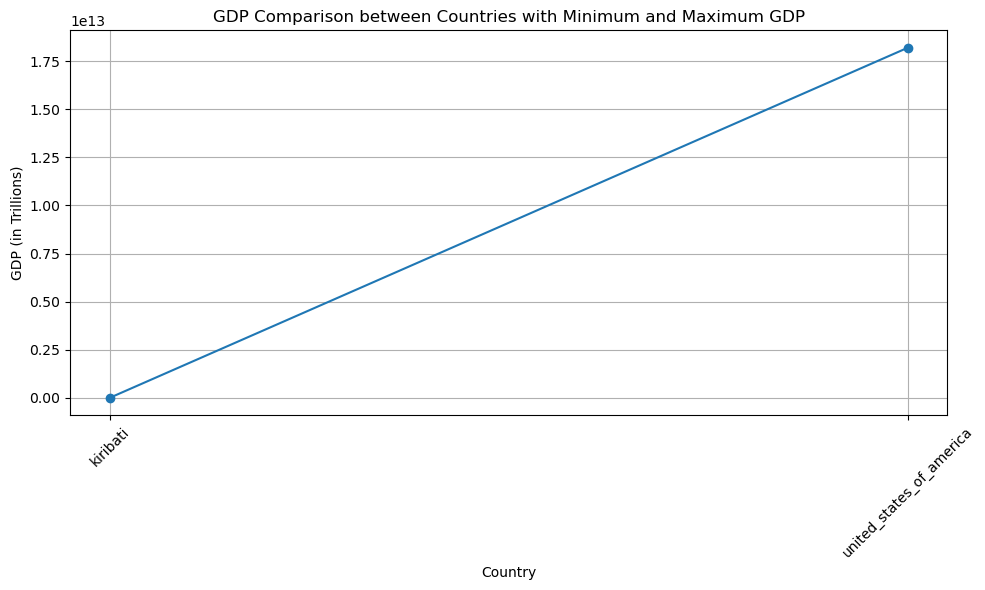

In [76]:
import matplotlib.pyplot as plt

# Data
countries = [min_country, max_country]
gdps = [min_gdp, max_gdp]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(countries, gdps, marker='o')
plt.title('GDP Comparison between Countries with Minimum and Maximum GDP')
plt.xlabel('Country')
plt.ylabel('GDP (in Trillions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


## Population

The population column had 612 NaN values. 
Upon further investigation the Population column was incomplete, and had many unreliable values. A total examination of all 193 countries, from 2000-2015 would take a very long time. For this reason, Population was dropped from the dataset.

In [77]:
# Descriptive statistics for Population without scientific notation
population_stats = df_cleaned['Population'].describe().apply(lambda x: format(x, 'f'))
print("Descriptive statistics for Population:")
print(population_stats)

# Number of NaN values in the Population column
population_nan_count = df_cleaned['Population'].isna().sum()
print("\nNumber of NaN values in the Population column:", population_nan_count)



Descriptive statistics for Population:
count          2268.000000
mean       12828130.590582
std        61247065.801292
min              34.000000
25%          196273.750000
50%         1391756.500000
75%         7426745.500000
max      1293859294.000000
Name: Population, dtype: object

Number of NaN values in the Population column: 612


In [78]:
# Get the number of unique countries in the original DataFrame
num_unique_countries_original = df_cleaned['Country'].nunique()

# Print the number of unique countries
print("Number of unique countries in df_cleaned:", num_unique_countries_original)


Number of unique countries in df_cleaned: 180


In [79]:
# Sort the DataFrame by Population in ascending order
lowest_population_countries = df_cleaned.sort_values(by='Population', ascending=True)

# Select the bottom 30 rows
bottom_30_countries = lowest_population_countries.head(30)

# Display the bottom 30 countries with year and population
print("Countries with the lowest populations (bottom 30):")
print(bottom_30_countries[['Year', 'Country', 'Population']])



Countries with the lowest populations (bottom 30):
      Year     Country  Population
1596  2003    maldives        34.0
1590  2009    maldives        36.0
1585  2014    maldives        41.0
967   2008     georgia        43.0
1141  2010     hungary       123.0
2583  2008       tonga       135.0
2587  2004       tonga       146.0
1599  2000    maldives       286.0
1598  2001    maldives       292.0
1597  2002    maldives       297.0
1595  2004    maldives       312.0
1594  2005    maldives       321.0
1593  2006    maldives       333.0
1592  2007    maldives       349.0
1591  2008    maldives       362.0
1589  2010    maldives       367.0
1588  2011    maldives       377.0
1587  2012    maldives       385.0
1586  2013    maldives       393.0
970   2005     georgia       419.0
972   2003     georgia       431.0
649   2006     croatia       444.0
652   2003     croatia       444.0
653   2002     croatia       444.0
654   2001     croatia       444.0
968   2007     georgia       482.0
1261

In [80]:


# First, get a unique list of all countries from the dataset
all_countries = df_cleaned['Country'].unique()

# Now, iterate over each country and create a pivot table for each one focusing only on the population data
for country in all_countries:
    # Filter the dataframe for the current country
    country_data = df_cleaned[df_cleaned['Country'] == country]
    
    # Create a pivot table for the current country without any aggregation
    pivot_table_country = country_data.pivot_table(
        index='Country',
        columns='Year',
        values='Population',  # Focusing on population data
        aggfunc='first'  # Use 'first' as the aggregation function to avoid aggregation
    )
    
    # Display the pivot table for the current country
    print(f"Population data for {country}:")
    print(pivot_table_country)
    print()  

# Display the first few rows of the adjusted DataFrame
print("Adjusted DataFrame with corrected population formatting:")
print(df_cleaned.head())



Population data for afghanistan:
Year             2000       2001        2002       2003        2004      2005  \
Country                                                                         
afghanistan  293756.0  2966463.0  21979923.0  2364851.0  24118979.0  257798.0   

Year              2006        2007       2008      2009       2010       2011  \
Country                                                                         
afghanistan  2589345.0  26616792.0  2729431.0  284331.0  2883167.0  2978599.0   

Year              2012        2013      2014        2015  
Country                                                   
afghanistan  3696958.0  31731688.0  327582.0  33736494.0  

Population data for albania:
Year        2000     2001    2002      2003      2004      2005       2006  \
Country                                                                      
albania  38927.0  36173.0  3511.0  339616.0  326939.0  311487.0  2992547.0   

Year        2007       2008       200

In [81]:
import numpy as np

# Define a function to adjust population values
def adjust_population(Population):
    # Check if the input is NaN
    if np.isnan(Population):
        return Population
    # Check if the population value has a decimal
    elif Population % 1 != 0:
        # Remove the decimal and add a zero to the end
        return int(Population * 10)
    else:
        # If the population value is already an integer, no adjustment needed
        return int(Population)

# Apply the adjust_population function to the 'Population' column
df_cleaned['Population'] = df_cleaned['Population'].apply(adjust_population)# Iterate over each row in the cleaned DataFrame
for index, row in df_cleaned.iterrows():
    # Extract country, year, and population values from the row
    country = row['Country']
    year = row['Year']
    population = row['Population']
    
    # Convert population to a formatted string with commas for thousands separator
    formatted_population = '{:,.0f}'.format(population)
    
    # Print the data in the specified format
    print(f"{country:<13} | {year} | {formatted_population}")



afghanistan   | 2015 | 33,736,494
afghanistan   | 2014 | 327,582
afghanistan   | 2013 | 31,731,688
afghanistan   | 2012 | 3,696,958
afghanistan   | 2011 | 2,978,599
afghanistan   | 2010 | 2,883,167
afghanistan   | 2009 | 284,331
afghanistan   | 2008 | 2,729,431
afghanistan   | 2007 | 26,616,792
afghanistan   | 2006 | 2,589,345
afghanistan   | 2005 | 257,798
afghanistan   | 2004 | 24,118,979
afghanistan   | 2003 | 2,364,851
afghanistan   | 2002 | 21,979,923
afghanistan   | 2001 | 2,966,463
afghanistan   | 2000 | 293,756
albania       | 2015 | 28,873
albania       | 2014 | 288,914
albania       | 2013 | 289,592
albania       | 2012 | 2,941
albania       | 2011 | 295,195
albania       | 2010 | 291,321
albania       | 2009 | 2,927,519
albania       | 2008 | 2,947,314
albania       | 2007 | 29,717
albania       | 2006 | 2,992,547
albania       | 2005 | 311,487
albania       | 2004 | 326,939
albania       | 2003 | 339,616
albania       | 2002 | 3,511
albania       | 2001 | 36,173
albania    

In [82]:


# Iterate over each row in the cleaned DataFrame
for index, row in df_cleaned.iterrows():
    # Extract country, year, and population values from the row
    country = row['Country']
    year = row['Year']
    population = row['Population']
    
    # Convert population to a formatted string with commas for thousands separator
    formatted_population = '{:,.0f}'.format(population)
    
    # Print the data in the specified format
    print(f"{country:<13} | {year} | {formatted_population}")




afghanistan   | 2015 | 33,736,494
afghanistan   | 2014 | 327,582
afghanistan   | 2013 | 31,731,688
afghanistan   | 2012 | 3,696,958
afghanistan   | 2011 | 2,978,599
afghanistan   | 2010 | 2,883,167
afghanistan   | 2009 | 284,331
afghanistan   | 2008 | 2,729,431
afghanistan   | 2007 | 26,616,792
afghanistan   | 2006 | 2,589,345
afghanistan   | 2005 | 257,798
afghanistan   | 2004 | 24,118,979
afghanistan   | 2003 | 2,364,851
afghanistan   | 2002 | 21,979,923
afghanistan   | 2001 | 2,966,463
afghanistan   | 2000 | 293,756
albania       | 2015 | 28,873
albania       | 2014 | 288,914
albania       | 2013 | 289,592
albania       | 2012 | 2,941
albania       | 2011 | 295,195
albania       | 2010 | 291,321
albania       | 2009 | 2,927,519
albania       | 2008 | 2,947,314
albania       | 2007 | 29,717
albania       | 2006 | 2,992,547
albania       | 2005 | 311,487
albania       | 2004 | 326,939
albania       | 2003 | 339,616
albania       | 2002 | 3,511
albania       | 2001 | 36,173
albania    

In [83]:
# Rename the 'Country' column to lowercase and replace spaces with underscores in df_cleaned
df_cleaned.rename(columns={'Country': 'country'}, inplace=True)

# Rename all columns to lowercase and replace spaces with underscores in df_cleaned
df_cleaned.columns = [col.lower().replace(' ', '_') for col in df_cleaned.columns]


In [84]:
population_data = {
    'afghanistan': {
        2015: 33750000, 2014: 32720000, 2013: 32540000, 2012: 30470000, 2011: 29250000,
        2010: 28190000, 2009: 27390000, 2008: 26430000, 2007: 25900000, 2006: 25440000,
        2005: 24410000, 2004: 23550000, 2003: 22650000, 2002: 21000000, 2001: 19690000,
        2000: 19540000
    },
    'Albania': {
        2015: 2880000, 2014: 2880000, 2013: 2890000, 2012: 2890000, 2011: 2900000,
        2010: 2910000, 2009: 2930000, 2008: 2950000, 2007: 2980000, 2006: 3000000,
        2005: 3030000, 2004: 3060000, 2003: 3090000, 2002: 3120000, 2001: 3150000,
        2000: 3180000
    },
    'Algeria': {
        2015: 39728025, 2014: 39208129, 2013: 38700000, 2012: 38140000, 2011: 37600000,
        2010: 37062820, 2009: 36117637, 2008: 34867150, 2007: 34300000, 2006: 33777915,
        2005: 33288437, 2004: 32831960, 2003: 32435140, 2002: 31995460, 2001: 31592153,
        2000: 31183660
        },
    'Angola': {
        2015: 27859350, 2014: 26924660, 2013: 25998340, 2012: 25961500, 2011: 24218565,
        2010: 23369131, 2009: 22549547, 2008: 21759420, 2007: 2997687, 2006: 22623990,
        2005: 19552542, 2004: 18865716, 2003: 18233690, 2002: 17572649, 2001: 16983266,
        2000: 16449240
    },
    'Antigua and Barbuda': {
        2015: 89958, 2014: 89252, 2013: 88512, 2012: 87688, 2011: 86749,
        2010: 85710, 2009: 84546, 2008: 83267, 2007: 82035, 2006: 80909,
        2005: 79879, 2004: 78955, 2003: 78095, 2002: 77216, 2001: 76227,
        2000: 75070
    },
    'Argentina': {
        2015: 43417765, 2014: 42981515, 2013: 42539925, 2012: 42967390, 2011: 41656879,
        2010: 41223889, 2009: 40979470, 2008: 40979470, 2007: 40979470, 2006: 40979470,
        2005: 39145488, 2004: 38728696, 2003: 37471590, 2002: 37471590, 2001: 37471590,
        2000: 37471590
    },
    'Armenia': {
        2015: 2880000, 2014: 2890000, 2013: 2900000, 2012: 2910000, 2011: 2930000,
        2010: 2950000, 2009: 2960000, 2008: 2980000, 2007: 3000000, 2006: 3030000,
        2005: 3050000, 2004: 3070000, 2003: 3080000, 2002: 3110000, 2001: 3130000,
        2000: 3170000
    },
    'Australia': {
        2015: 23789338, 2014: 23466940, 2013: 23117353, 2012: 22728254, 2011: 22342400,
        2010: 22317500, 2009: 21691700, 2008: 21249200, 2007: 28276000, 2006: 26979000,
        2005: 23948000, 2004: 21274000, 2003: 19895400, 2002: 19651400, 2001: 19413000,
        2000: 19153000
    },
    'Austria': {
        2015: 8633169, 2014: 8541575, 2013: 8479375, 2012: 8429991, 2011: 8391643,
        2010: 8363440, 2009: 8343323, 2008: 8321496, 2007: 8295487, 2006: 8268641,
        2005: 8227829, 2004: 8171966, 2003: 8121423, 2002: 8819570, 2001: 8422930,
        2000: 8115660
    },
    'Azerbaijan': {
        2015: 9649341, 2014: 9535790, 2013: 9416810, 2012: 9295784, 2011: 9173820,
        2010: 9543320, 2009: 8947243, 2008: 8763400, 2007: 8581300, 2006: 8484550,
        2005: 8391850, 2004: 8365000, 2003: 8234100, 2002: 8171950, 2001: 8111200,
        2000: 8486000
    },
    'Bangladesh': {
        2015: 161288600, 2014: 159452790, 2013: 157571292, 2012: 155727530, 2011: 153911916,
        2010: 152149120, 2009: 154547800, 2008: 148858140, 2007: 147139191, 2006: 145368400,
        2005: 143431110, 2004: 141374890, 2003: 139191000, 2002: 136666700, 2001: 134171600,
        2000: 131581243
    },
    'Belarus': {
        2015: 9489616, 2014: 9474511, 2013: 9465997, 2012: 9464495, 2011: 9473172,
        2010: 9495830, 2009: 9567650, 2008: 9527985, 2007: 9569530, 2006: 9649240,
        2005: 9663915, 2004: 9731460, 2003: 9796749, 2002: 9865548, 2001: 9928549,
        2000: 9979610
    },
    'Belgium': {
        2015: 11274196, 2014: 11129570, 2013: 11182817, 2012: 11128246, 2011: 11014744,
        2010: 11089586, 2009: 11079649, 2008: 11079973, 2007: 11016257, 2006: 11054796,
        2005: 11047862, 2004: 11042114, 2003: 11037613, 2002: 11033279, 2001: 11028657,
        2000: 11025125
    },
    'Belize': {
        2015: 359288, 2014: 351694, 2013: 344181, 2012: 336710, 2011: 329192,
        2010: 321680, 2009: 313929, 2008: 361650, 2007: 298470, 2006: 297470,
        2005: 283277, 2004: 276890, 2003: 269130, 2002: 262260, 2001: 254984,
        2000: 247315
    },
    'Benin': {
        2015: 10930000, 2014: 10780000, 2013: 10310000, 2012: 10160000, 2011: 10000000,
        2010: 9800000, 2009: 9600000, 2008: 9400000, 2007: 9200000, 2006: 9000000,
        2005: 8800000, 2004: 7890000, 2003: 7700000, 2002: 7500000, 2001: 7300000,
        2000: 6865951
    },
    'Bhutan': {
        2015: 787386, 2014: 776448, 2013: 764961, 2012: 752967, 2011: 745100,
        2010: 727641, 2009: 714458, 2008: 795000, 2007: 686958, 2006: 672228,
        2005: 656639, 2004: 642820, 2003: 623434, 2002: 663990, 2001: 589600,
        2000: 573416
    },
    'Bosnia and Herzegovina': {
        2015: 3535961, 2014: 3566200, 2013: 3649990, 2012: 3648200, 2011: 3688865,
        2010: 3722840, 2009: 3746561, 2008: 3763599, 2007: 3774000, 2006: 3779468,
        2005: 3781530, 2004: 3781287, 2003: 3779247, 2002: 3775870, 2001: 3771284,
        2000: 3766760
    },
    'Brazil': {
        2015: 259621800, 2014: 242131330, 2013: 224863200, 2012: 205698300, 2011: 198686688,
        2010: 196796269, 2009: 194895996, 2008: 192979290, 2007: 191266370, 2006: 189124120,
        2005: 186917361, 2004: 184738458, 2003: 182482149, 2002: 18151210, 2001: 17775670,
        2000: 175287587
    },
    'Botswana': {
        2015: 2291970, 2014: 2168573, 2013: 2128570, 2012: 2289315, 2011: 2251339,
        2010: 2214866, 2009: 1979882, 2008: 1946351, 2007: 1914414, 2006: 1884238,
        2005: 1855852, 2004: 1829330, 2003: 1843390, 2002: 1779953, 2001: 1754935,
        2000: 1728340
    },
    'Bulgaria': {
        2015: 7177991, 2014: 7223938, 2013: 7265115, 2012: 7358880, 2011: 7348328,
        2010: 7395599, 2009: 7444443, 2008: 7492561, 2007: 7545338, 2006: 7601220,
        2005: 7658972, 2004: 7716860, 2003: 7775327, 2002: 7837161, 2001: 8914200,
        2000: 8171720
    },
    'Burkina Faso': {
        2015: 18116240, 2014: 17585977, 2013: 17727230, 2012: 16571216, 2011: 16819400,
        2010: 15652170, 2009: 15141990, 2008: 14689726, 2007: 14252210, 2006: 13829177,
        2005: 13421930, 2004: 13356900, 2003: 12654621, 2002: 12293100, 2001: 11944587,
        2000: 11679420
    },
    'Burundi': {
        2015: 10730000, 2014: 9989179, 2013: 9961860, 2012: 9931971, 2011: 9943580,
        2010: 9876693, 2009: 9848931, 2008: 8212264, 2007: 7939573, 2006: 7675338,
        2005: 7423289, 2004: 7182451, 2003: 6953113, 2002: 6741569, 2001: 6555829,
        2000: 6476000
    },
    'Cabo Verde': {
        2015: 532913, 2014: 526437, 2013: 521600, 2012: 513979, 2011: 586700,
        2010: 523840, 2009: 496963, 2008: 491723, 2007: 486438, 2006: 487950,
        2005: 474567, 2004: 467664, 2003: 461470, 2002: 452160, 2001: 443716,
        2000: 435790
    },
    'Cambodia': {
        2015: 15517635, 2014: 15277900, 2013: 15226920, 2012: 14776866, 2011: 14537886,
        2010: 14308740, 2009: 14928000, 2008: 13885900, 2007: 13676693, 2006: 13474489,
        2005: 13272100, 2004: 13633770, 2003: 12853124, 2002: 12634729, 2001: 12424730,
        2000: 12152354
    },
    'Canada': {
        2015: 35848610, 2014: 35544564, 2013: 35155451, 2012: 34755450, 2011: 34342780,
        2010: 34527400, 2009: 33628571, 2008: 33245773, 2007: 32887928, 2006: 32575500,
        2005: 32312000, 2004: 31995000, 2003: 31676000, 2002: 31362000, 2001: 31819000,
        2000: 30697000
    },

'central_african_republic': {
    2015: 4546100, 2014: 4515392, 2013: 4499653, 2012: 4494160, 2011: 4476153,
    2010: 4448525, 2009: 4442300, 2008: 4345386, 2007: 4275800, 2006: 4217580,
    2005: 4127910, 2004: 4553600, 2003: 3981665, 2002: 3976120, 2001: 3832230,
    2000: 3754986
    },
# Define the corrected population values for Chad
'chad': {
    2015: 14941300, 2014: 13569438, 2013: 13133589, 2012: 12751350, 2011: 12288651,
    2010: 11887220, 2009: 11527860, 2008: 11133861, 2007: 10725780, 2006: 10375970,
    2005: 10790000, 2004: 9714300, 2003: 9353210, 2002: 9168900, 2001: 8663120,
    2000: 8342559
},

# Define the corrected population values for Chile
'chile': {
    2015: 17762681, 2014: 17613798, 2013: 17462982, 2012: 17397460, 2011: 17153357,
    2010: 16993354, 2009: 16829442, 2008: 16661942, 2007: 16491687, 2006: 16319792,
    2005: 16147640, 2004: 15973778, 2003: 15799542, 2002: 15623635, 2001: 15444969,
    2000: 15262754
},

# Define the corrected population values for China
'china': {
    2015: 1371220000, 2014: 1364270000, 2013: 1357380000, 2012: 1356950000, 2011: 1344130000,
    2010: 1337750000, 2009: 1331260000, 2008: 1324655000, 2007: 1317885000, 2006: 1311200000,
    2005: 1337200000, 2004: 1296750000, 2003: 1288400000, 2002: 1284000000, 2001: 1271850000,
    2000: 1262645000
},

# Define the corrected population values for Colombia
'colombia':  {
    2015: 48228697, 2014: 47791911, 2013: 47342981, 2012: 46881475, 2011: 46466460,
    2010: 45918970, 2009: 45416181, 2008: 44915440, 2007: 44374572, 2006: 43835722,
    2005: 43285634, 2004: 42724163, 2003: 42152151, 2002: 41572491, 2001: 49889900,
    2000: 44395800
},

# Define the corrected population values for Comoros
'comoros': {
    2015: 777424, 2014: 759385, 2013: 741500, 2012: 723868, 2011: 765690,
    2010: 689692, 2009: 673252, 2008: 657229, 2007: 641620, 2006: 626425,
    2005: 611627, 2004: 597228, 2003: 583211, 2002: 569479, 2001: 555888,
    2000: 542357
},

# Define the corrected population values for Costa Rica
'costa_rica' : {
    2015: 4878520, 2014: 4757575, 2013: 4764100, 2012: 4654122, 2011: 4647400,
    2010: 4545280, 2009: 4488263, 2008: 4429580, 2007: 4369469, 2006: 4387940,
    2005: 4247841, 2004: 4187380, 2003: 4125971, 2002: 4632400, 2001: 3996798,
    2000: 3925443
},

# Define the corrected population values for Croatia
'croatia':  {
    2015: 4236400, 2014: 4238389, 2013: 4255689, 2012: 4267558, 2011: 4286220,
    2010: 4417781, 2009: 4429780, 2008: 4434580, 2007: 4436000, 2006: 4440000,
    2005: 4442000, 2004: 4439000, 2003: 4440000, 2002: 4440000, 2001: 4440000, 2000: 4426000
},

# Define the corrected population values for Cyprus
'cyprus': {
    2015: 1169850, 2014: 1152390, 2013: 1143896, 2012: 1135620, 2011: 1124835,
    2010: 1112670, 2009: 1987600, 2008: 1815630, 2007: 1637120, 2006: 1455900,
    2005: 1276580, 2004: 1141000, 2003: 993563, 2002: 976966, 2001: 962820, 2000: 943286
},

# Define the corrected population values for Denmark
'denmark':  {
    2015: 5683483, 2014: 5643475, 2013: 5614932, 2012: 5591572, 2011: 5575720,
    2010: 5547683, 2009: 5523950, 2008: 5493621, 2007: 5461438, 2006: 5437272,
    2005: 5419432, 2004: 5445230, 2003: 5395740, 2002: 5375931, 2001: 5358783,
    2000: 5339616
},

# Define the corrected population values for Djibouti
'djibouti': {
    2015: 927414, 2014: 912164, 2013: 896688, 2012: 881185, 2011: 865937,
    2010: 851146, 2009: 836840, 2008: 822934, 2007: 894200, 2006: 796280,
    2005: 783254, 2004: 777520, 2003: 758615, 2002: 746221, 2001: 732711,
    2000: 717584
},

# Define the corrected population values for the Dominican Republic
'dominican_republic': {
    2015: 10528394, 2014: 10405844, 2013: 10281296, 2012: 10015495, 2011: 9027950,
    2010: 9897985, 2009: 9767758, 2008: 9636520, 2007: 9543530, 2006: 9371338,
    2005: 9237566, 2004: 9129980, 2003: 8967760, 2002: 8832285, 2001: 8697126,
    2000: 8562622
},

# Define the corrected population values for Ecuador
'ecuador':  {
    2015: 16144368, 2014: 15931120, 2013: 15661547, 2012: 15419666, 2011: 15177355,
    2010: 14934690, 2009: 14691275, 2008: 14447562, 2007: 14254530, 2006: 13967480,
    2005: 13735233, 2004: 13596470, 2003: 13289610, 2002: 13726000, 2001: 12852755,
    2000: 12628596
},

# Define the corrected population values for El Salvador
'el_salvador':  {
    2015: 6312478, 2014: 6281189, 2013: 6257770, 2012: 6221246, 2011: 6192560,
    2010: 6164626, 2009: 6137276, 2008: 6113100, 2007: 6834750, 2006: 6564780,
    2005: 6289610, 2004: 6775000, 2003: 5971535, 2002: 5943300, 2001: 5959620,
    2000: 5867626
},

'equatorial_guinea': {
    2015: 1175389, 2014: 1129424, 2013: 1837460, 2012: 1385930, 2011: 994290,
    2010: 951140, 2009: 991110, 2008: 868418, 2007: 829327, 2006: 792217,
    2005: 757317, 2004: 724817, 2003: 694611, 2002: 666470, 2001: 639762,
    2000: 614323
},

# Define the corrected population values for Eritrea
'eritrea':  {
    2015: 3340000, 2014: 3320000, 2013: 3300000, 2012: 3250000, 2011: 3210000,
    2010: 3150000, 2009: 3080000, 2008: 2932636, 2007: 2935333, 2006: 2886648,
    2005: 2839697, 2004: 2765862, 2003: 2653826, 2002: 2554639, 2001: 2467124,
    2000: 2039281
},
    'estonia' : {
    2015: 1315635, 2014: 1317997, 2013: 1321977, 2012: 1325498, 2011: 1327439,
    2010: 1327439, 2009: 1334515, 2008: 1340187, 2007: 1348665, 2006: 1348665,
    2005: 1354000, 2004: 1346540, 2003: 1343323, 2002: 1340187, 2001: 1340187,
    2000: 1340187
},

'ethiopia':  {
    2015: 99873330, 2014: 97366774, 2013: 94887724, 2012: 92444183, 2011: 94675600,
    2010: 87726700, 2009: 85416253, 2008: 83184892, 2007: 81490000, 2006: 78856890,
    2005: 76727830, 2004: 74624450, 2003: 72545144, 2002: 74971920, 2001: 68492257,
    2000: 66537331
},

'fiji':  {
    2015: 892149, 2014: 885860, 2013: 879715, 2012: 873596, 2011: 867860,
    2010: 859950, 2009: 851967, 2008: 843340, 2007: 834812, 2006: 827411,
    2005: 821817, 2004: 818354, 2003: 816628, 2002: 815691, 2001: 814218,
    2000: 811223
},

'finland' : {
    2015: 5479531, 2014: 5461512, 2013: 5438972, 2012: 5413971, 2011: 5388272,
    2010: 5363352, 2009: 5338871, 2008: 5313399, 2007: 5288720, 2006: 5266268,
    2005: 5246960, 2004: 5228172, 2003: 5213140, 2002: 5259800, 2001: 5188800,
    2000: 5176290
},

'france':  {
    2015: 66624680, 2014: 66331957, 2013: 65998570, 2012: 65659790, 2011: 65342776,
    2010: 65275120, 2009: 64774400, 2008: 64374990, 2007: 64162290, 2006: 63621376,
    2005: 63179356, 2004: 62748970, 2003: 62244884, 2002: 61852670, 2001: 61357431,
    2000: 69124980
},

'gabon': {
    2015: 1931750, 2014: 1875713, 2013: 1817271, 2012: 1756817, 2011: 1697110,
    2010: 1642100, 2009: 1586754, 2008: 1536411, 2007: 1489193, 2006: 1444844,
    2005: 1431260, 2004: 1364250, 2003: 1328146, 2002: 1294490, 2001: 1262259,
    2000: 1231122
},

'georgia': {
    2015: 3717100, 2014: 3727000, 2013: 3776000, 2012: 3825000, 2011: 3875000,
    2010: 3926000, 2009: 3978000, 2008: 4300000, 2007: 4820000, 2006: 4136000,
    2005: 4190000, 2004: 4245000, 2003: 4310000, 2002: 4357000, 2001: 4386400,
    2000: 4418300
},

'germany': {
    2015: 81686611, 2014: 81982500, 2013: 86456500, 2012: 84258230,
    2011: 82749830, 2010: 81776930, 2009: 81923700, 2008: 82119700,
    2007: 82266372, 2006: 82376451, 2005: 82469422, 2004: 82516260,
    2003: 82534176, 2002: 82488495, 2001: 82349925, 2000: 82211580
},

# Define the corrected population values for Ghana
'ghana' : {
    2015: 27582821, 2014: 26962563, 2013: 26346251, 2012: 25733490, 2011: 25121796,
    2010: 2451214, 2009: 23938310, 2008: 23298640, 2007: 22721200, 2006: 22113425,
    2005: 21542900, 2004: 21986536, 2003: 21367820, 2002: 19924522, 2001: 19421650,
    2000: 18938762
},


# Define the corrected population values for Greece
'greece': {
    2015: 10828830, 2014: 10892413, 2013: 10965211, 2012: 11451100, 2011: 11148990,
    2010: 11121341, 2009: 11171700, 2008: 11778410, 2007: 11484730, 2006: 11236200,
    2005: 19873140, 2004: 11121410, 2003: 11110000, 2002: 11109220, 2001: 11072132,
    2000: 11118588
},


# Define the corrected population values for Guatemala
'guatemala': {
    2015: 16252429, 2014: 15923559, 2013: 15596214, 2012: 15271560, 2011: 149489190,
    2010: 14634170, 2009: 14316280, 2008: 14636600, 2007: 13728600, 2006: 13397800,
    2005: 13962800, 2004: 12796925, 2003: 12547800, 2002: 12288480, 2001: 11924946,
    2000: 11657430
},

# Define the corrected population values for Guinea
'guinea': {
    2015: 11915330, 2014: 11855900, 2013: 11536615, 2012: 11281469, 2011: 11351700,
    2010: 17941700, 2009: 15565240, 2008: 13231420, 2007: 19672700, 2006: 9881428,
    2005: 9679745, 2004: 9492290, 2003: 9398480, 2002: 9137345, 2001: 8971139,
    2000: 8885460
},

# Define the corrected population values for Guinea-Bissau
'guinea-bissau':  {
    2015: 1775260, 2014: 1725744, 2013: 1681495, 2012: 1638139, 2011: 1596154,
    2010: 1555880, 2009: 1517448, 2008: 1488410, 2007: 1445958, 2006: 1412669,
    2005: 1388380, 2004: 1353450, 2003: 1321220, 2002: 1293523, 2001: 1267512,
    2000: 1243229
},

# Define the corrected population values for Guyana
'guyana': {
    2015: 768514, 2014: 763393, 2013: 758810, 2012: 753910, 2011: 749100,
    2010: 746556, 2009: 745693, 2008: 746314, 2007: 747869, 2006: 749610,
    2005: 759460, 2004: 751652, 2003: 751857, 2002: 751884, 2001: 752263,
    2000: 753310
},

# Define the corrected population values for Haiti
'haiti': {
    2015: 10711610, 2014: 10572466, 2013: 10431776, 2012: 10289210, 2011: 10145540,
    2010: 9999617, 2009: 9852870, 2008: 9752900, 2007: 9556889, 2006: 9494570,
    2005: 9263440, 2004: 9119178, 2003: 8976552, 2002: 8834733, 2001: 8692567,
    2000: 8549200
},

# Define the corrected population values for Honduras
'honduras': {
    2015: 8968290, 2014: 8892160, 2013: 8657785, 2012: 8556460, 2011: 8351600,
    2010: 8194778, 2009: 8352100, 2008: 7872658, 2007: 7779720, 2006: 7541460,
    2005: 7373430, 2004: 7241530, 2003: 7338210, 2002: 6863157, 2001: 6693610,
    2000: 6524283
},

# Define the corrected population values for Hungary
'hungary': {
    2015: 9843280, 2014: 9866468, 2013: 9893820, 2012: 9923620, 2011: 9971727,
    2010: 10020030, 2009: 10226500, 2008: 10381880, 2007: 10557800, 2006: 10713700,
    2005: 10876500, 2004: 10171460, 2003: 10129552, 2002: 10158680, 2001: 10187576,
    2000: 10219710
},

# Define the corrected population values for Iceland
'iceland':  {
    2015: 338150, 2014: 327386, 2013: 323764, 2012: 327160, 2011: 319140,
    2010: 318410, 2009: 318499, 2008: 317414, 2007: 311566, 2006: 337820,
    2005: 296734, 2004: 292740, 2003: 289521, 2002: 287523, 2001: 284968,
    2000: 281250
},

# Define the corrected population values for India
'india': {
    2015: 1395398000, 2014: 1293859294, 2013: 1278562270, 2012: 1263658520, 2011: 1247236290,
    2010: 1239869100, 2009: 1214271320, 2008: 1197146960, 2007: 1179681239, 2006: 1161977719,
    2005: 1144118674, 2004: 1126135777, 2003: 1182784800, 2002: 1898711200, 2001: 1714778550,
    2000: 1535912000
},

# Define the corrected population values for Indonesia
'indonesia': {
    2015: 258162113, 2014: 255131116, 2013: 252322630, 2012: 248883232, 2011: 245775110,
    2010: 242524123, 2009: 239344780, 2008: 236159276, 2007: 232989141, 2006: 229838220,
    2005: 226712730, 2004: 223614649, 2003: 225452140, 2002: 217585900, 2001: 214565200,
    2000: 211544290
},

# Define the corrected population values for Iraq

    'iraq':  {
    2015: 36115649, 2014: 35680000, 2013: 33883145, 2012: 32776571, 2011: 31727530,
    2010: 37627100, 2009: 29894652, 2008: 29111417, 2007: 28394330, 2006: 27697912,
    2005: 27842600, 2004: 26316690, 2003: 25627626, 2002: 24939299, 2001: 24251649,
    2000: 23565413
},

# Define the corrected population values for Ireland
'ireland': {
    2015: 4676835, 2014: 4617225, 2013: 4598294, 2012: 4586897, 2011: 4576794,
    2010: 4561550, 2009: 4535375, 2008: 4489544, 2007: 4398942, 2006: 4273591,
    2005: 4159914, 2004: 4726200, 2003: 3996521, 2002: 3931947, 2001: 3866243,
    2000: 3851740
},
'israel': {
    2015: 8381000, 2014: 8215700, 2013: 8595000, 2012: 7915000, 2011: 7765800,
    2010: 7623600, 2009: 7485600, 2008: 7388000, 2007: 7181000, 2006: 7537000,
    2005: 6931000, 2004: 6890000, 2003: 6689700, 2002: 6570000, 2001: 6439000,
    2000: 6289000
},

'italy': {
    2015: 67358200, 2014: 67891400, 2013: 62339480, 2012: 59539717, 2011: 59379449,
    2010: 59277417, 2009: 59953650, 2008: 58826731, 2007: 58438310, 2006: 58143979,
    2005: 57969484, 2004: 57685327, 2003: 57313230, 2002: 57597000, 2001: 56974100,
    2000: 56942180
},
    'jamaica':  {
    2015: 2871934, 2014: 2862870, 2013: 2851870, 2012: 2849920, 2011: 2829493,
    2010: 2817210, 2009: 2848200, 2008: 2791220, 2007: 2775467, 2006: 2762790,
    2005: 2744673, 2004: 2728777, 2003: 2712511, 2002: 2695446, 2001: 2677110,
    2000: 2656864
},

'japan': {
    2015: 127141000, 2014: 127276000, 2013: 127445000, 2012: 127629000, 2011: 127833000,
    2010: 128700000, 2009: 128470000, 2008: 128630000, 2007: 128100000, 2006: 127854000,
    2005: 127773000, 2004: 127761000, 2003: 127718000, 2002: 127445000, 2001: 127149000,
    2000: 126843000
},
'jordan': {
    2015: 9159320, 2014: 8893600, 2013: 8413464, 2012: 7992573, 2011: 7574943,
    2010: 7182390, 2009: 6821116, 2008: 6489822, 2007: 6193191, 2006: 5934232,
    2005: 5714111, 2004: 5535595, 2003: 5396774, 2002: 5287488, 2001: 5193482,
    2000: 5131300
},

'kazakhstan': {
    2015: 17544126, 2014: 17289224, 2013: 17352750, 2012: 16791425, 2011: 16556600,
    2010: 16321581, 2009: 16927100, 2008: 15674000, 2007: 15484192, 2006: 15388400,
    2005: 15147290, 2004: 15129850, 2003: 14991800, 2002: 14858948, 2001: 14858335,
    2000: 14883626
},
'kenya': {
    2015: 47236259, 2014: 46242500, 2013: 44826849, 2012: 43646629, 2011: 42486839,
    2010: 41351520, 2009: 42372400, 2008: 39148416, 2007: 38859900, 2006: 37525000,
    2005: 36482880, 2004: 35749310, 2003: 34138520, 2002: 33214900, 2001: 32321482,
    2000: 31454830
},

'kiribati': {
    2015: 116124, 2014: 115458, 2013: 113853, 2012: 111661, 2011: 109887,
    2010: 108652, 2009: 105680, 2008: 98440, 2007: 96311, 2006: 94260,
    2005: 92325, 2004: 95420, 2003: 88895, 2002: 87343, 2001: 85858,
    2000: 84460
},

'latvia': {
    2015: 1977527, 2014: 1993782, 2013: 2126470, 2012: 2343190, 2011: 2597900,
    2010: 2975550, 2009: 2141669, 2008: 2177322, 2007: 2232500, 2006: 2218357,
    2005: 2238799, 2004: 2263122, 2003: 2287955, 2002: 2311730, 2001: 2337170,
    2000: 2367550
},

'lebanon': {
    2015: 5851479, 2014: 5632790, 2013: 5276120, 2012: 4916440, 2011: 4588368,
    2010: 4337141, 2009: 4183156, 2008: 4111470, 2007: 4864660, 2006: 4573500,
    2005: 3986852, 2004: 3863267, 2003: 3714640, 2002: 3522837, 2001: 3359859,
    2000: 3235366
},

'lesotho': {
    2015: 2174645, 2014: 2145785, 2013: 2117361, 2012: 2899280, 2011: 2641660,
    2010: 2455100, 2009: 2192900, 2008: 1999930, 2007: 1982287, 2006: 1965662,
    2005: 1949543, 2004: 1933728, 2003: 1918970, 2002: 1923120, 2001: 1885955,
    2000: 1868699
},

'liberia': {
    2015: 4499621, 2014: 4397370, 2013: 4286291, 2012: 4181563, 2011: 4716700,
    2010: 3948125, 2009: 3811528, 2008: 3662993, 2007: 3512932, 2006: 3375838,
    2005: 3261230, 2004: 3176414, 2003: 3116233, 2002: 3628630, 2001: 2991132,
    2000: 2884522
},

'lithuania': {
    2015: 2949100, 2014: 2932367, 2013: 2957689, 2012: 2987773, 2011: 3281150,
    2010: 3972820, 2009: 3162916, 2008: 3198231, 2007: 3231294, 2006: 3269990,
    2005: 3322528, 2004: 3377750, 2003: 3415213, 2002: 3443670, 2001: 3478180,
    2000: 3499536
},

'luxembourg':{
    2015: 569640, 2014: 556319, 2013: 543360, 2012: 539460, 2011: 518347,
    2010: 569530, 2009: 497783, 2008: 488650, 2007: 479993, 2006: 472637,
    2005: 465158, 2004: 458950, 2003: 451630, 2002: 446175, 2001: 441525,
    2000: 436300
},

'madagascar': {
    2015: 24234880, 2014: 23589810, 2013: 22961146, 2012: 22346573, 2011: 21743949,
    2010: 21151640, 2009: 25691210, 2008: 19996469, 2007: 19433523, 2006: 18882680,
    2005: 18336724, 2004: 17829970, 2003: 17279141, 2002: 16765117, 2001: 16269320,
    2000: 15766860
},

'malawi': {
    2015: 17573670, 2014: 17688380, 2013: 16577147, 2012: 16973500, 2011: 15627618,
    2010: 15167950, 2009: 14714620, 2008: 14271234, 2007: 13849690, 2006: 13429262,
    2005: 13397110, 2004: 12676380, 2003: 12336687, 2002: 12137110, 2001: 11695863,
    2000: 11376172
},

'malaysia': {
    2015: 37231550, 2014: 32281700, 2013: 29767240, 2012: 29174560, 2011: 28635128,
    2010: 28112289, 2009: 27653830, 2008: 27111690, 2007: 26625845, 2006: 26143566,
    2005: 25659393, 2004: 25174190, 2003: 24688730, 2002: 24198811, 2001: 23698970,
    2000: 23185680
},

'maldives':  {
    2015: 491630, 2014: 410000, 2013: 393000, 2012: 385000, 2011: 377000, 2010: 367000,
    2009: 360000, 2008: 362000, 2007: 349000, 2006: 333000, 2005: 321000, 2004: 312000,
    2003: 340000, 2002: 297000, 2001: 292000, 2000: 286000
},
'mali': {
    2015: 17467950, 2014: 16962846, 2013: 16477818, 2012: 16667000, 2011: 15549890,
    2010: 15758500, 2009: 14665970, 2008: 14138216, 2007: 13675660, 2006: 13227640,
    2005: 12798763, 2004: 12391960, 2003: 12512800, 2002: 11638929, 2001: 11293258,
    2000: 11276900
},

'malta': {
    2015: 431874, 2014: 427364, 2013: 423374, 2012: 419455, 2011: 416268,
    2010: 414580, 2009: 412477, 2008: 493790, 2007: 467240, 2006: 453800,
    2005: 438340, 2004: 412680, 2003: 398582, 2002: 395969, 2001: 393280,
    2000: 398700
},

'mauritania': {
    2015: 4182341, 2014: 4639200, 2013: 3946170, 2012: 3832390, 2011: 3717672,
    2010: 3695430, 2009: 3562880, 2008: 3475410, 2007: 3312665, 2006: 3226530,
    2005: 3137200, 2004: 3428230, 2003: 2957117, 2002: 2873228, 2001: 2797290,
    2000: 2793590
},

'mauritius': {
    2015: 1262650, 2014: 1269340, 2013: 1258653, 2012: 1255882, 2011: 1252440,
    2010: 1254000, 2009: 1247429, 2008: 1244121, 2007: 1239630, 2006: 1233996,
    2005: 1228254, 2004: 1221300, 2003: 1213370, 2002: 1246210, 2001: 1196287,
    2000: 1186873
},

'mexico': {
    2015: 120150000, 2014: 118760000, 2013: 117290000, 2012: 115760000, 2011: 114150000,
    2010: 117318941, 2009: 111050000, 2008: 109680000, 2007: 108300000, 2006: 106890000,
    2005: 105440000, 2004: 103950000, 2003: 102430000, 2002: 100920000, 2001: 99390000,
    2000: 97870000
},

'mongolia': {
    2015: 2976877, 2014: 2923896, 2013: 2869170, 2012: 2814226, 2011: 2761516,
    2010: 2712650, 2009: 2668289, 2008: 2628131, 2007: 2591670, 2006: 2558120,
    2005: 2526446, 2004: 2496832, 2003: 2469286, 2002: 2443659, 2001: 2419776,
    2000: 2397436
},

'montenegro': {
    2015: 622159, 2014: 621810, 2013: 621270, 2012: 626100, 2011: 627900,
    2010: 619428, 2009: 618294, 2008: 616969, 2007: 615875, 2006: 615250,
    2005: 614261, 2004: 613353, 2003: 612267, 2002: 698280, 2001: 673890,
    2000: 649500
},

'morocco': {
    2015: 34833220, 2014: 34318820, 2013: 33824769, 2012: 33333789, 2011: 32858823,
    2010: 32496390, 2009: 31989897, 2008: 31596855, 2007: 31225881, 2006: 38693460,
    2005: 35217000, 2004: 31792850, 2003: 29843937, 2002: 29512368, 2001: 29181832,
    2000: 28849621
},

'mozambique':  {
    2015: 28169100, 2014: 27212382, 2013: 26434372, 2012: 25676660, 2011: 24939500,
    2010: 24221450, 2009: 23524630, 2008: 22846758, 2007: 22188387, 2006: 21547463,
    2005: 29237000, 2004: 23127500, 2003: 19716598, 2002: 19139658, 2001: 18588758,
    2000: 18676870
},

'myanmar': {
    2015: 52436690, 2014: 51924182, 2013: 51448196, 2012: 59865140, 2011: 55533100,
    2010: 51558960, 2009: 49869000, 2008: 49479752, 2007: 49171586, 2006: 48846474,
    2005: 48482614, 2004: 48737700, 2003: 47624894, 2002: 47142200, 2001: 46627994,
    2000: 46954620
},

'namibia': {
    2015: 2425561, 2014: 2379920, 2013: 2316520, 2012: 2263934, 2011: 2215621,
    2010: 2173170, 2009: 2137400, 2008: 2163750, 2007: 2799150, 2006: 2557340,
    2005: 2321960, 2004: 2922800, 2003: 1986535, 2002: 1962147, 2001: 1933596,
    2000: 1899257
},

'nepal': {
    2015: 28656282, 2014: 28323241, 2013: 27985310, 2012: 27649925, 2011: 27327147,
    2010: 27231370, 2009: 26741130, 2008: 26475859, 2007: 26214847, 2006: 25946180,
    2005: 25642870, 2004: 25394490, 2003: 24956230, 2002: 24566342, 2001: 24161777,
    2000: 23749110
},

'netherlands' : {
    2015: 16939923, 2014: 16865800, 2013: 16844320, 2012: 16754962, 2011: 16693740,
    2010: 16615394, 2009: 16533880, 2008: 16445593, 2007: 16381696, 2006: 16346110,
    2005: 16319868, 2004: 16281779, 2003: 16225320, 2002: 16148929, 2001: 16461800,
    2000: 15925513
},
'niger':  {
    2015: 19896965, 2014: 19148219, 2013: 18426372, 2012: 17731634, 2011: 17646360,
    2010: 16425578, 2009: 15813913, 2008: 15228525, 2007: 14668338, 2006: 14132640,
    2005: 13618449, 2004: 13127120, 2003: 12656870, 2002: 12260000, 2001: 11771976,
    2000: 11352973
},

'nigeria':  {
    2015: 181181744, 2014: 176465200, 2013: 171829330, 2012: 167297284, 2011: 162877760,
    2010: 158578261, 2009: 154421810, 2008: 153473900, 2007: 146417240, 2006: 142614940,
    2005: 138939478, 2004: 135393616, 2003: 131972533, 2002: 128666710, 2001: 125463434,
    2000: 122352900
},

'nicaragua':  {
    2015: 6823500, 2014: 6139970, 2013: 5945747, 2012: 5877180, 2011: 5878200, 2010: 5737723,
    2009: 5666581, 2008: 5594560, 2007: 5522160, 2006: 5452110, 2005: 5379328, 2004: 5397300,
    2003: 5248790, 2002: 5171734, 2001: 5175000, 2000: 5267960
},
# Define the corrected population values for Norway
'norway': {
    2015: 5188670, 2014: 5137232, 2013: 5796230, 2012: 5185730, 2011: 4953880,
    2010: 4889252, 2009: 4828726, 2008: 4768212, 2007: 4791530, 2006: 4666770,
    2005: 4623291, 2004: 4591910, 2003: 4564855, 2002: 4538159, 2001: 4513751,
    2000: 4499670
},


# Define the corrected population values for Pakistan
'pakistan': {
    2015: 189385130, 2014: 185546257, 2013: 181712595, 2012: 177911533, 2011: 174184265,
    2010: 175618200, 2009: 167495800, 2008: 163644630, 2007: 163329740, 2006: 157939930,
    2005: 153996670, 2004: 157830000, 2003: 147734100, 2002: 144654143, 2001: 141614370,
    2000: 138523285
},
# Define the corrected population values for Panama
'panama': {
    2015: 3969249, 2014: 3939860, 2013: 3838462, 2012: 3772938, 2011: 3777820,
    2010: 3643222, 2009: 3579385, 2008: 3516268, 2007: 3453870, 2006: 3391950,
    2005: 3334650, 2004: 3269541, 2003: 3291740, 2002: 3149265, 2001: 3896840,
    2000: 3334700
},

# Define the corrected population values for Papua New Guinea
'papua_new_guinea': {
    2015: 7919825, 2014: 7755785, 2013: 7592865, 2012: 7438360, 2011: 7269348,
    2010: 7182390, 2009: 6947447, 2008: 6787187, 2007: 6627922, 2006: 6472720,
    2005: 6314790, 2004: 6161517, 2003: 6172400, 2002: 5862316, 2001: 5716152,
    2000: 5572222
    },
    # Define the corrected population values for Paraguay
'paraguay': {
    2015: 6639119, 2014: 6552584, 2013: 6465740, 2012: 6379219, 2011: 6293783,
    2010: 6298770, 2009: 6127837, 2008: 6471170, 2007: 5966159, 2006: 5882796,
    2005: 5795494, 2004: 5737400, 2003: 5679500, 2002: 5586110, 2001: 5466240,
    2000: 5327000
},
# Define the corrected population values for Peru
'peru': {
    2015: 31376671, 2014: 39733540, 2013: 35657160, 2012: 31589660, 2011: 29759989,
    2010: 29373646, 2009: 29157000, 2008: 28641980, 2007: 28292724, 2006: 27949944,
    2005: 27614100, 2004: 27273194, 2003: 26937738, 2002: 26614670, 2001: 26261363,
    2000: 25914879
},

# Define the corrected population values for Philippines
'philippines': {
    2015: 101716359, 2014: 101224900, 2013: 98481320, 2012: 96866642, 2011: 95277940,
    2010: 93726624, 2009: 92228790, 2008: 97518640, 2007: 89293490, 2006: 87894190,
    2005: 86274237, 2004: 84678493, 2003: 83319540, 2002: 81352600, 2001: 79665315,
    2000: 77991569
},

# Define the corrected population values for Poland
'poland': {
    2015: 37986412, 2014: 38117350, 2013: 38419600, 2012: 38631640, 2011: 38632550,
    2010: 38427940, 2009: 38151630, 2008: 38125759, 2007: 38125600, 2006: 38141267,
    2005: 38165445, 2004: 38182222, 2003: 38245700, 2002: 3823364, 2001: 38248760,
    2000: 38258629
},

# Define the corrected population values for Portugal
'portugal': {
    2015: 10358760, 2014: 10416200, 2013: 10457295, 2012: 10514844, 2011: 10557560,
    2010: 10573100, 2009: 10568247, 2008: 10558177, 2007: 10542964, 2006: 10522288,
    2005: 10533300, 2004: 10483861, 2003: 10458821, 2002: 10419631, 2001: 10362722,
    2000: 10289898
},
'rwanda': {
    2015: 11629553, 2014: 11345357, 2013: 11651510, 2012: 10788853, 2011: 10516710,
    2010: 10246842, 2009: 9977446, 2008: 9781690, 2007: 9447420, 2006: 9265800,
    2005: 8991735, 2004: 8818438, 2003: 8683460, 2002: 8536250, 2001: 8329460,
    2000: 8257300
},

'russian_federation': {
    2015: 144968700, 2014: 143819666, 2013: 143569110, 2012: 143216760, 2011: 142968680,
    2010: 142849449, 2009: 142785342, 2008: 142742350, 2007: 142858800, 2006: 143495280,
    2005: 143518523, 2004: 144675400, 2003: 144648257, 2002: 145364600, 2001: 145976830,
    2000: 146596557
},

'romania': {
    2015: 19815481, 2014: 19989790, 2013: 19983693, 2012: 25835000, 2011: 21475280,
    2010: 22468710, 2009: 23674870, 2008: 25378750, 2007: 28829820, 2006: 21193760,
    2005: 21319685, 2004: 21451748, 2003: 21574326, 2002: 21734960, 2001: 22131970,
    2000: 22442971
},
'samoa': {
    2015: 193759, 2014: 192290, 2013: 197570, 2012: 189194, 2011: 187665,
    2010: 186250, 2009: 184826, 2008: 183526, 2007: 182286, 2006: 181940,
    2005: 179929, 2004: 178781, 2003: 177662, 2002: 176582, 2001: 175566,
    2000: 174610
},

'sao_tome_and_principe': {
    2015: 195553, 2014: 191266, 2013: 187450, 2012: 182889, 2011: 178800,
    2010: 174776, 2009: 178130, 2008: 166913, 2007: 163110, 2006: 159328,
    2005: 155630, 2004: 151969, 2003: 148372, 2002: 144889, 2001: 141622,
    2000: 138660
},
'senegal': {
    2015: 14976994, 2014: 14546111, 2013: 14123200, 2012: 13735130, 2011: 13391000,
    2010: 12916229, 2009: 12559170, 2008: 12239570, 2007: 11873557, 2006: 11556763,
    2005: 11251266, 2004: 11559440, 2003: 10679900, 2002: 10396861, 2001: 10134497,
    2000: 9884520
},

'serbia':  {
    2015: 7953830, 2014: 7135760, 2013: 7164132, 2012: 7199770, 2011: 7234990,
    2010: 7291436, 2009: 7328700, 2008: 7352220, 2007: 7381579, 2006: 7411569,
    2005: 7447690, 2004: 7463157, 2003: 7485910, 2002: 7496522, 2001: 7534330,
    2000: 7516346
},

'seychelles':  {
    2015: 93419, 2014: 91359, 2013: 89949, 2012: 88330, 2011: 87440,
    2010: 89770, 2009: 87298, 2008: 86956, 2007: 85330, 2006: 84600,
    2005: 82858, 2004: 82475, 2003: 82781, 2002: 83723, 2001: 81220,
    2000: 81131
},
'sierra_leone': {
    2015: 7237250, 2014: 7791620, 2013: 6922790, 2012: 6766130, 2011: 6611692,
    2010: 6458720, 2009: 6312600, 2008: 6165372, 2007: 6154170, 2006: 5848692,
    2005: 5658379, 2004: 5439695, 2003: 5199549, 2002: 4957216, 2001: 4739147,
    2000: 4564297
}, 

'slovenia': {
    2015: 2635310, 2014: 2619800, 2013: 2599530, 2012: 2571590, 2011: 2528430,
    2010: 2485830, 2009: 2396690, 2008: 2213160, 2007: 2181220, 2006: 2686800,
    2005: 2474000, 2004: 1997120, 2003: 1995733, 2002: 1994530, 2001: 1992600,
    2000: 1988925
},

'solomon_islands': {
    2015: 587482, 2014: 575540, 2013: 563513, 2012: 551531, 2011: 539614,
    2010: 527790, 2009: 516790, 2008: 544770, 2007: 492940, 2006: 481422,
    2005: 469885, 2004: 458324, 2003: 446769, 2002: 435262, 2001: 423853,
    2000: 412690
},

'south_africa': {
    2015: 55119766, 2014: 54146734, 2013: 53311955, 2012: 52565158, 2011: 51729345,
    2010: 59794323, 2009: 52558131, 2008: 49557573, 2007: 48883844, 2006: 48233844,
    2005: 47666720, 2004: 47179000, 2003: 46418193, 2002: 45855482, 2001: 45312937,
    2000: 44896856
},

'spain': {
    2015: 46447697, 2014: 46488820, 2013: 46624500, 2012: 46773550, 2011: 46742697,
    2010: 46576897, 2009: 46362946, 2008: 45954160, 2007: 45226830, 2006: 44397319,
    2005: 43653155, 2004: 42921895, 2003: 42187645, 2002: 41431558, 2001: 48541200,
    2000: 45678640
},

'sri_lanka': {
    2015: 29660000, 2014: 27710000, 2013: 25850000, 2012: 24250000, 2011: 22710000,
    2010: 21190000, 2009: 19968000, 2008: 19817000, 2007: 19668000, 2006: 19520000,
    2005: 19373000, 2004: 19228000, 2003: 19830000, 2002: 18939000, 2001: 18797000,
    2000: 18655000
},
'sudan':  {
    2015: 38647830, 2014: 37737913, 2013: 36849918, 2012: 35991920, 2011: 35167314,
    2010: 34385963, 2009: 33656190, 2008: 32955496, 2007: 32282526, 2006: 31676400,
    2005: 39119140, 2004: 31863410, 2003: 29435944, 2002: 28679565, 2001: 27945500,
    2000: 27255350
},

'suriname':  {
    2015: 553280, 2014: 547928, 2013: 542540, 2012: 537770, 2011: 531589,
    2010: 526130, 2009: 526190, 2008: 515148, 2007: 597500, 2006: 543700,
    2005: 498946, 2004: 493630, 2003: 488332, 2002: 483440, 2001: 477740,
    2000: 472390
},
    'swaziland': {
    2015: 1319110, 2014: 1295970, 2013: 1271456, 2012: 1248158, 2011: 1225258,
    2010: 1228430, 2009: 1186750, 2008: 1158897, 2007: 1138434, 2006: 1125140,
    2005: 1158730, 2004: 1955300, 2003: 1873920, 2002: 1893000, 2001: 1729270,
    2000: 1614680
},
'sweden': {
    2015: 9799186, 2014: 9696110, 2013: 9637900, 2012: 9519374, 2011: 9449213,
    2010: 9378126, 2009: 9298515, 2008: 9219637, 2007: 9148920, 2006: 9855000,
    2005: 9295720, 2004: 8993531, 2003: 8958229, 2002: 8924958, 2001: 8895960,
    2000: 8872190
},
'switzerland': {
    2015: 8282396, 2014: 8188649, 2013: 8893460, 2012: 7996861, 2011: 7912398,
    2010: 7824990, 2009: 7743831, 2008: 7647675, 2007: 7551117, 2006: 7483934,
    2005: 7437115, 2004: 7389625, 2003: 7339100, 2002: 7284753, 2001: 7229854,
    2000: 7184250
},

'syrian_arab_republic': {
    2015: 18734987, 2014: 19239000, 2013: 19891410, 2012: 22671000, 2011: 22739930,
    2010: 21188340, 2009: 21824893, 2008: 21474430, 2007: 19632860, 2006: 18914977,
    2005: 18294611, 2004: 17866380, 2003: 17415266, 2002: 17879100, 2001: 16766899,
    2000: 16418480
},
'tajikistan': {
    2015: 8548651, 2014: 8362745, 2013: 8177890, 2012: 7995620, 2011: 7815949,
    2010: 7641630, 2009: 7472819, 2008: 7397280, 2007: 7152385, 2006: 7557000,
    2005: 6854176, 2004: 6712841, 2003: 6576877, 2002: 6447688, 2001: 6327125,
    2000: 6216250
},

'thailand': {
    2015: 68657600, 2014: 68416772, 2013: 68143650, 2012: 67843979, 2011: 67531300,
    2010: 67288800, 2009: 66881867, 2008: 66545760, 2007: 66195615, 2006: 65824164,
    2005: 65425470, 2004: 65223100, 2003: 64554952, 2002: 64731640, 2001: 63543322,
    2000: 62958210
},
'timor-leste': {
    2015: 1249770, 2014: 1212814, 2013: 1184366, 2012: 1156760, 2011: 1131523,
    2010: 1195910, 2009: 1922100, 2008: 1781100, 2007: 1649730, 2006: 1486210,
    2005: 1264840, 2004: 996698, 2003: 968520, 2002: 923825, 2001: 892531,
    2000: 871670
},

'togo': {
    2015: 7416820, 2014: 7228915, 2013: 7429480, 2012: 6859482, 2011: 6679282,
    2010: 6529520, 2009: 6334720, 2008: 6161796, 2007: 5997385, 2006: 5837792,
    2005: 5683268, 2004: 5534598, 2003: 5391410, 2002: 5251472, 2001: 5111770,
    2000: 4973670
},

'tonga': {
    2015: 163640, 2014: 157820, 2013: 153280, 2012: 149510, 2011: 145770,
    2010: 141370, 2009: 136400, 2008: 135000, 2007: 123570, 2006: 116890,
    2005: 114100, 2004: 104600, 2003: 99789, 2002: 99184, 2001: 98611,
    2000: 98820
},
'trinidad_and_tobago': {
    2015: 1369200, 2014: 1354493, 2013: 1348248, 2012: 1341588, 2011: 1334788,
    2010: 1328100, 2009: 1321618, 2008: 1315372, 2007: 1392600, 2006: 1331440,
    2005: 1296934, 2004: 1295350, 2003: 1284520, 2002: 1277837, 2001: 1272380,
    2000: 1267984
},

'tunisia': {
    2015: 11273661, 2014: 11143980, 2013: 11145580, 2012: 10886668, 2011: 10761467,
    2010: 10639931, 2009: 10521834, 2008: 10473360, 2007: 10298870, 2006: 10196136,
    2005: 10124820, 2004: 10176100, 2003: 9939678, 2002: 9864326, 2001: 9785710,
    2000: 9699197
},

'turkey': {
    2015: 78271472, 2014: 77362800, 2013: 75787333, 2012: 74569867, 2011: 73494550,
    2010: 72326914, 2009: 71339185, 2008: 74432000, 2007: 69597281, 2006: 68763450,
    2005: 67934600, 2004: 67785500, 2003: 66858300, 2002: 65143540, 2001: 64191474,
    2000: 63241210
},
    
'turkmenistan': {
    2015: 5565284, 2014: 5466241, 2013: 5366277, 2012: 5267839, 2011: 5174610,
    2010: 5872100, 2009: 5795000, 2008: 4935762, 2007: 4871370, 2006: 4811500,
    2005: 4754641, 2004: 4733980, 2003: 4655741, 2002: 4612000, 2001: 4564800,
    2000: 4516131
},

'uganda': {
    2015: 41448700, 2014: 38833338, 2013: 37553726, 2012: 36367960, 2011: 35936480,
    2010: 33915133, 2009: 32771895, 2008: 31663896, 2007: 35948700, 2006: 29556620,
    2005: 28543940, 2004: 27568436, 2003: 26624820, 2002: 25718480, 2001: 24854892,
    2000: 24392740
},

'ukraine': {
    2015: 45154290, 2014: 45271947, 2013: 45489600, 2012: 45593300, 2011: 45761000,
    2010: 45877000, 2009: 46533000, 2008: 46258200, 2007: 46593500, 2006: 46787750,
    2005: 47151500, 2004: 47451600, 2003: 47812950, 2002: 48225000, 2001: 48683865,
    2000: 49175848
},
    
'uruguay': {
    2015: 3431552, 2014: 3419546, 2013: 3485000, 2012: 3396777, 2011: 3385624,
    2010: 3374415, 2009: 3362755, 2008: 3358240, 2007: 3339741, 2006: 3331430,
    2005: 3325612, 2004: 3324960, 2003: 3325637, 2002: 3327773, 2001: 3327130,
    2000: 3321245
},

'uzbekistan': {
    2015: 31298900, 2014: 37577000, 2013: 32432000, 2012: 29774500, 2011: 29339400,
    2010: 28562400, 2009: 27767400, 2008: 27328000, 2007: 26868000, 2006: 26488250,
    2005: 26167000, 2004: 25864350, 2003: 25567650, 2002: 25271850, 2001: 24964450,
    2000: 24654000
},

'vanuatu':  {
    2015: 264630, 2014: 258850, 2013: 253142, 2012: 247485, 2011: 241871,
    2010: 236295, 2009: 237850, 2008: 225340, 2007: 219953, 2006: 214634,
    2005: 293700, 2004: 241430, 2003: 198964, 2002: 193956, 2001: 189290,
    2000: 185630
},
'zambia': {
    2015: 16158700, 2014: 15629740, 2013: 15153210, 2012: 14699937, 2011: 14264756,
    2010: 13853300, 2009: 13456417, 2008: 13825170, 2007: 12725974, 2006: 12383446,
    2005: 12521560, 2004: 11731746, 2003: 11421984, 2002: 11124900, 2001: 10824125,
    2000: 10531221
},

'zimbabwe': {
    2015: 15777451, 2014: 15411675, 2013: 15545600, 2012: 14718260, 2011: 14386649,
    2010: 14863170, 2009: 13815990, 2008: 13558469, 2007: 13329990, 2006: 13124267,
    2005: 12943200, 2004: 12777511, 2003: 12633897, 2002: 12552500, 2001: 12366165,
    2000: 12222251
},
    'bahamas': {
    2015: 392707, 2014: 389137, 2013: 385660, 2012: 382074, 2011: 377956,
    2010: 373277, 2009: 368064, 2008: 362807, 2007: 357678, 2006: 352672,
    2005: 347815, 2004: 343097, 2003: 338505, 2002: 334015, 2001: 329639,
    2000: 325033
    

},
    'bahrain': {
    2015: 1360000, 2014: 1310000, 2013: 1260000, 2012: 1220000, 2011: 1210000,
    2010: 1210000, 2009: 1180000, 2008: 1110000, 2007: 1040000, 2006: 970986,
    2005: 901928, 2004: 833454, 2003: 778360, 2002: 748332, 2001: 730263,
    2000: 711446
    
},
    
    'barbados': {
    2015: 278095, 2014: 277501, 2013: 276873, 2012: 276207, 2011: 275501,
    2010: 274017, 2009: 273801, 2008: 272647, 2007: 271460, 2006: 270436,
    2005: 269489, 2004: 268514, 2003: 267509, 2002: 266467, 2001: 265384,
    2000: 264663
},
    'bolivia_(plurinational_state_of)': {
    2015: 11090000, 2014: 10920000, 2013: 10740000, 2012: 10570000, 2011: 10400000,
    2010: 10220000, 2009: 10050000, 2008: 9880000, 2007: 9710000, 2006: 9540000,
    2005: 9380000, 2004: 9220000, 2003: 9060000, 2002: 8900000, 2001: 8750000,
    2000: 8590000
    },
    
    'republic_of_korea': {
    2015: 50990000, 2014: 50560000, 2013: 50100000, 2012: 49630000, 2011: 49170000,
    2010: 48810000, 2009: 48590000, 2008: 48400000, 2007: 48220000, 2006: 48050000,
    2005: 47890000, 2004: 47730000, 2003: 47540000, 2002: 47320000, 2001: 47060000,
    2000: 46790000
},
    'czechia': {
    2015: 10520000, 2014: 10520000, 2013: 10510000, 2012: 10510000, 2011: 10500000,
    2010: 10460000, 2009: 10420000, 2008: 10380000, 2007: 10340000, 2006: 10300000,
    2005: 10280000, 2004: 10260000, 2003: 10250000, 2002: 10240000, 2001: 10230000,
    2000: 10230000
    },

    'brunei_darussalam': {
    2015: 421449, 2014: 416670, 2013: 411704, 2012: 406637, 2011: 401515,
    2010: 396064, 2009: 390322, 2008: 384579, 2007: 378861, 2006: 372814,
    2005: 366728, 2004: 360472, 2003: 354049, 2002: 347470, 2001: 340759,
    2000: 333937
    },

    'saint_vincent_and_the_grenadines': {
    2015: 106493, 2014: 106934, 2013: 107469, 2012: 108105, 2011: 108722,
    2010: 109324, 2009: 109852, 2008: 110333, 2007: 110836, 2006: 111403,
    2005: 112056, 2004: 112261, 2003: 113119, 2002: 113466, 2001: 113653,
    2000: 113832

    },
    
    'singapore': {
    2015: 5650000, 2014: 5570000, 2013: 5480000, 2012: 5380000, 2011: 5280000,
    2010: 5160000, 2009: 5010000, 2008: 4840000, 2007: 4660000, 2006: 4490000,
    2005: 4340000, 2004: 4270000, 2003: 4230000, 2002: 4180000, 2001: 4120000,
    2000: 4050000
},
    'oman': {
    2015: 4190000, 2014: 4010000, 2013: 3820000, 2012: 3540000, 2011: 3210000,
    2010: 2880000, 2009: 2700000, 2008: 2650000, 2007: 2610000, 2006: 2560000,
    2005: 2520000, 2004: 2470000, 2003: 2430000, 2002: 2400000, 2001: 2370000,
    2000: 2340000
},
    'kyrgyzstan': {
    2015: 5910000, 2014: 5810000, 2013: 5720000, 2012: 5630000, 2011: 5550000,
    2010: 5480000, 2009: 5410000, 2008: 5350000, 2007: 5290000, 2006: 5250000,
    2005: 5190000, 2004: 5140000, 2003: 5080000, 2002: 5030000, 2001: 4980000,
    2000: 4940000
},
    'egypt': {
    2015: 97720000, 2014: 95590000, 2013: 93380000, 2012: 91240000, 2011: 89200000,
    2010: 87250000, 2009: 85500000, 2008: 83840000, 2007: 82220000, 2006: 80630000,
    2005: 79080000, 2004: 77520000, 2003: 75960000, 2002: 74390000, 2001: 72850000,
    2000: 71370000
},
    'grenada': {
    2015: 118994, 2014: 117986, 2013: 116954, 2012: 115930, 2011: 114933,
    2010: 114058, 2009: 113260, 2008: 112497, 2007: 111740, 2006: 111006,
    2005: 110268, 2004: 109529, 2003: 108750, 2002: 108246, 2001: 107945,
    2000: 107442

},
  'saint_lucia': {
    2015: 175638, 2014: 174814, 2013: 173992, 2012: 173139, 2011: 172157,
    2010: 170950, 2009: 169694, 2008: 168584, 2007: 167524, 2006: 166476,
    2005: 165394, 2004: 164252, 2003: 163060, 2002: 161841, 2001: 160611,
    2000: 159513  
    
},
    'kuwait': {
    2015: 3910000, 2014: 3760000, 2013: 3650000, 2012: 3390000, 2011: 3140000,
    2010: 2940000, 2009: 2800000, 2008: 2650000, 2007: 2510000, 2006: 2360000,
    2005: 2240000, 2004: 2150000, 2003: 2100000, 2002: 2050000, 2001: 1990000,
    2000: 1930000
},
    'the_former_yugoslav_republic_of_macedonia': {
    2015: 2110000, 2014: 2110000, 2013: 2100000, 2012: 2100000, 2011: 2100000,
    2010: 2090000, 2009: 2090000, 2008: 2090000, 2007: 2080000, 2006: 2080000,
    2005: 2080000, 2004: 2080000, 2003: 2070000, 2002: 2060000, 2001: 2050000,
    2000: 2040000
},
    'lao_peoples_democratic_republic': {
    2015: 6790000, 2014: 6690000, 2013: 6600000, 2012: 6510000, 2011: 6420000,
    2010: 6320000, 2009: 6230000, 2008: 6140000, 2007: 6040000, 2006: 5950000,
    2005: 5850000, 2004: 5770000, 2003: 5690000, 2002: 5610000, 2001: 5520000,
    2000: 5430000
},
    'united_republic_of_tanzania': {
    2015: 52540000, 2014: 50810000, 2013: 49250000, 2012: 47790000, 2011: 46420000,
    2010: 45110000, 2009: 43960000, 2008: 42870000, 2007: 41720000, 2006: 40560000,
    2005: 39440000, 2004: 38360000, 2003: 37330000, 2002: 36350000, 2001: 35410000,
    2000: 34460000
},
    'iran_(islamic_republic_of)': {
    2015: 81790000, 2014: 79960000, 2013: 78460000, 2012: 77320000, 2011: 76340000,
    2010: 75370000, 2009: 74320000, 2008: 73320000, 2007: 72320000, 2006: 71280000,
    2005: 70180000, 2004: 69060000, 2003: 67950000, 2002: 67330000, 2001: 66670000,
    2000: 65540000
},
    'venezuela_(bolivarian_republic_of)': {
    2015: 30530000, 2014: 30190000, 2013: 29840000, 2012: 29470000, 2011: 29100000,
    2010: 28720000, 2009: 28330000, 2008: 27930000, 2007: 27530000, 2006: 27100000,
    2005: 26670000, 2004: 26230000, 2003: 25780000, 2002: 25330000, 2001: 24880000,
    2000: 24430000
},
    'saudi_arabia': {
    2015: 32750000, 2014: 32130000, 2013: 31480000, 2012: 30820000, 2011: 30150000,
    2010: 29410000, 2009: 28480000, 2008: 27440000, 2007: 26400000, 2006: 25380000,
    2005: 22410000, 2004: 23660000, 2003: 23150000, 2002: 22620000, 2001: 22090000,
    2000: 21550000
},
    'gambia': {
    2015: 2250000, 2014: 2190000, 2013: 2120000, 2012: 2060000, 2011: 2000000,
    2010: 1940000, 2009: 1880000, 2008: 1820000, 2007: 1760000, 2006: 1710000,
    2005: 1660000, 2004: 1610000, 2003: 1570000, 2002: 1520000, 2001: 1480000,
    2000: 1440000
},
    'united_arab_emirates': {
    2015: 8920000, 2014: 8840000, 2013: 8750000, 2012: 8660000, 2011: 8580000,
    2010: 8480000, 2009: 7990000, 2008: 6990000, 2007: 5870000, 2006: 4900000,
    2005: 4280000, 2004: 3990000, 2003: 3810000, 2002: 3630000, 2001: 3450000,
    2000: 3280000
},
    'cameroon': {
    2015: 23010000, 2014: 22300000, 2013: 21630000, 2012: 21030000, 2011: 20450000,
    2010: 19880000, 2009: 19320000, 2008: 18780000, 2007: 18250000, 2006: 17750000,
    2005: 17280000, 2004: 16810000, 2003: 16350000, 2002: 15910000, 2001: 15490000,
    2000: 15090000
},
    'côte_divoire': {
    2015: 23600000, 2014: 23000000, 2013: 22470000, 2012: 22010000, 2011: 21560000,
    2010: 21120000, 2009: 20680000, 2008: 20240000, 2007: 19820000, 2006: 19390000,
    2005: 18970000, 2004: 18540000, 2003: 18120000, 2002: 17680000, 2001: 17250000,
    2000: 16080000

},
    'congo': {
    2015: 5060000, 2014: 4940000, 2013: 4830000, 2012: 4710000, 2011: 4580000,
    2010: 4440000, 2009: 4260000, 2008: 4090000, 2007: 3960000, 2006: 3810000,
    2005: 3670000, 2004: 3540000, 2003: 3420000, 2002: 3330000, 2001: 3250000,
    2000: 3130000
},
    'republic_of_moldova': {
    2015: 3280000, 2014: 3340000, 2013: 3420000, 2012: 3510000, 2011: 3600000,
    2010: 3680000, 2009: 3750000, 2008: 3810000, 2007: 3880000, 2006: 3940000,
    2005: 4000000, 2004: 4050000, 2003: 4090000, 2002: 4150000, 2001: 4200000,
    2000: 4250000
},
    'viet_nam': {
    2015: 92190000, 2014: 91240000, 2013: 90270000, 2012: 89300000, 2011: 88350000,
    2010: 87410000, 2009: 86480000, 2008: 85600000, 2007: 84760000, 2006: 83950000,
    2005: 83140000, 2004: 82310000, 2003: 81480000, 2002: 80640000, 2001: 79820000,
    2000: 79000000
},
    'united_kingdom_of_great_britain_and_northern_ireland': {
    2015: 65220000, 2014: 64770000, 2013: 64300000, 2012: 63810000, 2011: 63290000,
    2010: 62760000, 2009: 62240000, 2008: 61740000, 2007: 61260000, 2006: 60800000,
    2005: 60380000, 2004: 60000000, 2003: 59650000, 2002: 59360000, 2001: 59090000,
    2000: 58850000
},
     'libya': {
    2015: 6190000, 2014: 6100000, 2013: 5990000, 2012: 5870000, 2011: 6190000,
    2010: 6490000, 2009: 6360000, 2008: 6230000, 2007: 6100000, 2006: 5970000,
    2005: 5840000, 2004: 5690000, 2003: 5540000, 2002: 5410000, 2001: 5280000,
    2000: 5150000

},
    'yemen': {
    2015: 28520000, 2014: 27750000, 2013: 26980000, 2012: 26220000, 2011: 25480000,
    2010: 24740000, 2009: 24030000, 2008: 23330000, 2007: 22640000, 2006: 21970000,
    2005: 21320000, 2004: 20730000, 2003: 20190000, 2002: 19660000, 2001: 19140000,
    2000: 18630000
},
    'democratic_republic_of_the_congo': {
    2015: 78660000, 2014: 76040000, 2013: 73490000, 2012: 71000000, 2011: 68650000,
    2010: 66390000, 2009: 64270000, 2008: 62250000, 2007: 60290000, 2006: 58380000,
    2005: 56550000, 2004: 54820000, 2003: 53210000, 2002: 51660000, 2001: 50110000,
    2000: 48620000
},
    'qatar': {
    2015: 2410000, 2014: 2210000, 2013: 2040000, 2012: 1910000, 2011: 1800000,
    2010: 1710000, 2009: 1610000, 2008: 1440000, 2007: 1230000, 2006: 1020000,
    2005: 848718, 2004: 777951, 2003: 748535, 2002: 713195, 2001: 678838,
    2000: 645947
},
    'new_zealand': {
    2015: 4590000, 2014: 4510000, 2013: 4450000, 2012: 4410000, 2011: 4380000,
    2010: 4350000, 2009: 4300000, 2008: 4260000, 2007: 4220000, 2006: 4180000,
    2005: 4130000, 2004: 4080000, 2003: 4020000, 2002: 3950000, 2001: 3890000,
    2000: 3680000
},
      'slovakia': {
    2015: 5420000, 2014: 5420000, 2013: 5410000, 2012: 5410000, 2011: 5400000,
    2010: 5400000, 2009: 5390000, 2008: 5380000, 2007: 5380000, 2006: 5380000,
    2005: 5380000, 2004: 5370000, 2003: 5370000, 2002: 5380000, 2001: 5380000,
    2000: 5380000
},
    'micronesia_(federated_states_of)': {
    2015: 109477, 2014: 109093, 2013: 108616, 2012: 108248, 2011: 107897,
    2010: 107606, 2009: 107882, 2008: 108718, 2007: 109547, 2006: 110317,
    2005: 111095, 2004: 111447, 2003: 118210, 2002: 112005, 2001: 111964,
    2000: 111725  

},
    'cuba': {
    2015: 11340000, 2014: 11330000, 2013: 11320000, 2012: 11310000, 2011: 11300000,
    2010: 11290000, 2009: 11280000, 2008: 11280000, 2007: 11270000, 2006: 11260000,
    2005: 11250000, 2004: 11230000, 2003: 11200000, 2002: 11170000, 2001: 11140000,
    2000: 11110000
},
    'united_states_of_america': {
    2015: 324610000, 2014: 322030000, 2013: 319380000, 2012: 316650000, 2011: 313880000,
    2010: 311180000, 2009: 308510000, 2008: 305690000, 2007: 302740000, 2006: 299750000,
    2005: 296840000, 2004: 293950000, 2003: 291110000, 2002: 288350000, 2001: 285470000,
    2000: 282400000
}
}


In [85]:
import pandas as pd



# Create a new DataFrame from the population data
df_population = pd.DataFrame([
    {'country': country, 'year': year, 'population': population}
    for country, years in population_data.items()
    for year, population in years.items()
])

# Merge the population DataFrame with df_cleaned to update the population values
df_cleaned = df_cleaned.merge(df_population, on=['country', 'year'], how='left')

# Drop the original 'population' column from df_cleaned
df_cleaned.drop(columns=['population_y'], inplace=True)

# Rename the new population column
df_cleaned.rename(columns={'population': 'population_new'}, inplace=True)

# Print the updated DataFrame
print(df_cleaned.head())


       country  year      status  life_expectancy  adult_mortality  \
0  afghanistan  2015  Developing             65.0            263.0   
1  afghanistan  2014  Developing             59.9            271.0   
2  afghanistan  2013  Developing             59.9            268.0   
3  afghanistan  2012  Developing             59.5            272.0   
4  afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids  population_x  \
0    6.0               8.16    

In [86]:
# Rename the new population column to 'population'
df_cleaned.rename(columns={'population_new': 'population'}, inplace=True)

# Print the updated DataFrame
print(df_cleaned.head())

       country  year      status  life_expectancy  adult_mortality  \
0  afghanistan  2015  Developing             65.0            263.0   
1  afghanistan  2014  Developing             59.9            271.0   
2  afghanistan  2013  Developing             59.9            268.0   
3  afghanistan  2012  Developing             59.5            272.0   
4  afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids  population_x  \
0    6.0               8.16    

In [87]:
print(df_cleaned.columns)


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'population_x', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'gdp'],
      dtype='object')


In [88]:
import pandas as pd

# Clean country names in df_population
df_population['country'] = df_population['country'].apply(lambda x: x.lower().replace(' ', '_'))

df_cleaned['country'] = df_cleaned['country'].apply(lambda x: x.lower().replace(' ', '_'))

# Verify that country names match in both DataFrames by checking unique values
population_countries = set(df_population['country'].unique())
cleaned_countries = set(df_cleaned['country'].unique())

# Print countries that might not match
print("Countries in df_population not in df_cleaned:", population_countries - cleaned_countries)
print("Countries in df_cleaned not in df_population:", cleaned_countries - population_countries)

# Perform the merge
df_cleaned = df_cleaned.merge(df_population, on=['country', 'year'], how='left', suffixes=('', '_new'))

# Update the population column
df_cleaned['population'] = df_cleaned['population_x'].fillna(df_cleaned['population'])
df_cleaned.drop(columns=['population_x'], inplace=True)



Countries in df_population not in df_cleaned: {'lao_peoples_democratic_republic', 'côte_divoire'}
Countries in df_cleaned not in df_population: {"côte_d'ivoire", "lao_people's_democratic_republic"}


In [89]:

df_cleaned.replace({"lao_people's_democratic_republic": 'lao_peoples_democratic_republic', "côte_d'ivoire": 'côte_divoire'}, inplace=True)


In [90]:
import pandas as pd

# Clean country names in df_population
df_population['country'] = df_population['country'].apply(lambda x: x.lower().replace(' ', '_'))

df_cleaned['country'] = df_cleaned['country'].apply(lambda x: x.lower().replace(' ', '_'))

# Verify that country names match in both DataFrames by checking unique values
population_countries = set(df_population['country'].unique())
cleaned_countries = set(df_cleaned['country'].unique())

# Print countries that might not match
print("Countries in df_population not in df_cleaned:", population_countries - cleaned_countries)
print("Countries in df_cleaned not in df_population:", cleaned_countries - population_countries)

# Perform the merge
df_cleaned = df_cleaned.merge(df_population, on=['country', 'year'], how='left', suffixes=('', '_new'))

# Update the population column
df_cleaned['population'] = df_cleaned['population_new'].fillna(df_cleaned['population'])
df_cleaned.drop(columns=['population_new'], inplace=True)


Countries in df_population not in df_cleaned: set()
Countries in df_cleaned not in df_population: set()


In [91]:
# Calculate descriptive statistics for the 'population' column
population_stats = df_cleaned['population'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for Population:")
print(population_stats)
# Print descriptive statistics for the 'population' column without scientific notation
print(population_stats.apply(lambda x: format(x, 'f')))


Descriptive Statistics for Population:
count    2.880000e+03
mean     3.777935e+07
std      1.431783e+08
min      7.507000e+04
25%      2.333368e+06
50%      7.946702e+06
75%      2.566371e+07
max      1.898711e+09
Name: population, dtype: float64
count          2880.000000
mean       37779352.912500
std       143178321.204528
min           75070.000000
25%         2333367.500000
50%         7946701.500000
75%        25663709.750000
max      1898711200.000000
Name: population, dtype: object


In [92]:
# Get the minimum population value from the statistics
min_population = df_cleaned['population'].min()

# Filter the DataFrame to find the country or countries with this minimum population
countries_with_min_population = df_cleaned[df_cleaned['population'] == min_population]

# Print the result
print("Countries with the Minimum Population:")
print(countries_with_min_population[['country', 'year', 'population']])


Countries with the Minimum Population:
                country  year  population
79  antigua_and_barbuda  2000       75070


In [93]:
# Get the number of unique countries in the original DataFrame
num_unique_countries_original = df_cleaned['country'].nunique()

# Print the number of unique countries
print("Number of unique countries in df_cleaned:", num_unique_countries_original)


Number of unique countries in df_cleaned: 180


## Income Composition of Resources

This column had 128 missing values.

Countries including Côte d'Ivoire, Czechia, Democratic Republic of the Congo, Republic of Korea, Republic of Moldova, United Kingdom of Great Britain and Northern Ireland, United Republic of Tanzania, and United States of America. Further analysis revealed that these countries had missing data for all 16 years.

To ensure accurate statistics, rows with 0 values in the Income_composition_of_resources column were excluded. This step was taken to avoid skewing the results, as 0 values could significantly impact the mean and other summary statistics. After filtering out the 0 values, descriptive statistics were computed, providing insights into the distribution of non-zero values in the column.

In [94]:
# Compute descriptive statistics for the Income_composition_of_resources column
income_composition_of_resources_stats = df_cleaned['income_composition_of_resources'].describe()

# Display the descriptive statistics
print("Descriptive statistics for income_composition_of_resources:")
print(income_composition_of_resources_stats)


Descriptive statistics for income_composition_of_resources:
count    2752.000000
mean        0.630301
std         0.207632
min         0.000000
25%         0.495000
50%         0.678000
75%         0.780000
max         0.948000
Name: income_composition_of_resources, dtype: float64


In [95]:
# Count the number of NaN values in the Income_composition_of_resources
income_composition_of_resources_nan_count = df_cleaned['income_composition_of_resources'].isna().sum()

# Display the number of NaN values
print("Number of NaN values in the income_composition_of_resources:", income_composition_of_resources_nan_count)


Number of NaN values in the income_composition_of_resources: 128


In [96]:
# Filter DataFrame for rows where Income_composition_of_resources is NaN
missing_total_income_composition_of_resources = df_cleaned[df_cleaned['income_composition_of_resources'].isna()]

# Display the countries where Income_composition_of_resources values are missing
print("Countries with missing income_composition_of_resources:")
print(missing_total_income_composition_of_resources['country'])


Countries with missing income_composition_of_resources:
432                 côte_divoire
433                 côte_divoire
434                 côte_divoire
435                 côte_divoire
436                 côte_divoire
                  ...           
2747    united_states_of_america
2748    united_states_of_america
2749    united_states_of_america
2750    united_states_of_america
2751    united_states_of_america
Name: country, Length: 128, dtype: object


In [97]:
# Get unique countries with missing Income_composition_of_resources values
unique_missing_countries = missing_total_income_composition_of_resources['country'].unique()

# Display the list of unique countries
print("Unique countries with missing income_composition_of_resources:")
print(unique_missing_countries)


Unique countries with missing income_composition_of_resources:
['côte_divoire' 'czechia' 'democratic_republic_of_the_congo'
 'republic_of_korea' 'republic_of_moldova'
 'united_kingdom_of_great_britain_and_northern_ireland'
 'united_republic_of_tanzania' 'united_states_of_america']


In [98]:
# Group by Country and Year, then count unique years for each country
missing_income_composition_years = missing_total_income_composition_of_resources.groupby('country')['year'].nunique()

# Display the result
print("Number of unique years with missing Income_composition_of_resources for each country:")
print(missing_income_composition_years)


Number of unique years with missing Income_composition_of_resources for each country:
country
czechia                                                 16
côte_divoire                                            16
democratic_republic_of_the_congo                        16
republic_of_korea                                       16
republic_of_moldova                                     16
united_kingdom_of_great_britain_and_northern_ireland    16
united_republic_of_tanzania                             16
united_states_of_america                                16
Name: year, dtype: int64


In [99]:
# Filter DataFrame to exclude rows where Income_composition_of_resources is 0
df_filtered = df_cleaned[df_cleaned['income_composition_of_resources'] != 0]

# Compute descriptive statistics for the filtered Income_composition_of_resources column
income_comp_stats = df_filtered['income_composition_of_resources'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Income_composition_of_resources (excluding 0 values):")
print(income_comp_stats)



Descriptive statistics for Income_composition_of_resources (excluding 0 values):
count    2633.000000
mean        0.658788
std         0.162131
min         0.253000
25%         0.525000
50%         0.687000
75%         0.784000
max         0.948000
Name: income_composition_of_resources, dtype: float64


In [100]:
# Drop the 'income_composition_of_resources' column from df_cleaned
df_cleaned.drop(columns=['income_composition_of_resources'], inplace=True)

# Print the DataFrame after dropping the column
print(df_cleaned)


          country  year      status  life_expectancy  adult_mortality  \
0     afghanistan  2015  Developing             65.0            263.0   
1     afghanistan  2014  Developing             59.9            271.0   
2     afghanistan  2013  Developing             59.9            268.0   
3     afghanistan  2012  Developing             59.5            272.0   
4     afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2875     zimbabwe  2004  Developing             44.3            723.0   
2876     zimbabwe  2003  Developing             44.5            715.0   
2877     zimbabwe  2002  Developing             44.8             73.0   
2878     zimbabwe  2001  Developing             45.3            686.0   
2879     zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  \
0                62     0.01               71

## Schooling

In [101]:
# Compute descriptive statistics for the Schooling column
Schooling_stats = df_cleaned['schooling'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Schooling:")
print(Schooling_stats)


Descriptive statistics for Schooling:
count    2752.000000
mean       12.060501
std         3.254646
min         0.000000
25%        10.175000
50%        12.400000
75%        14.300000
max        20.700000
Name: schooling, dtype: float64


In [102]:
# Compute descriptive statistics for the Schooling column
Schooling_stats = df_cleaned['schooling'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Schooling:")
print(Schooling_stats)

# Filter countries with over 15 years of schooling
countries_over_15_years = df_cleaned[df_cleaned['schooling'] > 15]

# Get unique countries with over 15 years of schooling
unique_countries_over_15_years = countries_over_15_years['country'].unique()

# Display unique countries with over 15 years of schooling
print("\nUnique countries with over 15 years of schooling:")
print(unique_countries_over_15_years)


Descriptive statistics for Schooling:
count    2752.000000
mean       12.060501
std         3.254646
min         0.000000
25%        10.175000
50%        12.400000
75%        14.300000
max        20.700000
Name: schooling, dtype: float64

Unique countries with over 15 years of schooling:
['argentina' 'australia' 'austria' 'barbados' 'belarus' 'belgium' 'brazil'
 'canada' 'chile' 'croatia' 'cuba' 'denmark' 'estonia' 'fiji' 'finland'
 'france' 'germany' 'greece' 'grenada' 'hungary' 'iceland' 'ireland'
 'israel' 'italy' 'japan' 'latvia' 'lebanon' 'libya' 'lithuania'
 'mauritius' 'montenegro' 'netherlands' 'new_zealand' 'norway' 'poland'
 'portugal' 'romania' 'saudi_arabia' 'singapore' 'slovakia' 'slovenia'
 'spain' 'sweden' 'switzerland' 'ukraine' 'uruguay']


In [103]:
# Count the number of NaN values in the Schooling
Schooling_nan_count = df_cleaned['schooling'].isna().sum()

# Display the number of NaN values
print("Number of NaN values in the Schooling:", Schooling_nan_count)



Number of NaN values in the Schooling: 128


In [104]:

# Filter the DataFrame to only rows where 'Schooling' is NaN
nan_schooling_df = df_cleaned[df_cleaned['schooling'].isna()]

# Count the number of unique countries in this filtered DataFrame
unique_countries_with_nan_schooling = nan_schooling_df['country'].nunique()

# Display the number of unique countries that have NaN values in 'Schooling'
print("Number of unique countries with NaN in schooling:", unique_countries_with_nan_schooling)


Number of unique countries with NaN in schooling: 8


In [105]:


# Filter the DataFrame to only rows where 'Schooling' is NaN
nan_schooling_df = df_cleaned[df_cleaned['schooling'].isna()]

# Get the unique countries in this filtered DataFrame
countries_with_nan_schooling = nan_schooling_df['country'].unique()

# Display the countries that have NaN values in 'Schooling'
print("Countries with NaN in Schooling:", countries_with_nan_schooling)


Countries with NaN in Schooling: ['côte_divoire' 'czechia' 'democratic_republic_of_the_congo'
 'republic_of_korea' 'republic_of_moldova'
 'united_kingdom_of_great_britain_and_northern_ireland'
 'united_republic_of_tanzania' 'united_states_of_america']


In [106]:
# Update schooling values for 'republic_of_moldova' from 2000 to 2015 with the provided data
moldova_data = {
    2000: 11.7, 2001: 11.6, 2002: 11.9, 2003: 12.1, 2004: 12.3, 
    2005: 12.4, 2006: 12.6, 2007: 12.6, 2008: 12.5, 2009: 12.3, 
    2010: 12.2, 2011: 12.2, 2012: 12.1, 2013: 12.2, 2014: 14.4, 
    2015: 14.4
}

# Use a loop to update each year
for year, schooling in moldova_data.items():
    df_cleaned.loc[(df_cleaned['country'] == 'republic_of_moldova') & (df_cleaned['year'] == year), 'schooling'] = schooling

# Print a sample of the DataFrame to verify the changes for Republic of Moldova
print(df_cleaned[df_cleaned['country'] == 'republic_of_moldova'][['country', 'year', 'schooling']])


                  country  year  schooling
2080  republic_of_moldova  2015       14.4
2081  republic_of_moldova  2014       14.4
2082  republic_of_moldova  2013       12.2
2083  republic_of_moldova  2012       12.1
2084  republic_of_moldova  2011       12.2
2085  republic_of_moldova  2010       12.2
2086  republic_of_moldova  2009       12.3
2087  republic_of_moldova  2008       12.5
2088  republic_of_moldova  2007       12.6
2089  republic_of_moldova  2006       12.6
2090  republic_of_moldova  2005       12.4
2091  republic_of_moldova  2004       12.3
2092  republic_of_moldova  2003       12.1
2093  republic_of_moldova  2002       11.9
2094  republic_of_moldova  2001       11.6
2095  republic_of_moldova  2000       11.7


In [107]:
# Update schooling values for 'czechia' from 2000 to 2015 with the provided data
czechia_data = {
    2000: 14.1, 2001: 14.6, 2002: 14.9, 2003: 15.3, 2004: 15.1, 
    2005: 15.5, 2006: 15.6, 2007: 16.0, 2008: 16.1, 2009: 16.5, 
    2010: 16.7, 2011: 16.9, 2012: 16.9, 2013: 17.6, 2014: 17.7, 
    2015: 17.8
}

# Use a loop to update each year
for year, schooling in czechia_data.items():
    df_cleaned.loc[(df_cleaned['country'] == 'czechia') & (df_cleaned['year'] == year), 'schooling'] = schooling

# Print a sample of the DataFrame to verify the changes for Czechia
print(df_cleaned[df_cleaned['country'] == 'czechia'][['country', 'year', 'schooling']])


     country  year  schooling
688  czechia  2015       17.8
689  czechia  2014       17.7
690  czechia  2013       17.6
691  czechia  2012       16.9
692  czechia  2011       16.9
693  czechia  2010       16.7
694  czechia  2009       16.5
695  czechia  2008       16.1
696  czechia  2007       16.0
697  czechia  2006       15.6
698  czechia  2005       15.5
699  czechia  2004       15.1
700  czechia  2003       15.3
701  czechia  2002       14.9
702  czechia  2001       14.6
703  czechia  2000       14.1


In [108]:
# Schooling data for 'republic_of_korea' from 2000 to 2015
korea_schooling_data = {
    2000: 14.6, 2001: 14.7, 2002: 14.8, 2003: 15.0, 2004: 15.2, 
    2005: 15.5, 2006: 15.6, 2007: 15.8, 2008: 15.8, 2009: 15.9,
    2010: 15.9, 2011: 16.0, 2012: 16.0, 2013: 15.9, 2014: 15.9, 
    2015: 15.9
}

# Use a loop to update each year
for year, schooling in korea_schooling_data.items():
    df_cleaned.loc[(df_cleaned['country'] == 'republic_of_korea') & (df_cleaned['year'] == year), 'schooling'] = schooling

# Print a sample of the DataFrame to verify the changes for the Republic of Korea
print(df_cleaned[df_cleaned['country'] == 'republic_of_korea'][['country', 'year', 'schooling']])


                country  year  schooling
2064  republic_of_korea  2015       15.9
2065  republic_of_korea  2014       15.9
2066  republic_of_korea  2013       15.9
2067  republic_of_korea  2012       16.0
2068  republic_of_korea  2011       16.0
2069  republic_of_korea  2010       15.9
2070  republic_of_korea  2009       15.9
2071  republic_of_korea  2008       15.8
2072  republic_of_korea  2007       15.8
2073  republic_of_korea  2006       15.6
2074  republic_of_korea  2005       15.5
2075  republic_of_korea  2004       15.2
2076  republic_of_korea  2003       15.0
2077  republic_of_korea  2002       14.8
2078  republic_of_korea  2001       14.7
2079  republic_of_korea  2000       14.6


In [109]:
# Update schooling values for 'united_kingdom_of_great_britain_and_northern_ireland' from 2000 to 2015 with the provided data
united_kingdom_of_great_britain_and_northern_ireland_data = {
    2000: 16.3, 2001: 16.4, 2002: 16.5, 2003: 16.6, 2004: 17.0,
    2005: 17.1, 2006: 16.5, 2007: 16.4, 2008: 16.5, 2009: 16.6,
    2010: 16.8, 2011: 16.2, 2012: 16.1, 2013: 18.2, 2014: 18.0,
    2015: 17.8
}

# Use a loop to update each year
for year, schooling in united_kingdom_of_great_britain_and_northern_ireland_data.items():
    df_cleaned.loc[(df_cleaned['country'] == 'united_kingdom_of_great_britain_and_northern_ireland') & (df_cleaned['year'] == year), 'schooling'] = schooling

# Print a sample of the DataFrame to verify the changes for the UK
print(df_cleaned[df_cleaned['country'] == 'united_kingdom_of_great_britain_and_northern_ireland'][['country', 'year', 'schooling']])



                                                country  year  schooling
2704  united_kingdom_of_great_britain_and_northern_i...  2015       17.8
2705  united_kingdom_of_great_britain_and_northern_i...  2014       18.0
2706  united_kingdom_of_great_britain_and_northern_i...  2013       18.2
2707  united_kingdom_of_great_britain_and_northern_i...  2012       16.1
2708  united_kingdom_of_great_britain_and_northern_i...  2011       16.2
2709  united_kingdom_of_great_britain_and_northern_i...  2010       16.8
2710  united_kingdom_of_great_britain_and_northern_i...  2009       16.6
2711  united_kingdom_of_great_britain_and_northern_i...  2008       16.5
2712  united_kingdom_of_great_britain_and_northern_i...  2007       16.4
2713  united_kingdom_of_great_britain_and_northern_i...  2006       16.5
2714  united_kingdom_of_great_britain_and_northern_i...  2005       17.1
2715  united_kingdom_of_great_britain_and_northern_i...  2004       17.0
2716  united_kingdom_of_great_britain_and_northern_

In [110]:
# Calculate the average of the available schooling data for 'united_republic_of_tanzania'
tanzania_data = {2010: 9, 2015: 7.9}
average_schooling = sum(tanzania_data.values()) / len(tanzania_data)

# Use this average to fill all years from 2000 to 2015
for year in range(2000, 2016):
    df_cleaned.loc[(df_cleaned['country'] == 'united_republic_of_tanzania') & (df_cleaned['year'] == year), 'schooling'] = average_schooling

# Print a sample of the DataFrame to verify the changes for Tanzania
print(df_cleaned[df_cleaned['country'] == 'united_republic_of_tanzania'][['country', 'year', 'schooling']])


                          country  year  schooling
2720  united_republic_of_tanzania  2015       8.45
2721  united_republic_of_tanzania  2014       8.45
2722  united_republic_of_tanzania  2013       8.45
2723  united_republic_of_tanzania  2012       8.45
2724  united_republic_of_tanzania  2011       8.45
2725  united_republic_of_tanzania  2010       8.45
2726  united_republic_of_tanzania  2009       8.45
2727  united_republic_of_tanzania  2008       8.45
2728  united_republic_of_tanzania  2007       8.45
2729  united_republic_of_tanzania  2006       8.45
2730  united_republic_of_tanzania  2005       8.45
2731  united_republic_of_tanzania  2004       8.45
2732  united_republic_of_tanzania  2003       8.45
2733  united_republic_of_tanzania  2002       8.45
2734  united_republic_of_tanzania  2001       8.45
2735  united_republic_of_tanzania  2000       8.45


In [111]:
# Calculate the average of the available schooling data for 'united_states_of_america'
usa_schooling_data = {2005: 16.9, 2013: 17.3, 2014: 17.3, 2015: 17.4}
average_schooling_usa = sum(usa_schooling_data.values()) / len(usa_schooling_data)

# Round the average to two decimal places
average_schooling_usa = round(average_schooling_usa, 2)

# Use this average to fill all years from 2000 to 2015
for year in range(2000, 2016):
    df_cleaned.loc[(df_cleaned['country'] == 'united_states_of_america') & (df_cleaned['year'] == year), 'schooling'] = average_schooling_usa

# Print a sample of the DataFrame to verify the changes for the United States
print(df_cleaned[df_cleaned['country'] == 'united_states_of_america'][['country', 'year', 'schooling']])


                       country  year  schooling
2736  united_states_of_america  2015      17.23
2737  united_states_of_america  2014      17.23
2738  united_states_of_america  2013      17.23
2739  united_states_of_america  2012      17.23
2740  united_states_of_america  2011      17.23
2741  united_states_of_america  2010      17.23
2742  united_states_of_america  2009      17.23
2743  united_states_of_america  2008      17.23
2744  united_states_of_america  2007      17.23
2745  united_states_of_america  2006      17.23
2746  united_states_of_america  2005      17.23
2747  united_states_of_america  2004      17.23
2748  united_states_of_america  2003      17.23
2749  united_states_of_america  2002      17.23
2750  united_states_of_america  2001      17.23
2751  united_states_of_america  2000      17.23


In [112]:
# Calculate the average of the available schooling data for 'côte_divoire'
cote_divoire_data = {2014: 7.4, 2015: 7.7}
average_schooling_cote_divoire = sum(cote_divoire_data.values()) / len(cote_divoire_data)

# Use this average to fill all years from 2000 to 2015
for year in range(2000, 2016):
    df_cleaned.loc[(df_cleaned['country'] == 'côte_divoire') & (df_cleaned['year'] == year), 'schooling'] = average_schooling_cote_divoire

# Print a sample of the DataFrame to verify the changes for Côte d'Ivoire
print(df_cleaned[df_cleaned['country'] == 'côte_divoire'][['country', 'year', 'schooling']])


          country  year  schooling
432  côte_divoire  2015       7.55
433  côte_divoire  2014       7.55
434  côte_divoire  2013       7.55
435  côte_divoire  2012       7.55
436  côte_divoire  2011       7.55
437  côte_divoire  2010       7.55
438  côte_divoire  2009       7.55
439  côte_divoire  2008       7.55
440  côte_divoire  2007       7.55
441  côte_divoire  2006       7.55
442  côte_divoire  2005       7.55
443  côte_divoire  2004       7.55
444  côte_divoire  2003       7.55
445  côte_divoire  2002       7.55
446  côte_divoire  2001       7.55
447  côte_divoire  2000       7.55


In [113]:
# Calculate the average of the available schooling data for 'democratic_republic_of_the_congo'
congo_data = {2007: 6.2, 2008: 6.9, 2009: 7.0, 2011: 7.7, 2012: 7.7, 2013: 8.1}
average_schooling_congo = sum(congo_data.values()) / len(congo_data)

# Use this average to fill all years from 2000 to 2015
for year in range(2000, 2016):
    df_cleaned.loc[(df_cleaned['country'] == 'democratic_republic_of_the_congo') & (df_cleaned['year'] == year), 'schooling'] = average_schooling_congo

# Print a sample of the DataFrame to verify the changes for the Democratic Republic of the Congo
print(df_cleaned[df_cleaned['country'] == 'democratic_republic_of_the_congo'][['country', 'year', 'schooling']])


                              country  year  schooling
704  democratic_republic_of_the_congo  2015   7.266667
705  democratic_republic_of_the_congo  2014   7.266667
706  democratic_republic_of_the_congo  2013   7.266667
707  democratic_republic_of_the_congo  2012   7.266667
708  democratic_republic_of_the_congo  2011   7.266667
709  democratic_republic_of_the_congo  2010   7.266667
710  democratic_republic_of_the_congo  2009   7.266667
711  democratic_republic_of_the_congo  2008   7.266667
712  democratic_republic_of_the_congo  2007   7.266667
713  democratic_republic_of_the_congo  2006   7.266667
714  democratic_republic_of_the_congo  2005   7.266667
715  democratic_republic_of_the_congo  2004   7.266667
716  democratic_republic_of_the_congo  2003   7.266667
717  democratic_republic_of_the_congo  2002   7.266667
718  democratic_republic_of_the_congo  2001   7.266667
719  democratic_republic_of_the_congo  2000   7.266667


In [114]:
# After all update operations, recreate the list of countries with NaN values in 'Schooling'
nan_schooling_df_updated = df_cleaned[df_cleaned['schooling'].isna()]
countries_with_nan_schooling_updated = nan_schooling_df_updated['country'].unique()

# Display the updated countries that have NaN values in 'Schooling'
print("Countries with NaN in Schooling after updates:", countries_with_nan_schooling_updated)



Countries with NaN in Schooling after updates: []


In [115]:
# Filter the DataFrame for Timor-Leste from 2000 to 2015
timor_leste_data = df_cleaned[(df_cleaned['country'] == 'timor-leste') & (df_cleaned['year'] >= 2000) & (df_cleaned['year'] <= 2015)]

# Calculate the rate of increase in schooling
rate_increase_timor_leste = (timor_leste_data.loc[timor_leste_data['year'] == 2015, 'schooling'].values[0] - timor_leste_data.loc[timor_leste_data['year'] == 2000, 'schooling'].values[0]) / 15

# Use the rate of increase to estimate the schooling value for 2000 based on the value for 2001
estimated_schooling_2000_timor_leste = timor_leste_data.loc[timor_leste_data['year'] == 2001, 'schooling'].values[0] - rate_increase_timor_leste

# Update the 'schooling' value for the year 2000 with the estimated value
df_cleaned.loc[(df_cleaned['country'] == 'timor-leste') & (df_cleaned['year'] == 2000), 'schooling'] = estimated_schooling_2000_timor_leste

# Verify the changes
timor_leste_schooling_updated = df_cleaned[df_cleaned['country'] == 'timor-leste'][['year', 'schooling']]

print("Timor-Leste:")
print(timor_leste_schooling_updated)


Timor-Leste:
      year  schooling
2544  2015  12.500000
2545  2014  12.500000
2546  2013  12.500000
2547  2012  12.500000
2548  2011  12.500000
2549  2010  12.400000
2550  2009  12.100000
2551  2008  11.700000
2552  2007  11.300000
2553  2006  11.000000
2554  2005  10.600000
2555  2004  10.200000
2556  2003   9.800000
2557  2002   9.800000
2558  2001   9.800000
2559  2000   8.966667


In [116]:
# Select schooling data for Micronesia (Federated States of)
micronesia_schooling = df_cleaned[df_cleaned['country'] == 'micronesia_(federated_states_of)'][['year', 'schooling']]

# Print the selected data
print(micronesia_schooling)



      year  schooling
1680  2015       11.7
1681  2014       11.7
1682  2013       11.7
1683  2012       11.7
1684  2011       11.7
1685  2010       11.5
1686  2009       11.4
1687  2008       11.2
1688  2007       11.0
1689  2006       10.9
1690  2005       10.7
1691  2004       10.5
1692  2003       10.4
1693  2002       10.2
1694  2001       10.1
1695  2000        0.0


In [117]:
# Filter the DataFrame for Micronesia (Federated States of) from 2000 to 2015
micronesia_data = df_cleaned[(df_cleaned['country'] == 'micronesia_(federated_states_of)') & (df_cleaned['year'] >= 2000) & (df_cleaned['year'] <= 2015)]

# Calculate the rate of increase in schooling
rate_increase_micronesia = (micronesia_data.loc[micronesia_data['year'] == 2015, 'schooling'].values[0] - micronesia_data.loc[micronesia_data['year'] == 2000, 'schooling'].values[0]) / 15

# Use the rate of increase to estimate the schooling value for 2000 based on the value for 2001
estimated_schooling_2000_micronesia = micronesia_data.loc[micronesia_data['year'] == 2001, 'schooling'].values[0] - rate_increase_micronesia

# Update the 'schooling' value for the year 2000 with the estimated value
df_cleaned.loc[(df_cleaned['country'] == 'micronesia_(federated_states_of)') & (df_cleaned['year'] == 2000), 'schooling'] = estimated_schooling_2000_micronesia

# Verify the changes
micronesia_schooling_updated = df_cleaned[df_cleaned['country'] == 'micronesia_(federated_states_of)'][['year', 'schooling']]

print("Micronesia (Federated States of):")
print(micronesia_schooling_updated)


Micronesia (Federated States of):
      year  schooling
1680  2015      11.70
1681  2014      11.70
1682  2013      11.70
1683  2012      11.70
1684  2011      11.70
1685  2010      11.50
1686  2009      11.40
1687  2008      11.20
1688  2007      11.00
1689  2006      10.90
1690  2005      10.70
1691  2004      10.50
1692  2003      10.40
1693  2002      10.20
1694  2001      10.10
1695  2000       9.32


In [118]:
equatorial_guinea_schooling = df_cleaned[df_cleaned['country'] == 'equatorial_guinea'][['year', 'schooling']]
print(equatorial_guinea_schooling)

     year  schooling
816  2015        9.2
817  2014        9.2
818  2013        9.2
819  2012        9.2
820  2011        9.2
821  2010        9.2
822  2009        9.1
823  2008        9.1
824  2007        9.0
825  2006        9.0
826  2005        8.7
827  2004        8.5
828  2003        8.4
829  2002        8.2
830  2001        8.0
831  2000        0.0


In [119]:
# Filter the DataFrame for equatorial_guinea from 2000 to 2015
equatorial_guinea_data = df_cleaned[(df_cleaned['country'] == 'equatorial_guinea') & (df_cleaned['year'] >= 2000) & (df_cleaned['year'] <= 2015)]

# Calculate the rate of increase in schooling
rate_increase = (equatorial_guinea_data.loc[equatorial_guinea_data['year'] == 2015, 'schooling'].values[0] - equatorial_guinea_data.loc[equatorial_guinea_data['year'] == 2000, 'schooling'].values[0]) / 15

# Use the rate of increase to estimate the schooling value for 2000 based on the value for 2001
estimated_schooling_2000 = equatorial_guinea_data.loc[equatorial_guinea_data['year'] == 2001, 'schooling'].values[0] - rate_increase

# Update the 'schooling' value for the year 2000 with the estimated value
df_cleaned.loc[(df_cleaned['country'] == 'equatorial_guinea') & (df_cleaned['year'] == 2000), 'schooling'] = estimated_schooling_2000

# Verify the changes
equatorial_guinea_schooling_updated = df_cleaned[df_cleaned['country'] == 'equatorial_guinea'][['year', 'schooling']]

print("equatorial_guinea:")
print(equatorial_guinea_schooling_updated)


equatorial_guinea:
     year  schooling
816  2015   9.200000
817  2014   9.200000
818  2013   9.200000
819  2012   9.200000
820  2011   9.200000
821  2010   9.200000
822  2009   9.100000
823  2008   9.100000
824  2007   9.000000
825  2006   9.000000
826  2005   8.700000
827  2004   8.500000
828  2003   8.400000
829  2002   8.200000
830  2001   8.000000
831  2000   7.386667


In [120]:
montenegro_schooling = df_cleaned[df_cleaned['country'] == 'montenegro'][['year', 'schooling']]
print(montenegro_schooling)

      year  schooling
1712  2015       15.1
1713  2014       15.1
1714  2013       15.1
1715  2012       15.1
1716  2011       15.1
1717  2010       15.0
1718  2009       14.6
1719  2008       14.2
1720  2007       13.6
1721  2006       13.2
1722  2005       12.8
1723  2004       12.6
1724  2003        0.0
1725  2002        0.0
1726  2001        0.0
1727  2000        0.0


In [121]:
# Filter the DataFrame for Montenegro from 2000 to 2015
montenegro_data = df_cleaned[(df_cleaned['country'] == 'montenegro') & (df_cleaned['year'] >= 2000) & (df_cleaned['year'] <= 2015)]

# Calculate the average schooling value for the available years
average_schooling_montenegro = montenegro_data['schooling'].mean()

# Update the 'schooling' value for the missing years with the average value
missing_years = [2000, 2001, 2002, 2003]
for year in missing_years:
    df_cleaned.loc[(df_cleaned['country'] == 'montenegro') & (df_cleaned['year'] == year), 'schooling'] = average_schooling_montenegro

# Verify the changes
montenegro_schooling_updated = df_cleaned[df_cleaned['country'] == 'montenegro'][['year', 'schooling']]

print("Montenegro:")
print(montenegro_schooling_updated)


Montenegro:
      year  schooling
1712  2015   15.10000
1713  2014   15.10000
1714  2013   15.10000
1715  2012   15.10000
1716  2011   15.10000
1717  2010   15.00000
1718  2009   14.60000
1719  2008   14.20000
1720  2007   13.60000
1721  2006   13.20000
1722  2005   12.80000
1723  2004   12.60000
1724  2003   10.71875
1725  2002   10.71875
1726  2001   10.71875
1727  2000   10.71875


In [122]:

bosnia_and_herzegovina_schooling = df_cleaned[df_cleaned['country'] == 'bosnia_and_herzegovina'][['year', 'schooling']]
print(bosnia_and_herzegovina_schooling)

     year  schooling
320  2015       14.2
321  2014       14.2
322  2013       14.2
323  2012       13.9
324  2011       13.4
325  2010       13.3
326  2009       13.3
327  2008       13.1
328  2007       12.9
329  2006       12.7
330  2005       12.5
331  2004       12.3
332  2003       12.1
333  2002       11.9
334  2001       11.6
335  2000        0.0


In [123]:
#turkmenistan
# Filter the DataFrame for turkmenistan from 2000 to 2015
turkmenistan_data = df_cleaned[(df_cleaned['country'] == 'turkmenistan') & (df_cleaned['year'] >= 2000) & (df_cleaned['year'] <= 2015)]

# Calculate the rate of increase in schooling
rate_increase = (turkmenistan_data.loc[turkmenistan_data['year'] == 2015, 'schooling'].values[0] - turkmenistan_data.loc[turkmenistan_data['year'] == 2000, 'schooling'].values[0]) / 15

# Use the rate of increase to estimate the schooling value for 2000 based on the value for 2001
estimated_schooling_2000 = turkmenistan_data.loc[turkmenistan_data['year'] == 2001, 'schooling'].values[0] - rate_increase

# Update the 'schooling' value for the year 2000 with the estimated value
df_cleaned.loc[(df_cleaned['country'] == 'turkmenistan') & (df_cleaned['year'] == 2000), 'schooling'] = estimated_schooling_2000

# Verify the changes
turkmenistan_schooling_updated = df_cleaned[df_cleaned['country'] == 'turkmenistan'][['year', 'schooling']]

print("turkmenistan:")
print(turkmenistan_schooling_updated)



turkmenistan:
      year  schooling
2640  2015      10.80
2641  2014      10.80
2642  2013      10.70
2643  2012      10.70
2644  2011      10.60
2645  2010      10.60
2646  2009      10.50
2647  2008      10.50
2648  2007      10.40
2649  2006      10.40
2650  2005      10.30
2651  2004      10.30
2652  2003      10.30
2653  2002      10.20
2654  2001      10.20
2655  2000       9.48


In [124]:
# Filter the DataFrame for Bosnia and Herzegovina from 2000 to 2015
bosnia_data = df_cleaned[(df_cleaned['country'] == 'bosnia_and_herzegovina') & (df_cleaned['year'] >= 2000) & (df_cleaned['year'] <= 2015)]

# Calculate the rate of increase in schooling
rate_increase = (bosnia_data.loc[bosnia_data['year'] == 2015, 'schooling'].values[0] - bosnia_data.loc[bosnia_data['year'] == 2000, 'schooling'].values[0]) / 15

# Use the rate of increase to estimate the schooling value for 2000 based on the value for 2001
estimated_schooling_2000 = bosnia_data.loc[bosnia_data['year'] == 2001, 'schooling'].values[0] - rate_increase

# Update the 'schooling' value for the year 2000 with the estimated value
df_cleaned.loc[(df_cleaned['country'] == 'bosnia_and_herzegovina') & (df_cleaned['year'] == 2000), 'schooling'] = estimated_schooling_2000

# Verify the changes
bosnia_and_herzegovina_schooling_updated = df_cleaned[df_cleaned['country'] == 'bosnia_and_herzegovina'][['year', 'schooling']]

print("Bosnia and Herzegovina:")
print(bosnia_and_herzegovina_schooling_updated)



Bosnia and Herzegovina:
     year  schooling
320  2015  14.200000
321  2014  14.200000
322  2013  14.200000
323  2012  13.900000
324  2011  13.400000
325  2010  13.300000
326  2009  13.300000
327  2008  13.100000
328  2007  12.900000
329  2006  12.700000
330  2005  12.500000
331  2004  12.300000
332  2003  12.100000
333  2002  11.900000
334  2001  11.600000
335  2000  10.653333


In [125]:

antigua_and_barbuda_schooling = df_cleaned[df_cleaned['country'] == 'antigua_and_barbuda'][['year', 'schooling']]
print(antigua_and_barbuda_schooling)


    year  schooling
64  2015       13.9
65  2014       13.9
66  2013       13.9
67  2012       13.8
68  2011       14.1
69  2010       14.1
70  2009       14.2
71  2008       14.4
72  2007       14.5
73  2006       14.7
74  2005        0.0
75  2004        0.0
76  2003        0.0
77  2002        0.0
78  2001        0.0
79  2000        0.0


In [126]:
# Calculate the average of 'schooling' from 2006 to 2015
average_schooling_2006_2015 = df_cleaned[
    (df_cleaned['year'] > 2005) & 
    (df_cleaned['country'] == 'antigua_and_barbuda')
]['schooling'].mean()

# Update the 'schooling' values from 2000 to 2005 to the calculated average
df_cleaned.loc[
    (df_cleaned['country'] == 'antigua_and_barbuda') & 
    (df_cleaned['year'] >= 2000) & 
    (df_cleaned['year'] <= 2005), 
    'schooling'
] = average_schooling_2006_2015

# Verify the changes
antigua_and_barbuda_schooling_updated = df_cleaned[
    df_cleaned['country'] == 'antigua_and_barbuda'
][['year', 'schooling']]

print(antigua_and_barbuda_schooling_updated)


    year  schooling
64  2015      13.90
65  2014      13.90
66  2013      13.90
67  2012      13.80
68  2011      14.10
69  2010      14.10
70  2009      14.20
71  2008      14.40
72  2007      14.50
73  2006      14.70
74  2005      14.15
75  2004      14.15
76  2003      14.15
77  2002      14.15
78  2001      14.15
79  2000      14.15


In [127]:
# Compute descriptive statistics for the Schooling column
Schooling_stats = df_cleaned['schooling'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Schooling:")
print(Schooling_stats)


Descriptive statistics for Schooling:
count    2880.000000
mean       12.148031
std         3.184801
min         2.800000
25%        10.100000
50%        12.400000
75%        14.400000
max        20.700000
Name: schooling, dtype: float64


In [128]:
min_schooling_row = df_cleaned.loc[df_cleaned['schooling'].idxmin()]
print("Country with the lowest schooling:", min_schooling_row['country'])
print("Year with the lowest schooling:", min_schooling_row['year'])
print("Schooling value:", min_schooling_row['schooling'])


Country with the lowest schooling: niger
Year with the lowest schooling: 2000
Schooling value: 2.8


In [129]:

niger_schooling = df_cleaned[df_cleaned['country'] == 'niger'][['year', 'schooling']]
print(niger_schooling)


      year  schooling
1856  2015        5.4
1857  2014        5.3
1858  2013        5.3
1859  2012        5.1
1860  2011        4.8
1861  2010        4.5
1862  2009        4.2
1863  2008        4.0
1864  2007        3.8
1865  2006        3.7
1866  2005        3.5
1867  2004        3.1
1868  2003        3.0
1869  2002        2.9
1870  2001        2.9
1871  2000        2.8


In [130]:
countries_under_5_schooling = df_cleaned[df_cleaned['schooling'] < 5]['country'].unique()
print("Countries with schooling under 5 years:")
print(countries_under_5_schooling)

for country in countries_under_5_schooling:
    country_data = df_cleaned[(df_cleaned['country'] == country) & (df_cleaned['schooling'] < 5)]
    print(country_data[['country', 'year', 'schooling']])


Countries with schooling under 5 years:
['angola' 'burkina_faso' 'burundi' 'chad' 'djibouti' 'eritrea' 'ethiopia'
 'guinea' 'mali' 'niger']
   country  year  schooling
63  angola  2000        4.6
          country  year  schooling
408  burkina_faso  2007        4.9
409  burkina_faso  2006        4.7
410  burkina_faso  2005        4.3
411  burkina_faso  2004        3.9
412  burkina_faso  2003        3.8
413  burkina_faso  2002        3.6
414  burkina_faso  2001        3.5
415  burkina_faso  2000        3.4
     country  year  schooling
428  burundi  2003        4.7
429  burundi  2002        4.4
430  burundi  2001        4.5
431  burundi  2000        4.5
    country  year  schooling
542    chad  2001        4.9
543    chad  2000        4.7
      country  year  schooling
744  djibouti  2007        4.5
745  djibouti  2006        4.3
746  djibouti  2005        4.0
747  djibouti  2004        3.7
748  djibouti  2003        3.5
749  djibouti  2002        3.3
750  djibouti  2001        2.9
751 

In [131]:


# Group by 'Country' and calculate the mean of 'schooling'
country_schooling_avg = df_cleaned.groupby('country')['schooling'].mean()

# Filter countries where the average schooling is less than 12 years
countries_less_than_12_years = country_schooling_avg[country_schooling_avg < 12]

# Display the countries with their average schooling years
print("Countries with less than 12 years of schooling on average:")
print(countries_less_than_12_years)


Countries with less than 12 years of schooling on average:
country
afghanistan     8.21250
angola          8.04375
armenia        11.78750
azerbaijan     11.35000
bangladesh      8.69375
                 ...   
vanuatu        10.56875
viet_nam       11.51250
yemen           8.50625
zambia         11.21250
zimbabwe        9.82500
Name: schooling, Length: 76, dtype: float64


In [132]:

# Group by country and calculate mean and standard deviation for schooling
stats = df_cleaned.groupby('country')['schooling'].agg(['mean', 'std'])

# Merge the stats back with the original data to compare each year's data against the country's mean and std
df_stats = df_cleaned.merge(stats, on='country', how='left')

# Calculate the difference in standard deviations from the mean
df_stats['std_devs_away'] = (df_stats['schooling'] - df_stats['mean']) / df_stats['std']

# Filter for significant deviations
# Adjust the threshold as necessary. Here I use 2 standard deviations as a common choice for outlier detection.
outliers = df_stats[df_stats['std_devs_away'].abs() > 2]

# Sort the outliers DataFrame by 'Country' in alphabetical order
outliers_sorted = outliers.sort_values('country')

# Display the sorted results
print(outliers_sorted[['country', 'year', 'schooling', 'mean', 'std', 'std_devs_away']])


                               country  year  schooling       mean       std  \
73                 antigua_and_barbuda  2006  14.700000  14.150000  0.231661   
95                           argentina  2000  15.000000  16.506250  0.647527   
191                            bahrain  2000  13.200000  14.112500  0.455887   
319   bolivia_(plurinational_state_of)  2000  13.300000  13.962500  0.328380   
335             bosnia_and_herzegovina  2000  10.653333  12.890833  1.020332   
...                                ...   ...        ...        ...       ...   
2766                           uruguay  2001  14.200000  15.231250  0.506911   
2767                           uruguay  2000  14.000000  15.231250  0.506911   
2783                        uzbekistan  2000  10.600000  11.643750  0.484381   
2799                           vanuatu  2000   9.600000  10.568750  0.338071   
2847                             yemen  2000   7.700000   8.506250  0.402440   

      std_devs_away  
73         2.3741

In [133]:


# Set a condition to identify significant deviations
condition = df_stats['std_devs_away'].abs() > 2

# Replace the 'Schooling' values where the condition is True with the mean schooling of that country
df_stats.loc[condition, 'schooling'] = df_stats.loc[condition, 'mean']

# Now df_stats contains the corrected schooling values, where outliers have been replaced by the mean
print(df_stats[['country', 'year', 'schooling', 'mean', 'std', 'std_devs_away']])



          country  year  schooling    mean       std  std_devs_away
0     afghanistan  2015       10.1  8.2125  1.576864       1.196996
1     afghanistan  2014       10.0  8.2125  1.576864       1.133579
2     afghanistan  2013        9.9  8.2125  1.576864       1.070162
3     afghanistan  2012        9.8  8.2125  1.576864       1.006745
4     afghanistan  2011        9.5  8.2125  1.576864       0.816494
...           ...   ...        ...     ...       ...            ...
2875     zimbabwe  2004        9.2  9.8250  0.353082      -1.770129
2876     zimbabwe  2003        9.5  9.8250  0.353082      -0.920467
2877     zimbabwe  2002       10.0  9.8250  0.353082       0.495636
2878     zimbabwe  2001        9.8  9.8250  0.353082      -0.070805
2879     zimbabwe  2000        9.8  9.8250  0.353082      -0.070805

[2880 rows x 6 columns]


In [134]:
# Print initial statistics
initial_stats = df_cleaned['schooling'].describe()
print("Initial Descriptive statistics for Schooling:")
print(initial_stats)

# Filter out rows where Schooling is 0
df_filtered = df_cleaned[df_cleaned['schooling'] != 0]

# Compute and display descriptive statistics for the filtered data
filtered_stats = df_filtered['schooling'].describe()
print("Descriptive statistics for Schooling (excluding 0 values):")
print(filtered_stats)


Initial Descriptive statistics for Schooling:
count    2880.000000
mean       12.148031
std         3.184801
min         2.800000
25%        10.100000
50%        12.400000
75%        14.400000
max        20.700000
Name: schooling, dtype: float64
Descriptive statistics for Schooling (excluding 0 values):
count    2880.000000
mean       12.148031
std         3.184801
min         2.800000
25%        10.100000
50%        12.400000
75%        14.400000
max        20.700000
Name: schooling, dtype: float64


### Status

In [135]:
# Group by 'Country' and 'Status' and count the unique occurrences
status_count = df_cleaned.groupby(['country', 'status']).size().unstack(fill_value=0)

# Display the counts of Developing and Developed for each country
print("Counts of Developing vs. Developed for each country:")
print(status_count)

# Calculate the total counts for Developing and Developed
total_developing = status_count['Developing'].sum()
total_developed = status_count['Developed'].sum()

# Display the total counts
print("\nTotal number of Developing countries:", total_developing)
print("Total number of Developed countries:", total_developed)

# Check for countries with both statuses
countries_with_both_statuses = status_count[(status_count['Developing'] > 0) & (status_count['Developed'] > 0)]

# Display countries with both statuses
print("\nCountries with both Developing and Developed statuses:")
print(countries_with_both_statuses.index.tolist())



Counts of Developing vs. Developed for each country:
status                              Developed  Developing
country                                                  
afghanistan                                 0          16
albania                                     0          16
algeria                                     0          16
angola                                      0          16
antigua_and_barbuda                         0          16
...                                       ...         ...
venezuela_(bolivarian_republic_of)          0          16
viet_nam                                    0          16
yemen                                       0          16
zambia                                      0          16
zimbabwe                                    0          16

[180 rows x 2 columns]

Total number of Developing countries: 2368
Total number of Developed countries: 512

Countries with both Developing and Developed statuses:
[]


In [136]:
# Check unique values and their frequency in the 'status' column
status_counts = df_cleaned['status'].value_counts()

# Display the counts
print(status_counts)


# Convert 'status' to dummy variables
status_dummies = pd.get_dummies(df_cleaned['status'], drop_first=True)

# Add the dummy variables to the DataFrame
df_cleaned = pd.concat([df_cleaned.drop('status', axis=1), status_dummies], axis=1)


Developing    2368
Developed      512
Name: status, dtype: int64


### HIV/AIDS  

In [137]:
# hiv/AIDS

# Compute descriptive statistics for HIV/AIDS column
Hiv_stats = df_cleaned['hiv/aids'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Hiv_stats:")
print(Hiv_stats)


Descriptive statistics for Hiv_stats:
count    2880.000000
mean        1.751111
std         5.123685
min         0.100000
25%         0.100000
50%         0.100000
75%         0.700000
max        50.600000
Name: hiv/aids, dtype: float64


In [138]:
# Calculate mean and standard deviation
mean = df_cleaned['hiv/aids'].mean()
std = df_cleaned['hiv/aids'].std()

# Define outliers as those more than 3 standard deviations from the mean
lower_std = mean - 3 * std
upper_std = mean + 3 * std

# Filter the data for outliers but only to check countries
outlier_countries_std = df_cleaned[(df_cleaned['hiv/aids'] < lower_std) | (df_cleaned['hiv/aids'] > upper_std)]['country'].unique()

# Display the unique countries identified by the Standard Deviation method
print("Unique countries with outliers using Standard Deviation method:")
print(outlier_countries_std)


Unique countries with outliers using Standard Deviation method:
['botswana' 'kenya' 'lesotho' 'malawi' 'namibia' 'south_africa'
 'swaziland' 'zambia' 'zimbabwe']


In [139]:
import pandas as pd

# List of countries identified as outliers
outlier_countries = ['botswana', 'kenya', 'lesotho', 'malawi', 'namibia', 
                     'south_africa', 'swaziland', 'zambia', 'zimbabwe']

# Filter the DataFrame for these countries
outlier_data = df_cleaned[df_cleaned['country'].isin(outlier_countries)]

# Sort the data by Country and Year for better readability
outlier_data_sorted = outlier_data.sort_values(by=['country', 'year'])

# Display the data
print("Yearly HIV/AIDS data for outlier countries:")
print(outlier_data_sorted[['country', 'year', 'hiv/aids']])


Yearly HIV/AIDS data for outlier countries:
       country  year  hiv/aids
351   botswana  2000      38.8
350   botswana  2001      37.2
349   botswana  2002      34.6
348   botswana  2003      31.9
347   botswana  2004      28.4
...        ...   ...       ...
2868  zimbabwe  2011      13.3
2867  zimbabwe  2012       8.8
2866  zimbabwe  2013       6.8
2865  zimbabwe  2014       6.3
2864  zimbabwe  2015       6.2

[144 rows x 3 columns]


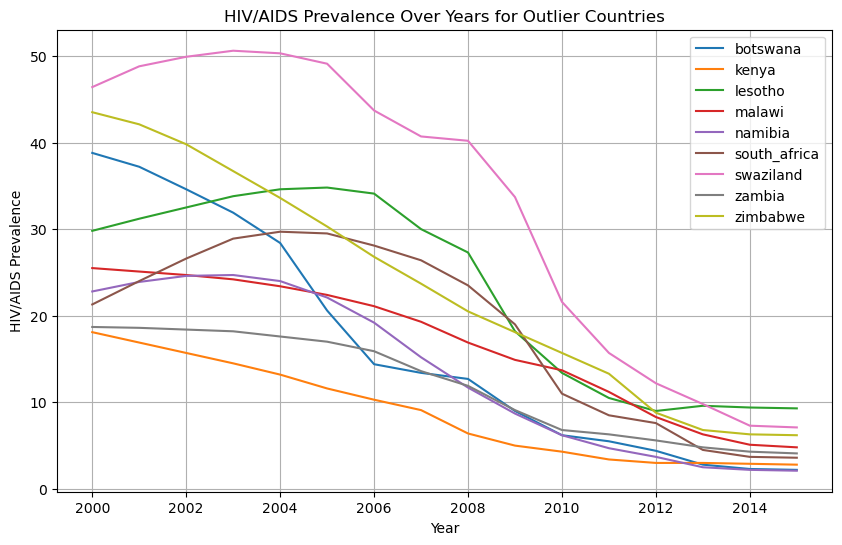

In [140]:
import matplotlib.pyplot as plt

# Filtered data for outlier countries
outlier_data_sorted = outlier_data_sorted.sort_values(by=['year'])

# Plotting line graphs for each country
plt.figure(figsize=(10, 6))
for country in outlier_countries:
    country_data = outlier_data_sorted[outlier_data_sorted['country'] == country]
    plt.plot(country_data['year'], country_data['hiv/aids'], label=country)

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('HIV/AIDS Prevalence')
plt.title('HIV/AIDS Prevalence Over Years for Outlier Countries')
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()


In [141]:
# Drop the 'hiv/aids' column
df_cleaned.drop('hiv/aids', axis=1, inplace=True)


### Polio

In [142]:
# Status

# Compute descriptive statistics for Polio column
Polio_stats = df_cleaned['polio'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Polio_stats:")
print(Polio_stats)


Descriptive statistics for Polio_stats:
count    2872.000000
mean       82.821727
std        23.088797
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: polio, dtype: float64


In [143]:
# Calculate mean and standard deviation
mean = df_cleaned['polio'].mean()
std = df_cleaned['polio'].std()

# Define outliers as those more than 3 standard deviations from the mean
lower_std = mean - 3 * std
upper_std = mean + 3 * std

# Filter the data for outliers but only to check countries
outlier_countries_std = df_cleaned[(df_cleaned['polio'] < lower_std) | (df_cleaned['polio'] > upper_std)]['country'].unique()

# Display the unique countries identified by the Standard Deviation method
print("Unique countries with outliers using Standard Deviation method:")
print(outlier_countries_std)

Unique countries with outliers using Standard Deviation method:
['afghanistan' 'angola' 'armenia' 'australia' 'azerbaijan' 'bangladesh'
 'barbados' 'belarus' 'benin' 'bhutan' 'bolivia_(plurinational_state_of)'
 'bosnia_and_herzegovina' 'burkina_faso' 'côte_divoire' 'cabo_verde'
 'cambodia' 'cameroon' 'canada' 'central_african_republic' 'chad' 'chile'
 'colombia' 'comoros' 'congo' 'costa_rica'
 'democratic_republic_of_the_congo' 'denmark' 'dominican_republic'
 'ecuador' 'el_salvador' 'equatorial_guinea' 'eritrea' 'ethiopia' 'gabon'
 'georgia' 'ghana' 'greece' 'guatemala' 'guinea' 'guyana' 'haiti'
 'iceland' 'indonesia' 'iraq' 'ireland' 'jamaica' 'kenya' 'kiribati'
 'lao_peoples_democratic_republic' 'lebanon' 'lesotho' 'liberia'
 'lithuania' 'madagascar' 'mali' 'mauritania' 'montenegro' 'mozambique'
 'myanmar' 'namibia' 'nepal' 'nicaragua' 'niger' 'nigeria' 'pakistan'
 'panama' 'papua_new_guinea' 'paraguay' 'peru' 'philippines'
 'republic_of_korea' 'rwanda' 'saint_lucia' 'samoa'
 'sao_to

### Measles

In [144]:
# Measles 

# Compute descriptive statistics for Measles column
Measles_stats = df_cleaned['measles'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Measles_stats:")
print(Measles_stats)


Descriptive statistics for Measles_stats:
count      2880.000000
mean       2434.806944
std       11570.250367
min           0.000000
25%           0.000000
50%          17.000000
75%         353.250000
max      212183.000000
Name: measles, dtype: float64


In [145]:
# Convert measles counts to cases per 1000 individuals
df_cleaned['measles_per_1000'] = (df_cleaned['measles'] / df_cleaned['population']) * 1000

# Compute descriptive statistics for the new column
measles_per_1000_stats = df_cleaned['measles_per_1000'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Measles cases per 1000 individuals:")
print(measles_per_1000_stats)


Descriptive statistics for Measles cases per 1000 individuals:
count    2880.000000
mean        0.092164
std         0.405418
min         0.000000
25%         0.000000
50%         0.002170
75%         0.026971
max         7.826503
Name: measles_per_1000, dtype: float64


In [146]:
# Calculate mean and standard deviation
mean = df_cleaned['measles'].mean()
std = df_cleaned['measles'].std()

# Define outliers as those more than 3 standard deviations from the mean
lower_std = mean - 3 * std
upper_std = mean + 3 * std

# Filter the data for outliers but only to check countries
outlier_countries_std = df_cleaned[(df_cleaned['measles'] < lower_std) | (df_cleaned['measles'] > upper_std)]['country'].unique()

# Display the unique countries identified by the Standard Deviation method
print("Unique countries with outliers using Standard Deviation method:")
print(outlier_countries_std)

Unique countries with outliers using Standard Deviation method:
['burkina_faso' 'china' 'democratic_republic_of_the_congo' 'india'
 'madagascar' 'malawi' 'niger' 'nigeria' 'philippines' 'uganda' 'ukraine']


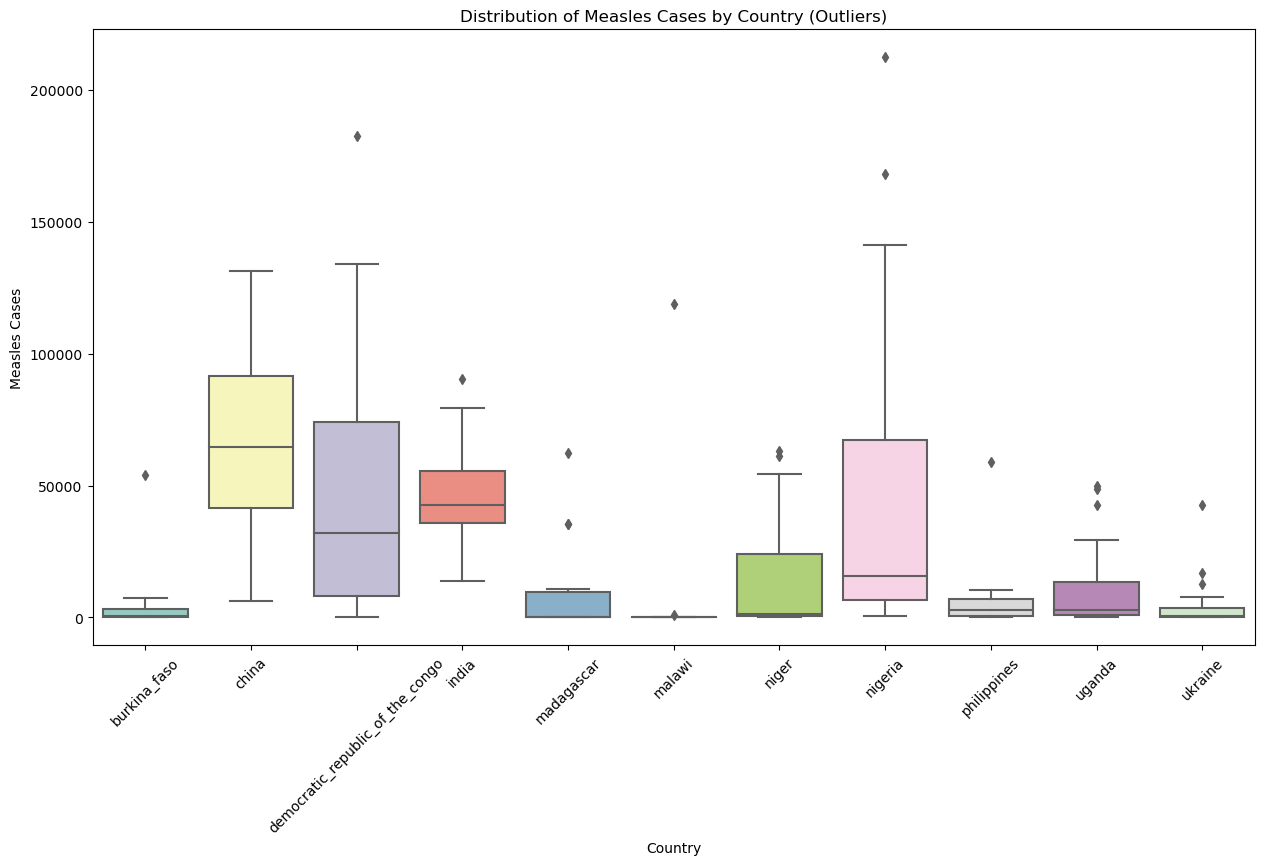

In [147]:
import seaborn as sns

# Filter the DataFrame for countries identified as outliers
outlier_data = df_cleaned[df_cleaned['country'].isin(outlier_countries_std)]

# Create a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=outlier_data, x='country', y='measles', palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribution of Measles Cases by Country (Outliers)')
plt.xlabel('Country')
plt.ylabel('Measles Cases')
plt.show()


In [148]:
# adult_mortality

# Compute descriptive statistics for adult_mortality column
adult_mortality_stats = df_cleaned['adult_mortality'].describe()

# Display the descriptive statistics
print("Descriptive statistics for adult_mortality_stats:")
print(adult_mortality_stats)


Descriptive statistics for adult_mortality_stats:
count    2880.000000
mean      162.965972
std       123.786683
min         1.000000
25%        73.000000
50%       142.000000
75%       225.000000
max       723.000000
Name: adult_mortality, dtype: float64


In [149]:
nan_count = df_cleaned['adult_mortality'].isna().sum()
print("Number of NaN values in adult_mortality column:", nan_count)


Number of NaN values in adult_mortality column: 0


In [150]:
min_mortality = df_cleaned['adult_mortality'].min()
max_mortality = df_cleaned['adult_mortality'].max()

print("Minimum adult mortality rate:", min_mortality)
print("Maximum adult mortality rate:", max_mortality)


Minimum adult mortality rate: 1.0
Maximum adult mortality rate: 723.0


In [151]:
import os
import pandas as pd

# Define the folder path
folder_path = os.path.join(os.path.expanduser("~"), "Desktop", "lifeexpectancy")

# Define the file name
file_name = "xmart.csv"

# Combine the folder path and file name
file_path = os.path.join(folder_path, file_name)

# Load the CSV file into a DataFrame, skipping the first row
df = pd.read_csv(file_path, skiprows=1)

# Manually set the column headers
column_headers = [
    "Country",
    "Year",
    "adult_mortality_rate",
    "Adult mortality rate (male)",
    "Adult mortality rate (female)"
]
df.columns = column_headers

# Display the first few rows of the DataFrame
print(df.head())



       Country  Year  adult_mortality_rate  Adult mortality rate (male)  \
0  Afghanistan  2016                   245                          272   
1  Afghanistan  2015                   233                          254   
2  Afghanistan  2014                   234                          254   
3  Afghanistan  2013                   235                          254   
4  Afghanistan  2012                   242                          262   

   Adult mortality rate (female)  
0                            216  
1                            210  
2                            213  
3                            215  
4                            221  


In [152]:
# Remove special characters and convert country names to lowercase
df['Country'] = df['Country'].str.replace('[^\w\s]', '').str.lower()

# Display the updated DataFrame
print(df.head())


       Country  Year  adult_mortality_rate  Adult mortality rate (male)  \
0  afghanistan  2016                   245                          272   
1  afghanistan  2015                   233                          254   
2  afghanistan  2014                   234                          254   
3  afghanistan  2013                   235                          254   
4  afghanistan  2012                   242                          262   

   Adult mortality rate (female)  
0                            216  
1                            210  
2                            213  
3                            215  
4                            221  


In [153]:
# Get unique country names from the original DataFrame
unique_countries_original = df_cleaned['country'].unique()

# Get unique country names from the modified DataFrame
unique_countries_modified = df['Country'].unique()

# Compare the country names
differences = set(unique_countries_original) - set(unique_countries_modified)

# Display the differences
print("Countries present in original DataFrame but not in modified DataFrame:")
print(differences)


Countries present in original DataFrame but not in modified DataFrame:
{'brunei_darussalam', 'guinea-bissau', 'netherlands', 'côte_divoire', 'costa_rica', 'south_africa', 'venezuela_(bolivarian_republic_of)', 'sri_lanka', 'timor-leste', 'bosnia_and_herzegovina', 'united_arab_emirates', 'democratic_republic_of_the_congo', 'turkey', 'united_republic_of_tanzania', 'dominican_republic', 'russian_federation', 'antigua_and_barbuda', 'saint_lucia', 'central_african_republic', 'el_salvador', 'viet_nam', 'republic_of_korea', 'iran_(islamic_republic_of)', 'lao_peoples_democratic_republic', 'papua_new_guinea', 'saint_vincent_and_the_grenadines', 'burkina_faso', 'sierra_leone', 'solomon_islands', 'united_states_of_america', 'micronesia_(federated_states_of)', 'trinidad_and_tobago', 'bolivia_(plurinational_state_of)', 'new_zealand', 'syrian_arab_republic', 'swaziland', 'the_former_yugoslav_republic_of_macedonia', 'equatorial_guinea', 'saudi_arabia', 'republic_of_moldova', 'cabo_verde', 'united_king

In [154]:
# Get unique country names from the original DataFrame
unique_countries_original = df_cleaned['country'].unique()

# Get unique country names from the modified DataFrame
unique_countries_modified = df['Country'].unique()

# Compare the country names
differences_original = set(unique_countries_original) - set(unique_countries_modified)
differences_modified = set(unique_countries_modified) - set(unique_countries_original)

# Display the differences
print("Countries present in original DataFrame but not in modified DataFrame:")
print(differences_original)

print("\nCountries present in modified DataFrame but not in original DataFrame:")
print(differences_modified)


Countries present in original DataFrame but not in modified DataFrame:
{'brunei_darussalam', 'guinea-bissau', 'netherlands', 'côte_divoire', 'costa_rica', 'south_africa', 'venezuela_(bolivarian_republic_of)', 'sri_lanka', 'timor-leste', 'bosnia_and_herzegovina', 'united_arab_emirates', 'democratic_republic_of_the_congo', 'turkey', 'united_republic_of_tanzania', 'dominican_republic', 'russian_federation', 'antigua_and_barbuda', 'saint_lucia', 'central_african_republic', 'el_salvador', 'viet_nam', 'republic_of_korea', 'iran_(islamic_republic_of)', 'lao_peoples_democratic_republic', 'papua_new_guinea', 'saint_vincent_and_the_grenadines', 'burkina_faso', 'sierra_leone', 'solomon_islands', 'united_states_of_america', 'micronesia_(federated_states_of)', 'trinidad_and_tobago', 'bolivia_(plurinational_state_of)', 'new_zealand', 'syrian_arab_republic', 'swaziland', 'the_former_yugoslav_republic_of_macedonia', 'equatorial_guinea', 'saudi_arabia', 'republic_of_moldova', 'cabo_verde', 'united_king

In [155]:
# Mapping dictionary for matching modified country names to original ones
country_mapping = {
    'guineabissau': 'guinea-bissau',
    'new zealand': 'new_zealand',
    'north macedonia': 'the_former_yugoslav_republic_of_macedonia',
    'trinidad and tobago': 'trinidad_and_tobago',
    'central african republic': 'central_african_republic',
    'iran islamic republic of': 'iran_(islamic_republic_of)',
    'democratic republic of the congo': 'democratic_republic_of_the_congo',
    'sierra leone': 'sierra_leone',
    'bolivia plurinational state of': 'bolivia_(plurinational_state_of)',
    'somalia': 'somalia',
    'venezuela bolivarian republic of': 'venezuela_(bolivarian_republic_of)',
    'syrian arab republic': 'syrian_arab_republic',
    'bosnia and herzegovina': 'bosnia_and_herzegovina',
    'burkina faso': 'burkina_faso',
    'cabo verde': 'cabo_verde',
    'micronesia federated states of': 'micronesia_(federated_states_of)',
    'united states of america': 'united_states_of_america',
    'viet nam': 'viet_nam',
    'cote divoire': 'côte_divoire',
    'lao peoples democratic republic': 'lao_peoples_democratic_republic',
    'timorleste': 'timor-leste',
    'netherlands kingdom of the': 'netherlands',
    'saint vincent and the grenadines': 'saint_vincent_and_the_grenadines',
    'united republic of tanzania': 'united_republic_of_tanzania',
    'democratic peoples republic of korea': 'republic_of_korea',
    'eswatini': 'swaziland',
    'antigua and barbuda': 'antigua_and_barbuda',
    'sao tome and principe': 'sao_tome_and_principe',
    'dominican republic': 'dominican_republic',
    'saint lucia': 'saint_lucia',
    'south sudan': 'south_sudan',
    'saudi arabia': 'saudi_arabia',
    'equatorial guinea': 'equatorial_guinea',
    'solomon islands': 'solomon_islands',
    'el salvador': 'el_salvador',
    'republic of korea': 'republic_of_korea',
    'costa rica': 'costa_rica',
    'united arab emirates': 'united_arab_emirates',
    'republic of moldova': 'republic_of_moldova',
    'turkiye': 'turkey',
    'brunei darussalam': 'brunei_darussalam',
    'united kingdom of great britain and northern ireland': 'united_kingdom_of_great_britain_and_northern_ireland',
    'russian federation': 'russian_federation',
    'sri lanka': 'sri_lanka',
    'south africa': 'south_africa',
    'papua new guinea': 'papua_new_guinea'
}

# Replace modified country names with original ones
df['Country'] = df['Country'].replace(country_mapping)

# Display unique country names in the original DataFrame
unique_countries_original = df_cleaned['country'].unique()

# Display unique country names in the modified DataFrame after mapping
unique_countries_modified = df['Country'].unique()

# Compare the country names again
differences_original = set(unique_countries_original) - set(unique_countries_modified)
differences_modified = set(unique_countries_modified) - set(unique_countries_original)

# Display the differences
print("Countries present in original DataFrame but not in modified DataFrame:")
print(differences_original)

print("\nCountries present in modified DataFrame but not in original DataFrame:")
print(differences_modified)



Countries present in original DataFrame but not in modified DataFrame:
set()

Countries present in modified DataFrame but not in original DataFrame:
{'somalia', 'south_sudan'}


In [156]:
# Drop countries 'south_sudan' and 'somalia' from the modified DataFrame
df.drop(df[df['Country'].isin(['south_sudan', 'somalia'])].index, inplace=True)

# Verify the drop operation
print("Countries present in modified DataFrame after dropping:")
print(df['Country'].unique())


Countries present in modified DataFrame after dropping:
['afghanistan' 'albania' 'algeria' 'angola' 'antigua_and_barbuda'
 'argentina' 'armenia' 'australia' 'austria' 'azerbaijan' 'bahamas'
 'bahrain' 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin'
 'bhutan' 'bolivia_(plurinational_state_of)' 'bosnia_and_herzegovina'
 'botswana' 'brazil' 'brunei_darussalam' 'bulgaria' 'burkina_faso'
 'burundi' 'côte_divoire' 'cabo_verde' 'cambodia' 'cameroon' 'canada'
 'central_african_republic' 'chad' 'chile' 'china' 'colombia' 'comoros'
 'congo' 'costa_rica' 'croatia' 'cuba' 'cyprus' 'czechia'
 'republic_of_korea' 'democratic_republic_of_the_congo' 'denmark'
 'djibouti' 'dominican_republic' 'ecuador' 'egypt' 'el_salvador'
 'equatorial_guinea' 'eritrea' 'estonia' 'swaziland' 'ethiopia' 'fiji'
 'finland' 'france' 'gabon' 'gambia' 'georgia' 'germany' 'ghana' 'greece'
 'grenada' 'guatemala' 'guinea' 'guinea-bissau' 'guyana' 'haiti'
 'honduras' 'hungary' 'iceland' 'india' 'indonesia'
 'iran_(

In [157]:
# Drop rows where 'Year' is 2016
df = df[df['Year'] != 2016]

# Display the updated DataFrame
print(df.head())


       Country  Year  adult_mortality_rate  Adult mortality rate (male)  \
1  afghanistan  2015                   233                          254   
2  afghanistan  2014                   234                          254   
3  afghanistan  2013                   235                          254   
4  afghanistan  2012                   242                          262   
5  afghanistan  2011                   248                          268   

   Adult mortality rate (female)  
1                            210  
2                            213  
3                            215  
4                            221  
5                            227  


In [158]:
# Find the rows for Afghanistan in df_cleaned
afghanistan_cleaned = df_cleaned[df_cleaned['country'] == 'afghanistan']

# Find the rows for Afghanistan in df
afghanistan_original = df[df['Country'] == 'afghanistan']

# Print out the 'adult_mortality' values for Afghanistan in both DataFrames
print("Adult mortality for Afghanistan in df_cleaned:")
print(afghanistan_cleaned[['country', 'year', 'adult_mortality']])

print("\nAdult mortality rate for Afghanistan in df:")
print(afghanistan_original[['Country', 'Year', 'adult_mortality_rate']])


Adult mortality for Afghanistan in df_cleaned:
        country  year  adult_mortality
0   afghanistan  2015            263.0
1   afghanistan  2014            271.0
2   afghanistan  2013            268.0
3   afghanistan  2012            272.0
4   afghanistan  2011            275.0
5   afghanistan  2010            279.0
6   afghanistan  2009            281.0
7   afghanistan  2008            287.0
8   afghanistan  2007            295.0
9   afghanistan  2006            295.0
10  afghanistan  2005            291.0
11  afghanistan  2004            293.0
12  afghanistan  2003            295.0
13  afghanistan  2002              3.0
14  afghanistan  2001            316.0
15  afghanistan  2000            321.0

Adult mortality rate for Afghanistan in df:
        Country  Year  adult_mortality_rate
1   afghanistan  2015                   233
2   afghanistan  2014                   234
3   afghanistan  2013                   235
4   afghanistan  2012                   242
5   afghanistan  2011    

In [159]:
print("Columns in df_cleaned:")
print(df_cleaned.columns)

print("\nColumns in df:")
print(df.columns)


Columns in df_cleaned:
Index(['country', 'year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'thinness_1-19_years', 'thinness_5-9_years', 'schooling',
       'gdp', 'population', 'Developing', 'measles_per_1000'],
      dtype='object')

Columns in df:
Index(['Country', 'Year', 'adult_mortality_rate',
       'Adult mortality rate (male)', 'Adult mortality rate (female)'],
      dtype='object')


In [160]:
# Rename columns in df to match df_cleaned
df.rename(columns={'Country': 'country', 'Year': 'year', 
                   'adult_mortality': 'adult_mortality'}, inplace=True)


In [161]:
# Drop the 'adult_mortality' column from df_cleaned
df_cleaned.drop('adult_mortality', axis=1, inplace=True)

# Rename the 'adult_mortality_rate' column in df to 'adult_mortality'
df.rename(columns={'adult_mortality_rate': 'adult_mortality'}, inplace=True)

# Merge df and df_cleaned on 'country' and 'year' columns
df_cleaned = pd.merge(df_cleaned, df[['country', 'year', 'adult_mortality']], on=['country', 'year'])

# Verify the updated DataFrame
print(df_cleaned.head())


       country  year  life_expectancy  infant_deaths  alcohol  \
0  afghanistan  2015             65.0             62     0.01   
1  afghanistan  2014             59.9             64     0.01   
2  afghanistan  2013             59.9             66     0.01   
3  afghanistan  2012             59.5             69     0.01   
4  afghanistan  2011             59.2             71     0.01   

   percentage_expenditure  hepatitis_b  measles  under-five_deaths  polio  \
0               71.279624         65.0     1154                 83    6.0   
1               73.523582         62.0      492                 86   58.0   
2               73.219243         64.0      430                 89   62.0   
3               78.184215         67.0     2787                 93   67.0   
4                7.097109         68.0     3013                 97   68.0   

   total_expenditure  diphtheria  thinness_1-19_years  thinness_5-9_years  \
0               8.16        65.0                 17.2                

In [162]:
# adult_mortality

# Compute descriptive statistics for adult_mortality column
adult_mortality_stats = df_cleaned['adult_mortality'].describe()

# Display the descriptive statistics
print("Descriptive statistics for adult_mortality_stats:")
print(adult_mortality_stats)

Descriptive statistics for adult_mortality_stats:
count    2896.000000
mean      193.696823
std       114.656887
min        50.000000
25%       108.000000
50%       165.000000
75%       250.000000
max       697.000000
Name: adult_mortality, dtype: float64


In [163]:
# Find the country with the maximum adult mortality rate
max_country = df_cleaned.loc[df_cleaned['adult_mortality'].idxmax(), 'country']
max_mortality_rate = df_cleaned['adult_mortality'].max()

# Print the result
print("Country with the maximum adult mortality rate:")
print(f"Country: {max_country}, Maximum Adult Mortality Rate: {max_mortality_rate}")


Country with the maximum adult mortality rate:
Country: zimbabwe, Maximum Adult Mortality Rate: 697


In [164]:
# Find the country with the minimum adult mortality rate
min_country = df_cleaned.loc[df_cleaned['adult_mortality'].idxmin(), 'country']
min_mortality_rate = df_cleaned['adult_mortality'].min()

# Print the result
print("Country with the minimum adult mortality rate:")
print(f"Country: {min_country}, Minimum Adult Mortality Rate: {min_mortality_rate}")

Country with the minimum adult mortality rate:
Country: iceland, Minimum Adult Mortality Rate: 50


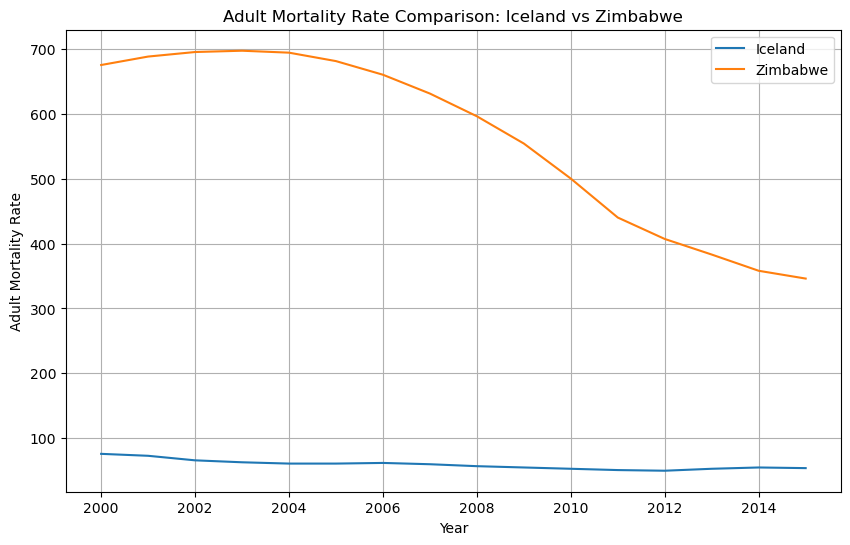

In [165]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Iran and Tonga
iceland_data = df_cleaned[df_cleaned['country'] == 'iceland']
zimbabwe_data = df_cleaned[df_cleaned['country'] == 'zimbabwe']

# Plot the line charts MIN MAX 
plt.figure(figsize=(10, 6))
plt.plot(iceland_data['year'], iceland_data['adult_mortality'], label='Iceland')
plt.plot(zimbabwe_data['year'], zimbabwe_data['adult_mortality'], label='Zimbabwe')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.title('Adult Mortality Rate Comparison: Iceland vs Zimbabwe')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [166]:
# thinness_1-19_years

# Compute descriptive statistics for thinness_1-19_years column
thinness_1_19_years_stats = df_cleaned['thinness_1-19_years'].describe()

# Display the descriptive statistics
print("Descriptive statistics for thinness_1-19_years:")
print(thinness_1_19_years_stats)


Descriptive statistics for thinness_1-19_years:
count    2880.000000
mean        4.815521
std         4.435756
min         0.100000
25%         1.600000
50%         3.300000
75%         7.200000
max        27.700000
Name: thinness_1-19_years, dtype: float64


In [167]:
# Find the country with the maximum 'thinness_1-19_years'
max_country = df_cleaned.loc[df_cleaned['thinness_1-19_years'].idxmax(), 'country']
max_thinness_rate = df_cleaned['thinness_1-19_years'].max()

# Find the country with the minimum 'thinness_1-19_years'
min_country = df_cleaned.loc[df_cleaned['thinness_1-19_years'].idxmin(), 'country']
min_thinness_rate = df_cleaned['thinness_1-19_years'].min()

# Print the results
print("Country with the maximum 'thinness_1-19_years' rate:")
print(f"Country: {max_country}, Maximum Rate: {max_thinness_rate}")
print("Country with the minimum 'thinness_1-19_years' rate:")
print(f"Country: {min_country}, Minimum Rate: {min_thinness_rate}")



Country with the maximum 'thinness_1-19_years' rate:
Country: india, Maximum Rate: 27.7
Country with the minimum 'thinness_1-19_years' rate:
Country: kiribati, Minimum Rate: 0.1


In [168]:
# Filter the DataFrame for India and Kiribati
countries_data = df_cleaned[df_cleaned['country'].isin(['india', 'kiribati'])]

# Select only the columns for country, year, and 'thinness_1-19_years'
countries_data = countries_data[['country', 'year', 'thinness_1-19_years']]

# Print the data
print(countries_data)


       country  year  thinness_1-19_years
1168     india  2015                 26.7
1169     india  2014                 26.8
1170     india  2013                 26.8
1171     india  2012                 26.9
1172     india  2011                 26.9
1173     india  2010                 27.0
1174     india  2009                 27.0
1175     india  2008                 27.0
1176     india  2007                 27.1
1177     india  2006                 27.1
1178     india  2005                 27.2
1179     india  2004                 27.2
1180     india  2003                 27.3
1181     india  2002                 27.4
1182     india  2001                 27.5
1183     india  2000                 27.7
1360  kiribati  2015                  0.1
1361  kiribati  2014                  0.1
1362  kiribati  2013                  0.1
1363  kiribati  2012                  0.1
1364  kiribati  2011                  0.1
1365  kiribati  2010                  0.1
1366  kiribati  2009              

In [169]:
# Check for NaN values in the 'thinness_1-19_years' column
nans_thinness = df_cleaned['thinness_1-19_years'].isna().sum()

# Print the number of NaN values
print(f"Number of NaN values in 'thinness_1-19_years': {nans_thinness}")


Number of NaN values in 'thinness_1-19_years': 16


In [170]:
# Filter the DataFrame to find rows where 'thinness_1-19_years' is NaN
nan_countries = df_cleaned[df_cleaned['thinness_1-19_years'].isna()]

# Select only the columns for country and year to see when the NaN values occur
nan_countries = nan_countries[['country', 'year', 'thinness_1-19_years']]

# Print the countries and years with NaN values
print("Countries and years with NaN values for 'thinness_1-19_years':")
print(nan_countries)


Countries and years with NaN values for 'thinness_1-19_years':
     country  year  thinness_1-19_years
2416   sudan  2015                  NaN
2417   sudan  2014                  NaN
2418   sudan  2013                  NaN
2419   sudan  2012                  NaN
2420   sudan  2011                  NaN
2421   sudan  2010                  NaN
2422   sudan  2009                  NaN
2423   sudan  2008                  NaN
2424   sudan  2007                  NaN
2425   sudan  2006                  NaN
2426   sudan  2005                  NaN
2427   sudan  2004                  NaN
2428   sudan  2003                  NaN
2429   sudan  2002                  NaN
2430   sudan  2001                  NaN
2431   sudan  2000                  NaN


In [171]:
# Remove all entries for Sudan from the DataFrame
df_cleaned = df_cleaned[df_cleaned['country'] != 'sudan']

# Check to ensure Sudan has been removed
if 'Sudan' not in df_cleaned['country'].unique():
    print("Sudan has been successfully removed from the dataset.")
else:
    print("Sudan is still present in the dataset.")


Sudan has been successfully removed from the dataset.


In [172]:
#5-9

In [173]:
# Compute descriptive statistics for thinness_5-9_years column
thinness_5_9_years_stats = df_cleaned['thinness_5-9_years'].describe()

# Display the descriptive statistics
print("Descriptive statistics for thinness_5-9_years:")
print(thinness_5_9_years_stats)



Descriptive statistics for thinness_5-9_years:
count    2880.000000
mean        4.844583
std         4.527764
min         0.100000
25%         1.500000
50%         3.300000
75%         7.200000
max        28.600000
Name: thinness_5-9_years, dtype: float64


In [174]:
# Find the country with the maximum 'thinness_5-9_years'
max_country_5_9 = df_cleaned.loc[df_cleaned['thinness_5-9_years'].idxmax(), 'country']
max_thinness_rate_5_9 = df_cleaned['thinness_5-9_years'].max()

# Find the country with the minimum 'thinness_5-9_years'
min_country_5_9 = df_cleaned.loc[df_cleaned['thinness_5-9_years'].idxmin(), 'country']
min_thinness_rate_5_9 = df_cleaned['thinness_5-9_years'].min()

# Print the results
print("Country with the maximum 'thinness_5-9_years' rate:")
print(f"Country: {max_country_5_9}, Maximum Rate: {max_thinness_rate_5_9}")
print("Country with the minimum 'thinness_5-9_years' rate:")
print(f"Country: {min_country_5_9}, Minimum Rate: {min_thinness_rate_5_9}")


Country with the maximum 'thinness_5-9_years' rate:
Country: india, Maximum Rate: 28.6
Country with the minimum 'thinness_5-9_years' rate:
Country: kiribati, Minimum Rate: 0.1


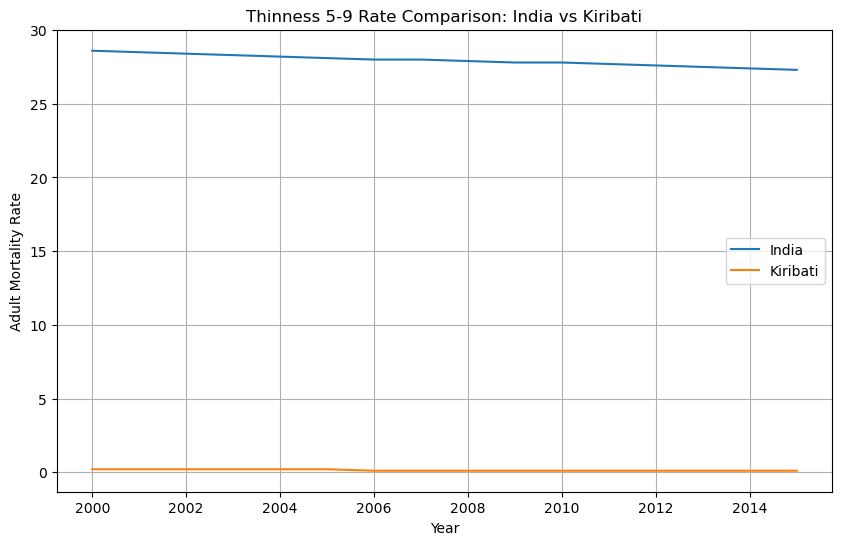

In [175]:
# Filter the DataFrame for India and Kiribati
india_data = df_cleaned[df_cleaned['country'] == 'india']
kiribati_data = df_cleaned[df_cleaned['country'] == 'kiribati']

# Plot the line charts MIN MAX 
plt.figure(figsize=(10, 6))
plt.plot(india_data['year'], india_data['thinness_5-9_years'], label='India')
plt.plot(kiribati_data['year'], kiribati_data['thinness_5-9_years'], label='Kiribati')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.title('Thinness 5-9 Rate Comparison: India vs Kiribati')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [176]:
#infant_deaths

# Compute descriptive statistics for infant_deaths column
infant_deaths_stats = df_cleaned['infant_deaths'].describe()

# Display the descriptive statistics
print("Descriptive statistics for infant_deaths:")
print(infant_deaths_stats)


Descriptive statistics for infant_deaths:
count    2880.000000
mean       30.080556
std       119.066287
min         0.000000
25%         0.000000
50%         3.000000
75%        20.000000
max      1800.000000
Name: infant_deaths, dtype: float64


In [177]:
# Filter the DataFrame for rows where 'infant_deaths' is zero
zero_infant_deaths_data = df_cleaned[df_cleaned['infant_deaths'] == 0]

# Select only the columns for country, year, and 'infant_deaths'
zero_infant_deaths_data = zero_infant_deaths_data[['country', 'year', 'infant_deaths']]

# Print the data
print("Countries and years with zero infant deaths:")
print(zero_infant_deaths_data)


Countries and years with zero infant deaths:
      country  year  infant_deaths
16    albania  2015              0
17    albania  2014              0
18    albania  2013              0
19    albania  2012              0
20    albania  2011              0
...       ...   ...            ...
2811  vanuatu  2004              0
2812  vanuatu  2003              0
2813  vanuatu  2002              0
2814  vanuatu  2001              0
2815  vanuatu  2000              0

[838 rows x 3 columns]


In [178]:
# Filter the DataFrame for rows where 'infant_deaths' is zero
zero_infant_deaths_data = df_cleaned[df_cleaned['infant_deaths'] == 0]

# Get unique countries with zero infant deaths
unique_countries_with_zero_infant_deaths = zero_infant_deaths_data['country'].unique()

# Print the unique countries
print("Countries with zero infant deaths:")
print(unique_countries_with_zero_infant_deaths)


Countries with zero infant deaths:
['albania' 'antigua_and_barbuda' 'austria' 'bahamas' 'bahrain' 'barbados'
 'belarus' 'belgium' 'belize' 'bhutan' 'bosnia_and_herzegovina'
 'brunei_darussalam' 'bulgaria' 'cabo_verde' 'croatia' 'cyprus' 'czechia'
 'denmark' 'estonia' 'fiji' 'finland' 'greece' 'grenada' 'guyana'
 'hungary' 'iceland' 'ireland' 'israel' 'kiribati' 'kuwait' 'latvia'
 'lithuania' 'luxembourg' 'maldives' 'malta' 'mauritius'
 'micronesia_(federated_states_of)' 'montenegro' 'new_zealand' 'norway'
 'portugal' 'qatar' 'saint_lucia' 'saint_vincent_and_the_grenadines'
 'samoa' 'sao_tome_and_principe' 'seychelles' 'singapore' 'slovakia'
 'slovenia' 'solomon_islands' 'suriname' 'sweden' 'switzerland'
 'the_former_yugoslav_republic_of_macedonia' 'tonga' 'trinidad_and_tobago'
 'uruguay' 'vanuatu']


In [179]:
# Filter the DataFrame for rows where 'infant_deaths' is zero
zero_infant_deaths_data = df_cleaned[df_cleaned['infant_deaths'] == 0]

# Get unique countries with zero infant deaths
unique_countries_with_zero_infant_deaths = zero_infant_deaths_data['country'].unique()

# Iterate over the unique countries in chunks of 2
for i in range(0, len(unique_countries_with_zero_infant_deaths), 2):
    batch = unique_countries_with_zero_infant_deaths[i:i+2]
    # Display the countries and years for each batch
    print("Countries with zero infant deaths:")
    for country in batch:
        # Filter data for the specific country
        country_data = zero_infant_deaths_data[zero_infant_deaths_data['country'] == country]
        # Display the country, years, and number of infant deaths
        print(f"Country: {country}")
        print(country_data[['year', 'infant_deaths']])
        print()

# Check if there are any countries left in the last batch if total count is odd
if len(unique_countries_with_zero_infant_deaths) % 2 == 1:
    last_country = unique_countries_with_zero_infant_deaths[-1]
    last_country_data = zero_infant_deaths_data[zero_infant_deaths_data['country'] == last_country]
    print(f"Country: {last_country}")
    print(last_country_data[['year', 'infant_deaths']])


Countries with zero infant deaths:
Country: albania
    year  infant_deaths
16  2015              0
17  2014              0
18  2013              0
19  2012              0
20  2011              0

Country: antigua_and_barbuda
    year  infant_deaths
64  2015              0
65  2014              0
66  2013              0
67  2012              0
68  2011              0
69  2010              0
70  2009              0
71  2008              0
72  2007              0
73  2006              0
74  2005              0
75  2004              0
76  2003              0
77  2002              0
78  2001              0
79  2000              0

Countries with zero infant deaths:
Country: austria
     year  infant_deaths
128  2015              0
129  2014              0
130  2013              0
131  2012              0
132  2011              0
133  2010              0
134  2009              0
135  2008              0
136  2007              0
137  2006              0
138  2005              0
139  2004    

In [180]:
# Data provided for Albania, Belarus, Bhutan, Bulgaria, Guyana, Kuwait, and Antigua and Barbuda
data_updates = {
    'albania': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [24.08, 22.91, 21.67, 20.41, 19.13, 17.84, 16.55, 15.29, 14.09, 12.95, 11.87, 10.85, 9.99, 9.31, 8.83, 8.52]
    },
    'belarus': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [9.96, 9.2, 8.49, 7.85, 7.28, 6.73, 6.16, 5.59, 5.08, 4.63, 4.26, 3.95, 3.69, 3.47, 3.28, 3.1]
    },
    'bhutan': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [57.40, 54.72, 52.13, 49.61, 47.11, 44.68, 42.34, 40.11, 37.97, 35.98, 34.11, 32.48, 31.02, 29.72, 28.55, 27.44]
    },
    'bulgaria': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [14.28, 13.74, 13.2, 12.54, 11.8, 11.04, 10.36, 9.83, 9.51, 9.31, 9.07, 8.7, 8.24, 7.74, 7.25, 6.81]
    },
    'guyana': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [37.12, 36.30, 35.50, 34.75, 34.08, 33.42, 32.81, 32.19, 31.59, 31.03, 30.51, 29.97, 29.42, 28.79, 28.14, 27.38]
    },
    'kuwait': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [11, 10.79, 10.63, 10.46, 10.29, 10.11, 9.96, 9.82, 9.66, 9.46, 9.2, 8.88, 8.53, 8.22, 7.98, 7.79]
    },
    'antigua_and_barbuda': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [12.6, 12.29, 11.93, 11.51, 11.07, 10.6, 10.14, 9.67, 9.21, 9.61, 8.33, 7.91, 7.5, 7.13, 6.78, 6.48]
    },
    'austria': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.59, 4.52, 4.44, 4.33, 4.21, 4.07, 3.94, 3.84, 3.76, 3.68, 3.58, 3.47, 3.34, 3.21, 3.1, 3.02]
},
    'bahamas': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [13.96, 14.06, 14.23, 14.41, 14.52, 14.53, 14.43, 14.22, 13.94, 13.63, 13.31, 12.99, 12.7, 12.44, 12.22, 12.04]
},
    'bahrain': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [10.74, 10.31, 9.98, 9.7, 9.43, 9.14, 8.79, 8.41, 8.01, 7.61, 7.25, 6.97, 6.75, 6.58, 6.46, 6.36]
},
    'barbados': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [13.76, 13.99, 14.19, 14.34, 14.42, 14.4, 14.32, 14.20, 14.06, 13.93, 13.82, 13.71, 13.62, 13.46, 13.29, 13.04]
},

'belgium': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.85, 4.7, 4.55, 4.4, 4.27, 4.15, 4.05, 3.95, 3.85, 3.76, 3.67, 3.59, 3.51, 3.45, 3.39, 3.36]
},
    'belize': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [20.03, 19.43, 18.92, 18.49, 18.15, 17.85, 17.59, 17.31, 17.0, 16.65, 16.22, 15.73, 15.17, 14.55, 13.87, 13.18]
},
    'bosnia_and_herzegovina': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [8.69, 8.4, 8.19, 8.05, 7.92, 7.76, 7.52, 7.23, 6.9, 6.57, 6.26, 6.0, 5.79, 5.64, 5.42, 5.43]
},
    'brunei_darussalam': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [8.22, 8.01, 7.86, 7.75, 7.69, 7.66, 7.69, 7.69, 7.74, 7.82, 7.93, 8.06, 8.21, 8.39, 8.58, 8.78]
    },
    'cabo_verde': {
        'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        'infant_deaths': [31.04, 28.38, 26.24, 24.80, 23.93, 23.50, 23.35, 23.29, 23.14, 22.83, 22.28, 21.49, 20.50, 19.37, 18.13, 16.88]
    },
    'croatia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [7.16, 6.88, 6.6, 6.32, 6.04, 5.77, 5.51, 5.27, 5.05, 4.85, 4.68, 4.53, 4.41, 4.32, 4.24, 4.18]
},
    'cyprus': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.69, 5.32, 4.96, 4.61, 4.28, 3.96, 3.69, 3.45, 3.25, 3.08, 2.93, 2.78, 2.64, 2.51, 2.41, 2.33]
},
    'czechia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.5, 4.26, 4.08, 3.9, 3.72, 3.54, 3.36, 3.18, 3.01, 2.86, 2.73, 2.63, 2.57, 2.54, 2.53, 2.55]
},
'denmark': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.68, 4.59, 4.49, 4.35, 4.21, 4.05, 3.9, 3.76, 3.64, 3.55, 3.49, 3.47, 3.48, 3.49, 3.5, 3.49]
},
'estonia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [8.72, 8.01, 7.35, 6.73, 6.15, 5.63, 5.14, 4.7, 4.3, 3.93, 3.6, 3.31, 3.06, 2.83, 2.62, 2.43]
},

'fiji': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [19.21, 19.15, 19.18, 19.31, 19.52, 19.76, 19.98, 20.15, 20.21, 20.19, 20.11, 20.06, 20.06, 20.15, 20.39, 20.72]
},
'finland': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [3.52, 3.43, 3.34, 3.26, 3.17, 3.08, 2.97, 2.85, 2.72, 2.6, 2.48, 2.37, 2.27, 2.18, 2.1, 2.04]
},

'grenada': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [12.85, 12.80, 12.79, 12.80, 12.83, 12.86, 12.90, 12.96, 13.06, 13.19, 13.33, 13.50, 13.69, 13.88, 14.06, 14.22]
},
'greece': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.62, 5.23, 4.88, 4.56, 4.27, 4.01, 3.79, 3.61, 3.5, 3.43, 3.42, 3.46, 3.54, 3.65, 3.76, 3.84]
},

    'hungary': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [8.68, 8.16, 7.64, 7.15, 6.74, 6.4, 6.1, 5.8, 5.5, 5.25, 5.07, 4.93, 4.83, 4.71, 4.51, 4.24]
},
    'iceland': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [3.21, 3.02, 2.84, 2.69, 2.56, 2.45, 2.35, 2.27, 2.21, 2.16, 2.12, 2.10, 2.09, 2.09, 2.09, 2.09]
},
 'ireland': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.98, 5.77, 5.45, 5.08, 4.71, 4.38, 4.11, 3.9, 3.76, 3.64, 3.55, 3.46, 3.39, 3.33, 3.26, 3.18]
},

'israel': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.58, 5.37, 5.16, 4.94, 4.71, 4.48, 4.28, 4.1, 3.94, 3.79, 3.67, 3.55, 3.43, 3.33, 3.24, 3.16]
},

'kiribati': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [51.51, 50.54, 49.82, 49.37, 49.21, 49.30, 49.54, 49.79, 49.91, 49.73, 49.32, 48.55, 47.73, 46.78, 45.71, 44.67]
},
'latvia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [11.5, 10.85, 10.26, 9.68, 9.13, 8.62, 8.14, 7.71, 7.31, 6.91, 6.5, 6.05, 5.58, 5.09, 4.65, 4.29]
},
'lithuania': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [8.56, 8.21, 7.91, 7.69, 7.48, 7.23, 6.9, 6.46, 5.95, 5.4, 4.89, 4.47, 4.2, 4.1, 4.05, 3.97]
},
    'luxembourg': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [3.75, 3.52, 3.3, 3.11, 2.93, 2.78, 2.65, 2.54, 2.45, 2.38, 2.33, 2.3, 2.28, 2.27, 2.27, 2.27]
},
'maldives': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [30.78, 28.6, 25.58, 22.83, 21.39, 18.31, 16.54, 15.08, 13.86, 12.82, 11.93, 11.14, 10.42, 9.72, 9.04, 8.38]
},
'malta': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [6.71, 6.49, 6.32, 6.19, 6.11, 6.05, 6.02, 6.0, 6.0, 5.99, 5.98, 5.96, 5.94, 5.9, 5.84, 5.77]
},
    'mauritius': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [16.61, 15.28, 14.36, 13.81, 13.53, 13.38, 13.23, 12.97, 12.65, 12.49, 12.55, 12.72, 12.87, 12.95, 12.94, 12.88]
},
    'micronesia_(federated_states_of)': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [31.31, 30.63, 31.84, 29.75, 29.57, 29.53, 29.5, 29.46, 29.23, 28.86, 28.42, 27.85, 27.31, 26.56, 25.85, 25.15]
},
    'montenegro': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [12.59, 12.05, 11.43, 10.73, 9.99, 9.24, 8.5, 7.77, 7.08, 6.43, 5.82, 5.26, 4.75, 4.28, 3.86, 3.48]
},
    'new_zealand': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [6.09, 5.94, 5.81, 5.69, 5.57, 5.48, 5.41, 5.35, 5.29, 5.23, 5.16, 5.07, 4.97, 4.85, 4.71, 4.58]
},
    'norway': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [3.94, 3.82, 3.7, 3.56, 3.42, 3.29, 3.16, 3.03, 2.91, 2.78, 2.66, 2.55, 2.45, 2.37, 2.29, 2.21]
},
    'portugal': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.53, 5.12, 4.69, 4.27, 3.91, 3.62, 3.43, 3.29, 3.19, 3.12, 3.06, 3.01, 2.98, 2.96, 2.96, 2.97]
},
    'qatar': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [10.75, 10.35, 9.96, 9.59, 9.25, 8.95, 8.66, 8.44, 8.22, 8.02, 7.84, 7.66, 7.46, 7.23, 6.96, 6.64]
},
    'saint_lucia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [15.65, 15.64, 15.67, 15.74, 15.86, 16.0, 16.19, 16.42, 16.69, 16.99, 17.33, 17.71, 18.13, 18.58, 19.06, 19.58]
},
    'saint_vincent_and_the_grenadines': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [19.27, 19.21, 19.14, 19.09, 19.02, 18.96, 18.87, 18.73, 18.5, 18.18, 17.77, 17.29, 16.79, 16.28, 15.77, 15.28]
},
    'samoa': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [18.13, 17.59, 17.15, 16.83, 16.62, 16.51, 16.48, 16.52, 16.57, 18.83, 16.58, 16.51, 16.38, 16.24, 16.09, 15.93]
},
    'sao_tome_and_principe': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [54.54, 51.54, 48.23, 45.20, 42.26, 39.46, 36.82, 34.37, 32.06, 29.87, 27.82, 25.85, 23.94, 22.04, 20.25, 18.6]
},
    'seychelles': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [11.93, 11.94, 11.95, 11.98, 12.01, 12.04, 12.09, 12.12, 12.16, 12.2, 12.27, 12.33, 12.39, 12.44, 12.48, 12.51]
},
    'singapore': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [3.03, 2.82, 2.64, 2.5, 2.39, 2.32, 2.27, 2.26, 2.25, 2.25, 2.26, 2.25, 2.23, 2.22, 2.22, 2.22]
},
    'slovakia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [8.18, 7.88, 7.59, 7.32, 7.07, 6.82, 6.59, 6.36, 6.15, 5.96, 5.78, 5.63, 5.49, 5.37, 5.25, 5.15]
},
    'slovenia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.55, 4.31, 4.08, 3.86, 3.66, 3.46, 3.28, 3.10, 2.94, 2.79, 2.64, 2.52, 2.40, 2.29, 2.20, 2.12]
},
    'solomon_islands': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [25.60, 25.32, 25.09, 24.88, 24.66, 24.42, 24.11, 23.72, 23.28, 22.77, 22.23, 21.63, 21.40, 20.45, 19.91, 19.36]
},
    'suriname': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [27.55, 26.69, 25.84, 25.07, 24.33, 23.64, 23.01, 22.40, 21.82, 21.25, 20.72, 20.23, 19.73, 19.25, 18.75, 18.28]
},
    'sweden': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [3.4, 3.36, 3.3, 3.21, 3.09, 2.97, 2.85, 2.74, 2.65, 2.57, 2.52, 2.47, 2.44, 2.41, 2.39, 2.35]
},
    'switzerland': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.68, 4.62, 4.54, 4.46, 4.37, 4.27, 4.19, 4.10, 4.03, 3.97, 3.92, 3.87, 3.84, 3.81, 3.78, 3.73]
},
    'tonga': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [14.58, 14.19, 13.8, 13.4, 13.04, 12.70, 12.38, 12.09, 11.81, 11.57, 11.35, 11.14, 10.98, 10.84, 10.74, 10.65]
},'trinidad_and_tobago': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [24.88, 24.72, 24.5, 24.15, 23.76, 23.24, 22.74, 22.13, 21.52, 20.95, 20.38, 19.78, 19.2, 18.60, 18.06, 17.55]
},
    'uruguay': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [14.86, 14.45, 14.1, 13.73, 13.21, 12.53, 11.77, 11.02, 10.33, 9.76, 9.32, 8.97, 8.66, 8.37, 8.05, 7.67]
},
    'vanuatu': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [24.12, 23.91, 23.77, 23.68, 23.65, 23.66, 23.7, 23.81, 23.88, 23.92, 23.97, 24.02, 23.92, 23.70, 23.35, 22.93]
},
    'the_former_yugoslav_republic_of_macedonia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [14.27, 13.20, 12.80, 12.81, 12.71, 12.22, 11.55, 10.91, 10.35, 9.75, 9.17, 8.85, 8.96, 9.4, 9.85, 10]
},
    'comoros': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [69.65, 68.33, 66.94, 65.42, 63.86, 62.26, 60.74, 59.20, 57.67, 56.14, 54.59, 53.07, 51.59, 23.70, 48.69, 47.17]
},
    'djibouti': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [79.59, 78.05, 76.37, 74.60, 72.88, 71.11, 69.39, 67.65, 65.90, 64.19, 62.45, 60.85, 59.27, 57.60, 56.11, 54.48]
},
    'armenia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [27.01, 25.78, 24.58, 23.42, 22.31, 21.25, 20.23, 19.25, 18.31, 17.43, 16.57, 15.75, 14.97, 14.22, 13.53, 12.87]
},
    'australia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.12, 5.03, 4.96, 4.9, 4.84, 4.76, 4.66, 4.52, 4.36, 4.18, 3.99, 3.81, 3.63, 3.47, 3.35, 3.27]
},
    'United_arab_mirates': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [9.58, 9.33, 9.09, 8.86, 8.63, 8.42, 8.24, 8.05, 7.86, 7.64, 7.41, 7.20, 7.00, 6.82, 6.66, 6.51]
},

    'spain': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.35, 4.24, 4.15, 4.05, 3.95, 3.83, 3.7, 3.56, 3.42, 3.28, 3.15, 3.04, 2.94, 2.86, 2.79, 2.75]
},
    'serbia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [10.91, 10.38, 9.81, 9.12, 8.4, 7.8, 7.36, 7.07, 6.87, 6.72, 6.57, 6.37, 6.14, 5.91, 5.67, 5.46]
},
    'republic_of_moldova': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [26.12, 23.77, 21.6, 19.66, 18.11, 16.95, 16.12, 15.57, 15.19, 14.89, 14.69, 14.47, 14.24, 14.01, 13.79, 13.58]
    },
    'republic_of_korea': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [6.44, 6.11, 5.79, 5.46, 5.11, 4.76, 4.43, 4.13, 3.88, 3.68, 3.52, 3.4, 3.29, 3.19, 3.09, 3.01]
},
    'panama': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [21.93, 21.45, 20.95, 20.46, 19.98, 19.5, 19.03, 18.5, 17.99, 17.48, 16.95, 16.46, 15.95, 15.45, 15.01, 14.55]
},
    'oman': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [14.05, 13.18, 12.44, 11.82, 11.34, 10.96, 10.68, 10.47, 10.31, 10.2, 10.09, 9.98, 9.87, 9.77, 9.67, 9.59]
},

'netherlands': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [5.13, 5.03, 4.91, 4.77, 4.62, 4.45, 4.29, 4.13, 3.98, 3.85, 3.74, 3.65, 3.58, 3.53, 3.49, 3.47]
},
    'mongolia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [48.77, 45.41, 42.11, 38.93, 35.95, 33.15, 30.56, 28.15, 25.92, 23.9, 22.14, 20.62, 19.36, 18.29, 17.41, 16.62]
},
    'libya': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [24.14, 23.43, 22.72, 21.91, 20.96, 19.84, 18.6, 17.3, 16.08, 15.07, 14.23, 14.98, 12.89, 12.34, 11.84, 11.38]
},
    'lebanon': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [17.17, 16.28, 15.36, 14.46, 13.56, 12.74, 11.98, 11.27, 10.65, 10.12, 9.65, 9.24, 8.88, 8.57, 8.31, 8.08]
},'jamaica': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [17.86, 17.43, 17.07, 16.75, 16.47, 16.21, 16, 15.76, 15.5, 15.18, 14.85, 14.46, 14.06, 13.65, 13.27, 12.91]
},
    'italy': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [4.73, 4.5, 4.29, 4.09, 3.93, 3.79, 3.68, 3.59, 3.52, 3.44, 3.36, 3.28, 3.21, 3.14, 3.07, 3.01]
},
    'georgia': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [32.08, 30.04, 27.84, 25.55, 23.28, 21.05, 18.95, 17.05, 15.36, 13.89, 12.64, 11.61, 10.79, 10.16, 9.69, 9.34]
},
    'cuba': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [7.02, 6.76, 6.52, 6.3, 6.09, 5.89, 5.7, 5.53, 5.36, 5.22, 5.07, 4.94, 4.82, 4.71, 4.61, 4.51]
},
    'costa_rica': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [11.13, 10.55, 10.18, 10.01, 9.92, 9.88, 9.81, 9.67, 9.48, 9.3, 9.14, 8.92, 8.6, 8.21, 7.89, 7.77]
},
    'united_arab_emirates': {
    'years': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'infant_deaths': [9.58, 9.33, 9.09, 8.86, 8.63, 8.42, 8.24, 8.05, 7.86, 7.64, 7.41, 7.2, 7, 6.82, 6.66, 6.51]
}




}

    
# Update the DataFrame for each country and year
for country, updates in data_updates.items():
    for year, deaths in zip(updates['years'], updates['infant_deaths']):
        df_cleaned.loc[(df_cleaned['country'] == country) & (df_cleaned['year'] == year), 'infant_deaths'] = deaths




In [181]:
# Find the country with the maximum infant deaths
max_country_infant_deaths = df_cleaned['infant_deaths'].idxmax()
max_infant_deaths = df_cleaned['infant_deaths'].max()

# Find the country with the minimum infant deaths
min_country_infant_deaths = df_cleaned['infant_deaths'].idxmin()
min_infant_deaths = df_cleaned['infant_deaths'].min()

# Print the results
print("Country with the maximum infant deaths:")
print(f"Country: {max_country_infant_deaths}, Maximum Rate: {max_infant_deaths}")
print("Country with the minimum infant deaths:")
print(f"Country: {min_country_infant_deaths}, Minimum Rate: {min_infant_deaths}")



Country with the maximum infant deaths:
Country: 1182, Maximum Rate: 1800.0
Country with the minimum infant deaths:
Country: 336, Minimum Rate: 2.0


## Under five deaths

In [182]:
#under_five_deaths

# Compute descriptive statistics for under_five_deaths column
under_five_deaths_stats = df_cleaned['under-five_deaths'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Under Five Deaths:")
print(under_five_deaths_stats)

Descriptive statistics for Under Five Deaths:
count    2880.000000
mean       41.600694
std       161.967881
min         0.000000
25%         0.000000
50%         3.000000
75%        25.000000
max      2500.000000
Name: under-five_deaths, dtype: float64


In [183]:
# Filter the DataFrame to show only rows where 'under_five_deaths' column contains NaN values
df_cleaned_nan_under_five_deaths = df_cleaned[df_cleaned['under-five_deaths'].isna()]

# Display the DataFrame containing NaN values in the 'under_five_deaths' column
print(df_cleaned_nan_under_five_deaths)


Empty DataFrame
Columns: [country, year, life_expectancy, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, under-five_deaths, polio, total_expenditure, diphtheria, thinness_1-19_years, thinness_5-9_years, schooling, gdp, population, Developing, measles_per_1000, adult_mortality]
Index: []


In [184]:
# Filter the DataFrame for rows where 'under-five_deaths' is one
one_underfive_deaths_data = df_cleaned[df_cleaned['under-five_deaths'] == 1]

# Get unique countries with one under-five_deaths
unique_countries_with_one_underfive_deaths = one_underfive_deaths_data['country'].unique()

# Print the unique countries
print("Countries with one under-five death:")
print(unique_countries_with_one_underfive_deaths)

# Filter the DataFrame for rows where 'under-five_deaths' is zero
zero_underfive_deaths_data = df_cleaned[df_cleaned['under-five_deaths'] == 0]

# Get unique countries with zero under-five_deaths
unique_countries_with_zero_underfive_deaths = zero_underfive_deaths_data['country'].unique()

# Print the unique countries
print("Countries with zero under-five deaths:")
print(unique_countries_with_zero_underfive_deaths)



Countries with one under-five death:
['albania' 'armenia' 'australia' 'belarus' 'belgium' 'bhutan' 'bulgaria'
 'costa_rica' 'cuba' 'djibouti' 'georgia' 'greece' 'guyana' 'hungary'
 'israel' 'jamaica' 'kuwait' 'lebanon' 'mongolia' 'netherlands' 'oman'
 'panama' 'portugal' 'republic_of_moldova' 'serbia' 'slovakia' 'spain'
 'trinidad_and_tobago' 'united_arab_emirates' 'uruguay']
Countries with zero under-five deaths:
['albania' 'antigua_and_barbuda' 'austria' 'bahamas' 'bahrain' 'barbados'
 'belarus' 'belize' 'bhutan' 'bosnia_and_herzegovina' 'brunei_darussalam'
 'cabo_verde' 'croatia' 'cyprus' 'czechia' 'denmark' 'estonia' 'fiji'
 'finland' 'greece' 'grenada' 'hungary' 'iceland' 'ireland' 'kiribati'
 'latvia' 'lithuania' 'luxembourg' 'maldives' 'malta' 'mauritius'
 'micronesia_(federated_states_of)' 'montenegro' 'new_zealand' 'norway'
 'portugal' 'qatar' 'saint_lucia' 'saint_vincent_and_the_grenadines'
 'samoa' 'sao_tome_and_principe' 'seychelles' 'singapore' 'slovakia'
 'slovenia' 'solo

In [185]:
import os
import pandas as pd

# Define the folder path on your Desktop
folder_path = os.path.join(os.path.expanduser("~"), "Desktop", "lifeexpectancy")

# Define the file name of the CSV
file_name = "underfive.csv"

# Combine the folder path and file name to form the full path to the CSV
file_path = os.path.join(folder_path, file_name)

# Load the CSV file into a pandas DataFrame
df2 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify its contents
print(df2.head())

# Optionally, print the column names to confirm they are loaded correctly
print("Column names:", df2.columns)


                                            DATAFLOW REF_AREA:Geographic area  \
0  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
1  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
2  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
3  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
4  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   

                     INDICATOR:Indicator    SEX:Sex  TIME_PERIOD:Time period  \
0  CME_MRY0T4: Under-five mortality rate  _T: Total                     2000   
1  CME_MRY0T4: Under-five mortality rate  _T: Total                     2001   
2  CME_MRY0T4: Under-five mortality rate  _T: Total                     2002   
3  CME_MRY0T4: Under-five mortality rate  _T: Total                     2003   
4  CME_MRY0T4: Under-five mortality rate  _T: Total                     2004   

   OBS_VALUE:Observation Value  

In [186]:
print(df2.columns)

Index(['DATAFLOW', 'REF_AREA:Geographic area', 'INDICATOR:Indicator',
       'SEX:Sex', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value',
       'UNIT_MULTIPLIER:Unit multiplier', 'UNIT_MEASURE:Unit of measure',
       'OBS_STATUS:Observation Status', 'OBS_CONF:Observation confidentaility',
       'LOWER_BOUND:Lower Bound', 'UPPER_BOUND:Upper Bound',
       'WGTD_SAMPL_SIZE:Weighted Sample Size',
       'OBS_FOOTNOTE:Observation footnote', 'SERIES_FOOTNOTE:Series footnote',
       'DATA_SOURCE:Data Source',
       'SOURCE_LINK:Citation of or link to the data source',
       'CUSTODIAN:Custodian',
       'TIME_PERIOD_METHOD:Time period activity related to when the data are collected',
       'REF_PERIOD:Reference Period',
       'COVERAGE_TIME:The period of time for which data are provided',
       'AGE:Current age'],
      dtype='object')


In [187]:
selected_columns = ['REF_AREA:Geographic area', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value']
df_selected = df2[selected_columns]


In [188]:
# Print unique values and their counts
unique_countries = df_selected['REF_AREA:Geographic area'].unique()

for country in unique_countries:
    count = df_selected[df_selected['REF_AREA:Geographic area'] == country].shape[0]
    print(f"{country}: {count}")


AFG: Afghanistan: 16
ALB: Albania: 16
DZA: Algeria: 16
AGO: Angola: 16
ATG: Antigua and Barbuda: 16
ARG: Argentina: 16
ARM: Armenia: 16
AUS: Australia: 16
AUT: Austria: 16
AZE: Azerbaijan: 16
BHS: Bahamas: 16
BHR: Bahrain: 16
BGD: Bangladesh: 16
BRB: Barbados: 16
BLR: Belarus: 16
BEL: Belgium: 16
BLZ: Belize: 16
BEN: Benin: 16
BTN: Bhutan: 16
BOL: Bolivia (Plurinational State of): 16
BIH: Bosnia and Herzegovina: 16
BWA: Botswana: 16
BRA: Brazil: 16
BRN: Brunei Darussalam: 16
BGR: Bulgaria: 16
BFA: Burkina Faso: 16
BDI: Burundi: 16
CPV: Cabo Verde: 16
KHM: Cambodia: 16
CMR: Cameroon: 16
CAN: Canada: 16
CAF: Central African Republic: 16
TCD: Chad: 16
CHL: Chile: 16
CHN: China: 16
COL: Colombia: 16
COM: Comoros: 16
COG: Congo: 16
CRI: Costa Rica: 16
HRV: Croatia: 16
CUB: Cuba: 16
CYP: Cyprus: 16
CZE: Czechia: 16
CIV: Côte d'Ivoire: 16
COD: Democratic Republic of the Congo: 16
DNK: Denmark: 16
DJI: Djibouti: 16
DOM: Dominican Republic: 16
ECU: Ecuador: 16
EGY: Egypt: 16
SLV: El Salvador: 1

In [189]:
# Rename the column
df_selected.rename(columns={'REF_AREA:Geographic area': 'country'}, inplace=True)

# Lowercase country names and get rid of abbreviations
df_selected['country'] = df_selected['country'].str.split(':').str[-1].str.strip().str.lower()

# Print unique values and their counts
unique_countries = df_selected['country'].unique()

for country in unique_countries:
    count = df_selected[df_selected['country'] == country].shape[0]
    print(f"{country}: {count}")


afghanistan: 16
albania: 16
algeria: 16
angola: 16
antigua and barbuda: 16
argentina: 16
armenia: 16
australia: 16
austria: 16
azerbaijan: 16
bahamas: 16
bahrain: 16
bangladesh: 16
barbados: 16
belarus: 16
belgium: 16
belize: 16
benin: 16
bhutan: 16
bolivia (plurinational state of): 16
bosnia and herzegovina: 16
botswana: 16
brazil: 16
brunei darussalam: 16
bulgaria: 16
burkina faso: 16
burundi: 16
cabo verde: 16
cambodia: 16
cameroon: 16
canada: 16
central african republic: 16
chad: 16
chile: 16
china: 16
colombia: 16
comoros: 16
congo: 16
costa rica: 16
croatia: 16
cuba: 16
cyprus: 16
czechia: 16
côte d'ivoire: 16
democratic republic of the congo: 16
denmark: 16
djibouti: 16
dominican republic: 16
ecuador: 16
egypt: 16
el salvador: 16
equatorial guinea: 16
eritrea: 16
estonia: 16
eswatini: 16
ethiopia: 16
fiji: 16
finland: 16
france: 16
gabon: 16
gambia: 16
georgia: 16
germany: 16
ghana: 16
greece: 16
grenada: 16
guatemala: 16
guinea: 16
guinea-bissau: 16
guyana: 16
haiti: 16
hondura

/Users/jguzzo522/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/var/folders/6j/s4t4t49n5ns3bwtzvg_ys6xw0000gn/T/ipykernel_71415/4211481843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['country'] = df_selected['country'].str.split(':').str[-1].str.strip().str.lower()


In [190]:
# Rename the column to 'year'
df_selected.rename(columns={'TIME_PERIOD:Time period': 'year'}, inplace=True)
# Rename the column to 'under_five_deaths'
df_selected.rename(columns={'OBS_VALUE:Observation Value': 'underfive_deaths'}, inplace=True)


In [191]:
print(df_selected.columns)


Index(['country', 'year', 'underfive_deaths'], dtype='object')


In [192]:
# Compare the country names
differences = set(unique_countries_modified) - set(unique_countries_original)

# Display the differences
print("Countries present in modified DataFrame but not in original DataFrame:")
print(differences)


Countries present in modified DataFrame but not in original DataFrame:
{'somalia', 'south_sudan'}


In [193]:
# Replace spaces with underscores in the country names
df_selected['country'] = df_selected['country'].str.replace(' ', '_')

# Print out the modified unique country names
unique_countries_modified_updated = df_selected['country'].unique()
print("Modified unique country names with underscores:")
print(unique_countries_modified_updated)


Modified unique country names with underscores:
['afghanistan' 'albania' 'algeria' 'angola' 'antigua_and_barbuda'
 'argentina' 'armenia' 'australia' 'austria' 'azerbaijan' 'bahamas'
 'bahrain' 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin'
 'bhutan' 'bolivia_(plurinational_state_of)' 'bosnia_and_herzegovina'
 'botswana' 'brazil' 'brunei_darussalam' 'bulgaria' 'burkina_faso'
 'burundi' 'cabo_verde' 'cambodia' 'cameroon' 'canada'
 'central_african_republic' 'chad' 'chile' 'china' 'colombia' 'comoros'
 'congo' 'costa_rica' 'croatia' 'cuba' 'cyprus' 'czechia' "côte_d'ivoire"
 'democratic_republic_of_the_congo' 'denmark' 'djibouti'
 'dominican_republic' 'ecuador' 'egypt' 'el_salvador' 'equatorial_guinea'
 'eritrea' 'estonia' 'eswatini' 'ethiopia' 'fiji' 'finland' 'france'
 'gabon' 'gambia' 'georgia' 'germany' 'ghana' 'greece' 'grenada'
 'guatemala' 'guinea' 'guinea-bissau' 'guyana' 'haiti' 'honduras'
 'hungary' 'iceland' 'india' 'indonesia' 'iran_(islamic_republic_of)'
 'iraq'

/var/folders/6j/s4t4t49n5ns3bwtzvg_ys6xw0000gn/T/ipykernel_71415/501886510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['country'] = df_selected['country'].str.replace(' ', '_')


In [194]:
# Get unique country names from the original DataFrame
unique_countries_original = df_cleaned['country'].unique()

# Get unique country names from the modified DataFrame
unique_countries_modified = df_selected['country'].unique()

# Compare the country names
differences = set(unique_countries_modified) - set(unique_countries_original)

# Display the differences
print("Countries present in modified DataFrame but not in original DataFrame:")
print(differences)


Countries present in modified DataFrame but not in original DataFrame:
{'united_states', 'eswatini', 'netherlands_(kingdom_of_the)', 'north_macedonia', "côte_d'ivoire", "lao_people's_democratic_republic", 'türkiye', 'united_kingdom'}


In [195]:
# Get unique country names from the original DataFrame
unique_countries_original = df_cleaned['country'].unique()

# Display the unique country names
print("Unique country names in the original DataFrame:")
print(unique_countries_original)


Unique country names in the original DataFrame:
['afghanistan' 'albania' 'algeria' 'angola' 'antigua_and_barbuda'
 'argentina' 'armenia' 'australia' 'austria' 'azerbaijan' 'bahamas'
 'bahrain' 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin'
 'bhutan' 'bolivia_(plurinational_state_of)' 'bosnia_and_herzegovina'
 'botswana' 'brazil' 'brunei_darussalam' 'bulgaria' 'burkina_faso'
 'burundi' 'côte_divoire' 'cabo_verde' 'cambodia' 'cameroon' 'canada'
 'central_african_republic' 'chad' 'chile' 'china' 'colombia' 'comoros'
 'congo' 'costa_rica' 'croatia' 'cuba' 'cyprus' 'czechia'
 'democratic_republic_of_the_congo' 'denmark' 'djibouti'
 'dominican_republic' 'ecuador' 'egypt' 'el_salvador' 'equatorial_guinea'
 'eritrea' 'estonia' 'ethiopia' 'fiji' 'finland' 'france' 'gabon' 'gambia'
 'georgia' 'germany' 'ghana' 'greece' 'grenada' 'guatemala' 'guinea'
 'guinea-bissau' 'guyana' 'haiti' 'honduras' 'hungary' 'iceland' 'india'
 'indonesia' 'iran_(islamic_republic_of)' 'iraq' 'ireland' 'i

In [196]:
# Get the number of unique countries in the original DataFrame
num_unique_countries_original = df_cleaned['country'].nunique()

# Print the number of unique countries
print("Number of unique countries in df_cleaned:", num_unique_countries_original)


Number of unique countries in df_cleaned: 179


In [197]:
# Get the number of unique countries in the modified DataFrame
num_unique_countries_modified = df_selected['country'].nunique()

# Print the number of unique countries
print("Number of unique countries in df_selected:", num_unique_countries_modified)


Number of unique countries in df_selected: 179


In [198]:
# Replace country names in the modified DataFrame
df_selected['country'] = df_selected['country'].replace({
    'netherlands_(kingdom_of_the)': 'netherlands',
    'north_macedonia': 'the_former_yugoslav_republic_of_macedonia',
    "côte_d'ivoire": 'côte_divoire',
    'türkiye': 'turkey',
    'united_kingdom': 'united_kingdom_of_great_britain_and_northern_ireland',
    'united_states': 'united_states_of_america',
    "lao_people's_democratic_republic": 'lao_peoples_democratic_republic',
    'eswatini': 'swaziland'
    

})

# Verify the changes
print(df_selected['country'].unique())




['afghanistan' 'albania' 'algeria' 'angola' 'antigua_and_barbuda'
 'argentina' 'armenia' 'australia' 'austria' 'azerbaijan' 'bahamas'
 'bahrain' 'bangladesh' 'barbados' 'belarus' 'belgium' 'belize' 'benin'
 'bhutan' 'bolivia_(plurinational_state_of)' 'bosnia_and_herzegovina'
 'botswana' 'brazil' 'brunei_darussalam' 'bulgaria' 'burkina_faso'
 'burundi' 'cabo_verde' 'cambodia' 'cameroon' 'canada'
 'central_african_republic' 'chad' 'chile' 'china' 'colombia' 'comoros'
 'congo' 'costa_rica' 'croatia' 'cuba' 'cyprus' 'czechia' 'côte_divoire'
 'democratic_republic_of_the_congo' 'denmark' 'djibouti'
 'dominican_republic' 'ecuador' 'egypt' 'el_salvador' 'equatorial_guinea'
 'eritrea' 'estonia' 'swaziland' 'ethiopia' 'fiji' 'finland' 'france'
 'gabon' 'gambia' 'georgia' 'germany' 'ghana' 'greece' 'grenada'
 'guatemala' 'guinea' 'guinea-bissau' 'guyana' 'haiti' 'honduras'
 'hungary' 'iceland' 'india' 'indonesia' 'iran_(islamic_republic_of)'
 'iraq' 'ireland' 'israel' 'italy' 'jamaica' 'japan' 'j

/var/folders/6j/s4t4t49n5ns3bwtzvg_ys6xw0000gn/T/ipykernel_71415/1772910245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['country'] = df_selected['country'].replace({


In [199]:

# Step 1: Drop the 'under-five_deaths' column from df_cleaned
df_cleaned = df_cleaned.drop(columns=['under-five_deaths'])

# Step 2: Merge df_selected into df_cleaned on 'country' and 'year'
df_cleaned = pd.merge(df_cleaned, df_selected, on=['country', 'year'], how='left')


In [200]:
# Display all columns in df_cleaned
print(df_cleaned.columns)


Index(['country', 'year', 'life_expectancy', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'polio',
       'total_expenditure', 'diphtheria', 'thinness_1-19_years',
       'thinness_5-9_years', 'schooling', 'gdp', 'population', 'Developing',
       'measles_per_1000', 'adult_mortality', 'underfive_deaths'],
      dtype='object')


In [201]:
# Check for missing values in the 'under-five_deaths' column of df_selected
missing_values_selected = df_cleaned['underfive_deaths'].isnull().sum()
print("Missing values in df_cleaned['underfive_deaths']: ", missing_values_selected)




Missing values in df_cleaned['underfive_deaths']:  0


In [202]:
#under_five_deaths

# Compute descriptive statistics for under_five_deaths column
under_five_deaths_stats = df_cleaned['underfive_deaths'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Under Five Deaths:")
print(under_five_deaths_stats)

Descriptive statistics for Under Five Deaths:
count    2880.000000
mean       41.577655
std        43.422626
min         2.476882
25%         9.444203
50%        22.365726
75%        64.144709
max       228.351852
Name: underfive_deaths, dtype: float64


In [203]:
# Count the number of NaN values in the 'under-five_deaths' column of df_cleaned
num_nans = df_cleaned['underfive_deaths'].isnull().sum()

# Print the number of NaN values
print("Number of NaN values in df_cleaned['under-five_deaths']: ", num_nans)


Number of NaN values in df_cleaned['under-five_deaths']:  0


In [204]:
# get the min max country for death < 5
min_value = df_cleaned['underfive_deaths'].min()
max_value = df_cleaned['underfive_deaths'].max()

# Finding the country names associated with the min and max values
min_country = df_cleaned.loc[df_cleaned['underfive_deaths'] == min_value, 'country'].iloc[0]
max_country = df_cleaned.loc[df_cleaned['underfive_deaths'] == max_value, 'country'].iloc[0]

print("Minimum under-five_deaths:", min_value, "Country:", min_country)
print("Maximum under-five_deaths:", max_value, "Country:", max_country)


Minimum under-five_deaths: 2.4768817425723597 Country: finland
Maximum under-five_deaths: 228.351851985693 Country: niger


In [205]:
#under_five_deaths

# Compute descriptive statistics for under_five_deaths column
under_five_deaths_stats = df_cleaned['underfive_deaths'].describe()

# Display the descriptive statistics
print("Descriptive statistics for Under Five Deaths:")
print(under_five_deaths_stats)

Descriptive statistics for Under Five Deaths:
count    2880.000000
mean       41.577655
std        43.422626
min         2.476882
25%         9.444203
50%        22.365726
75%        64.144709
max       228.351852
Name: underfive_deaths, dtype: float64


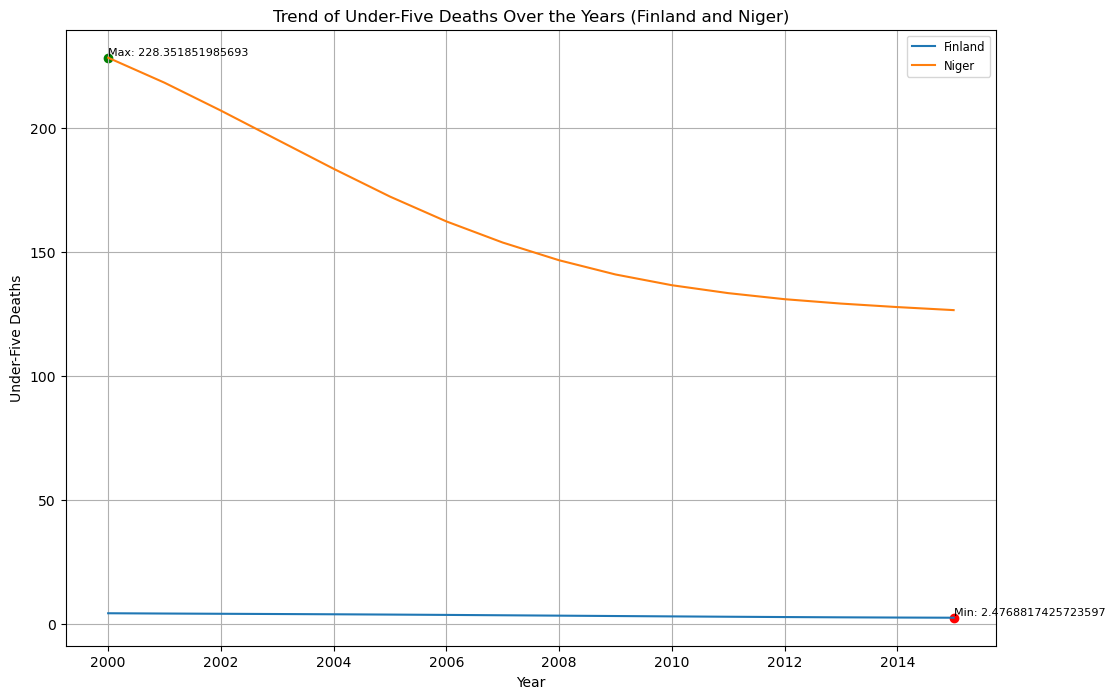

In [206]:
import matplotlib.pyplot as plt

# Filtering the DataFrame for the countries with the minimum and maximum under-five deaths
min_country_data = df_cleaned[df_cleaned['country'] == 'finland']
max_country_data = df_cleaned[df_cleaned['country'] == 'niger']

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(min_country_data['year'], min_country_data['underfive_deaths'], label='Finland')
plt.plot(max_country_data['year'], max_country_data['underfive_deaths'], label='Niger')

# Marking minimum and maximum points
min_val = min_country_data['underfive_deaths'].min()
max_val = max_country_data['underfive_deaths'].max()
min_year = min_country_data.loc[min_country_data['underfive_deaths'] == min_val, 'year'].iloc[0]
max_year = max_country_data.loc[max_country_data['underfive_deaths'] == max_val, 'year'].iloc[0]
plt.scatter([min_year], [min_val], color='red', marker='o')
plt.text(min_year, min_val, f"Min: {min_val}", fontsize=8, verticalalignment='bottom')
plt.scatter([max_year], [max_val], color='green', marker='o')
plt.text(max_year, max_val, f"Max: {max_val}", fontsize=8, verticalalignment='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Under-Five Deaths')
plt.title('Trend of Under-Five Deaths Over the Years (Finland and Niger)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)

# Displaying the plot
plt.show()


In [207]:
# Display all columns in df_cleaned
print(df_cleaned.columns)


Index(['country', 'year', 'life_expectancy', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'polio',
       'total_expenditure', 'diphtheria', 'thinness_1-19_years',
       'thinness_5-9_years', 'schooling', 'gdp', 'population', 'Developing',
       'measles_per_1000', 'adult_mortality', 'underfive_deaths'],
      dtype='object')


# Diphtheria

In [208]:
# Diphtheria

# Compute descriptive statistics for under_five_deaths column
diphtheria_stats = df_cleaned['diphtheria'].describe()

# Display the descriptive statistics
print("Descriptive statistics for diphtheria:")
print(diphtheria_stats)

Descriptive statistics for diphtheria:
count    2872.000000
mean       82.805014
std        23.350157
min         2.000000
25%        79.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: diphtheria, dtype: float64


In [209]:
# Filter rows where 'diphtheria' values are less than or equal to 2
diphtheria_low_values = df_cleaned[df_cleaned['diphtheria'] <= 2]

# Display these rows
print("Rows where diphtheria values are less than or equal to 2:")
print(diphtheria_low_values)


Rows where diphtheria values are less than or equal to 2:
               country  year  life_expectancy  infant_deaths  alcohol  \
817  equatorial_guinea  2014             57.9            3.0     0.01   

     percentage_expenditure  hepatitis_b  measles  polio  total_expenditure  \
817               13.404774          NaN       13   24.0                3.8   

     diphtheria  thinness_1-19_years  thinness_5-9_years  schooling  \
817         2.0                  8.5                 8.4        9.2   

              gdp  population  Developing  measles_per_1000  adult_mortality  \
817  2.176545e+10     1129424           1           0.01151              307   

     underfive_deaths  
817          96.76358  


In [210]:
# Filter to get Equatorial Guinea data for 2013 and 2015
eq_guinea_data = df_cleaned[(df_cleaned['country'] == 'equatorial_guinea') & (df_cleaned['year'].isin([2013, 2015]))]

# Calculate the average diphtheria value
avg_diphtheria = eq_guinea_data['diphtheria'].mean()

# Check if the average is NaN (in case data for 2013 or 2015 is missing), then handle it
if np.isnan(avg_diphtheria):
    print("Data for 2013 or 2015 is missing, cannot compute average.")
else:
    # Replace the diphtheria value for 2014 with this average
    df_cleaned.loc[(df_cleaned['country'] == 'equatorial_guinea') & (df_cleaned['year'] == 2014), 'diphtheria'] = avg_diphtheria
    print("Diphtheria value for Equatorial Guinea in 2014 replaced with average:", avg_diphtheria)


Diphtheria value for Equatorial Guinea in 2014 replaced with average: 9.5


In [211]:
# Filter rows where 'diphtheria' values are less than or equal to 3
diphtheria_low_values = df_cleaned[df_cleaned['diphtheria'] <= 3]

# Display these rows
print("Rows where diphtheria values are less than or equal to 3:")
print(diphtheria_low_values)


Rows where diphtheria values are less than or equal to 3:
                              country  year  life_expectancy  infant_deaths  \
718  democratic_republic_of_the_congo  2001             51.8          227.0   
818                 equatorial_guinea  2013             57.4            3.0   
879                          ethiopia  2000             51.2          253.0   

     alcohol  percentage_expenditure  hepatitis_b  measles  polio  \
718     1.90                0.000000    75.000000     8072    3.0   
818    10.72              156.390769          NaN      321    3.0   
879     0.88               11.594818    64.111111     1660   55.0   

     total_expenditure  diphtheria  thinness_1-19_years  thinness_5-9_years  \
718               2.67         3.0                 12.2                12.1   
818               3.73         3.0                  8.6                 8.6   
879               4.36         3.0                 11.9                11.8   

     schooling           gdp  p

In [212]:
# Filter the DataFrame for the specified countries and years
selected_countries = ['democratic_republic_of_the_congo', 'equatorial_guinea', 'ethiopia']
years_range = range(2000, 2016)  # This range covers 2000 to 2015

filtered_data = df_cleaned[
    (df_cleaned['country'].isin(selected_countries)) & 
    (df_cleaned['year'].isin(years_range))
][['country', 'year', 'diphtheria']]

# Sort the data by country and then by year for better readability
filtered_data = filtered_data.sort_values(by=['country', 'year'])

# Display the filtered data
print(filtered_data)


                              country  year  diphtheria
719  democratic_republic_of_the_congo  2000         4.0
718  democratic_republic_of_the_congo  2001         3.0
717  democratic_republic_of_the_congo  2002        38.0
716  democratic_republic_of_the_congo  2003        41.0
715  democratic_republic_of_the_congo  2004        54.0
714  democratic_republic_of_the_congo  2005         6.0
713  democratic_republic_of_the_congo  2006        62.0
712  democratic_republic_of_the_congo  2007         7.0
711  democratic_republic_of_the_congo  2008        65.0
710  democratic_republic_of_the_congo  2009        72.0
709  democratic_republic_of_the_congo  2010         6.0
708  democratic_republic_of_the_congo  2011        74.0
707  democratic_republic_of_the_congo  2012        75.0
706  democratic_republic_of_the_congo  2013        74.0
705  democratic_republic_of_the_congo  2014         8.0
704  democratic_republic_of_the_congo  2015        81.0
831                 equatorial_guinea  2000     

In [213]:
# Drop the 'diphtheria' column from the DataFrame
df_cleaned.drop('diphtheria', axis=1, inplace=True)

# Verify the column is dropped by displaying the remaining columns
print(df_cleaned.columns)


Index(['country', 'year', 'life_expectancy', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'polio',
       'total_expenditure', 'thinness_1-19_years', 'thinness_5-9_years',
       'schooling', 'gdp', 'population', 'Developing', 'measles_per_1000',
       'adult_mortality', 'underfive_deaths'],
      dtype='object')


In [214]:
# Drop the 'diphtheria' column from the DataFrame
df_cleaned.drop('measles', axis=1, inplace=True)

# Verify the column is dropped by displaying the remaining columns
print(df_cleaned.columns)


Index(['country', 'year', 'life_expectancy', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'polio', 'total_expenditure',
       'thinness_1-19_years', 'thinness_5-9_years', 'schooling', 'gdp',
       'population', 'Developing', 'measles_per_1000', 'adult_mortality',
       'underfive_deaths'],
      dtype='object')


## Data Exploration

Visualization shows that gdp, schooling, and income composition of resources have a positive relationship with life expectancy.

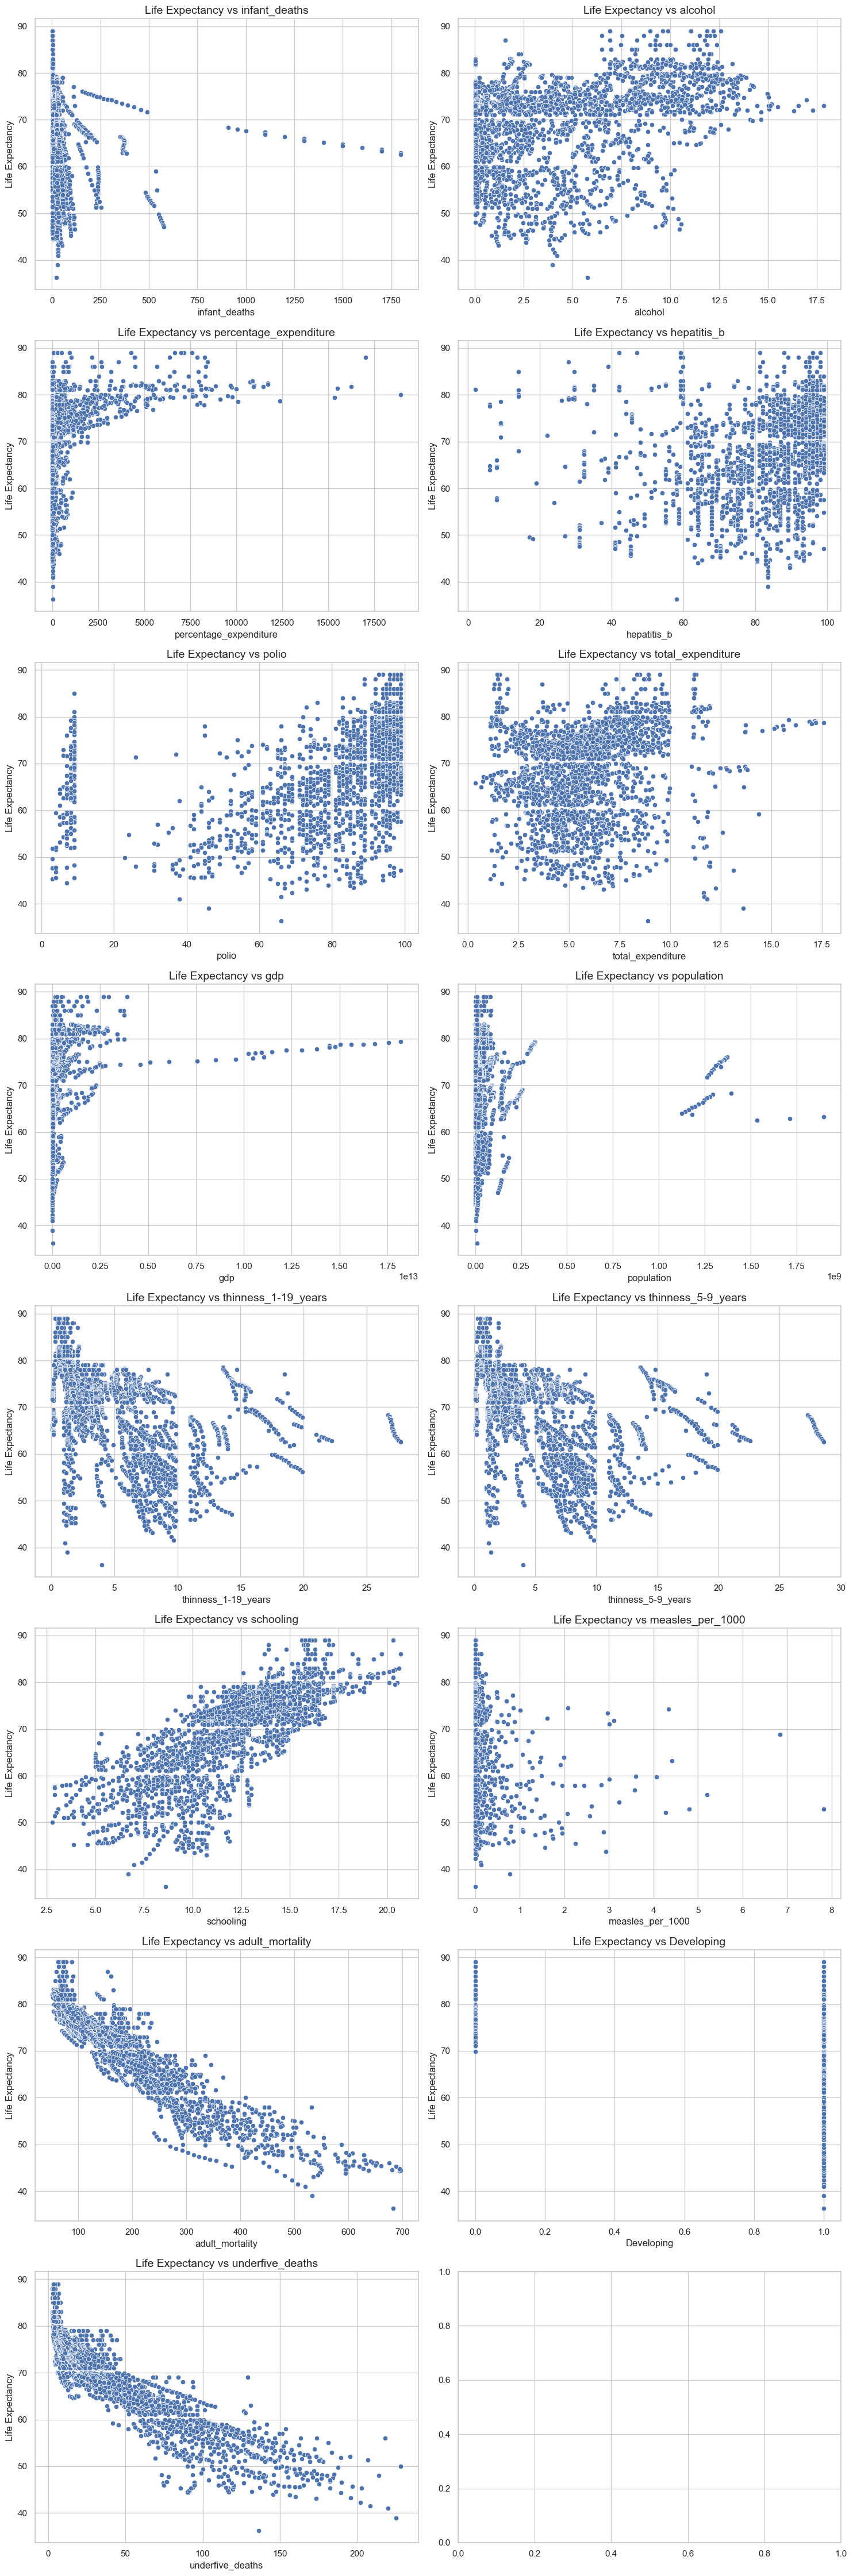

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of columns to plot
variables = ['infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 
             'polio', 'total_expenditure', 'gdp', 'population',
             'thinness_1-19_years', 'thinness_5-9_years',
            'schooling', 'measles_per_1000',
             'adult_mortality', 'Developing', 'underfive_deaths']

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 45))  

# Flatten the array of axes, so it's easier to iterate over
axes = axes.flatten()

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(variables):
    sns.scatterplot(data=df_cleaned, x=var, y='life_expectancy', ax=axes[i])
    axes[i].set_title(f'Life Expectancy vs {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Life Expectancy', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



In [216]:
import numpy as np
import statsmodels.api as sm

# Check for any infinite values and replace them
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values in the dataset
print(df_cleaned.isnull().sum())

# Option 1: Drop rows with any NaN values
df_cleaned = df_cleaned.dropna()

# Option 2: Fill NaN values with the mean or median of the column
# df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Re-run the regression
X = df_cleaned.drop(['life_expectancy', 'country'], axis=1)
X = sm.add_constant(X)
Y = df_cleaned['life_expectancy']

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())




country                     0
year                        0
life_expectancy             0
infant_deaths               0
alcohol                     0
percentage_expenditure      0
hepatitis_b               160
polio                       8
total_expenditure           0
thinness_1-19_years         0
thinness_5-9_years          0
schooling                   0
gdp                         0
population                  0
Developing                  0
measles_per_1000            0
adult_mortality             0
underfive_deaths            0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     3181.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        00:53:32   Log-Likeliho

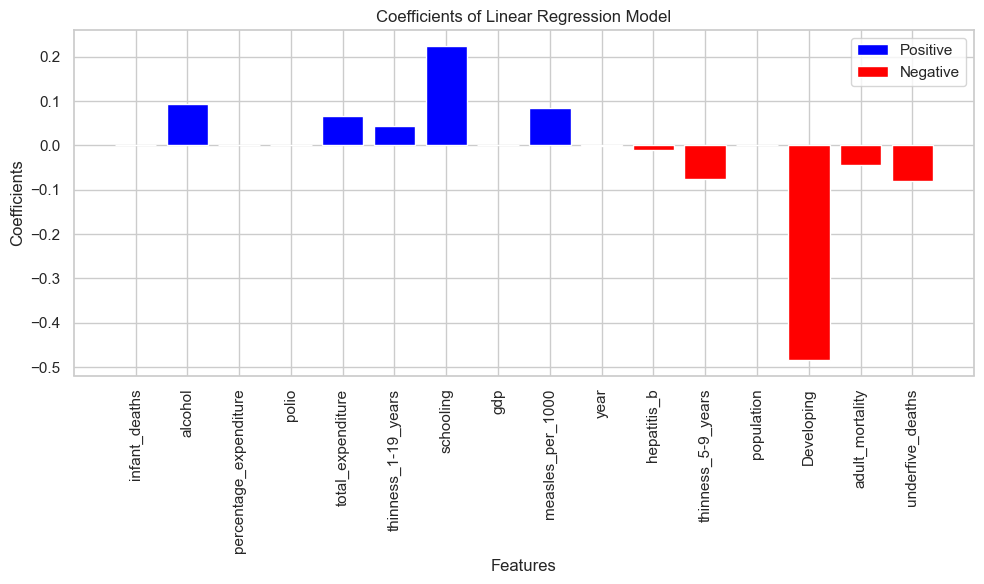

In [217]:
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coefficients = results.params.drop('const')
features = coefficients.index

# Plot coefficients
plt.figure(figsize=(10, 6))

# Plot positive coefficients in blue
plt.bar(features[coefficients >= 0], coefficients[coefficients >= 0], color='blue', label='Positive')

# Plot negative coefficients in red
plt.bar(features[coefficients < 0], coefficients[coefficients < 0], color='red', label='Negative')

plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of Linear Regression Model')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [218]:
# Second model

# Fit the model
model = sm.OLS(Y, X)
results = model.fit()

# Manually assign names to significant coefficients
significant_coefficients_names = {
    'alcohol': results.params['alcohol'],
    'percentage_expenditure': results.params['percentage_expenditure'],
    'hepatitis_b': results.params['hepatitis_b'],
    'total_expenditure': results.params['total_expenditure'],
    'thinness_5-9_years': results.params['thinness_5-9_years'],
    'schooling': results.params['schooling'],
    'gdp': results.params['gdp'],
    'Developing': results.params['Developing'],
    'adult_mortality': results.params['adult_mortality'],
    'underfive_deaths': results.params['underfive_deaths']
}

# Print the manually named significant coefficients
print("Significant Coefficients:")
for name, coefficient in significant_coefficients_names.items():
    print(f"{name}: {coefficient}")


Significant Coefficients:
alcohol: 0.09238962160497333
percentage_expenditure: 0.0002307681279964263
hepatitis_b: -0.009270101366159175
total_expenditure: 0.06745122500381467
thinness_5-9_years: -0.07630622061120806
schooling: 0.2239414103469588
gdp: 1.0463095544154735e-13
Developing: -0.4833979625707747
adult_mortality: -0.043987154891180366
underfive_deaths: -0.08133771427925335


In [219]:
import statsmodels.api as sm

# Define the significant variables
significant_variables = ['alcohol', 'percentage_expenditure', 'hepatitis_b', 
                         'total_expenditure', 'thinness_5-9_years', 'schooling', 
                         'gdp', 'Developing', 'adult_mortality', 'underfive_deaths']

# Filter the X matrix to include only the significant variables
X_significant = X[significant_variables]

# Add a constant column to the features matrix
X_significant = sm.add_constant(X_significant)

# Fit the OLS model with significant variables
model_significant = sm.OLS(Y, X_significant)
results_significant = model_significant.fit()

# Print the OLS summary for the significant variables
print(results_significant.summary())


                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     4771.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        00:53:33   Log-Likelihood:                -5931.9
No. Observations:                2712   AIC:                         1.189e+04
Df Residuals:                    2701   BIC:                         1.195e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     78

In [220]:
# Third model

# Group the data by country and calculate the average life expectancy
grouped_le = df_cleaned.groupby('country')['life_expectancy'].mean()

# Sort the countries based on average life expectancy
sorted_le_countries = grouped_le.sort_values(ascending=False)

# Find the top 2 and bottom 2 countries
top_2_le_countries = sorted_le_countries.head(2)
bottom_2_le_countries = sorted_le_countries.tail(2)

print("Top 2 countries with highest life expectancy:")
print(top_2_le_countries)
print("\nBottom 2 countries with lowest life expectancy:")
print(bottom_2_le_countries)


Top 2 countries with highest life expectancy:
country
sweden    82.51875
france    82.21875
Name: life_expectancy, dtype: float64

Bottom 2 countries with lowest life expectancy:
country
central_african_republic    48.5125
sierra_leone                46.1125
Name: life_expectancy, dtype: float64


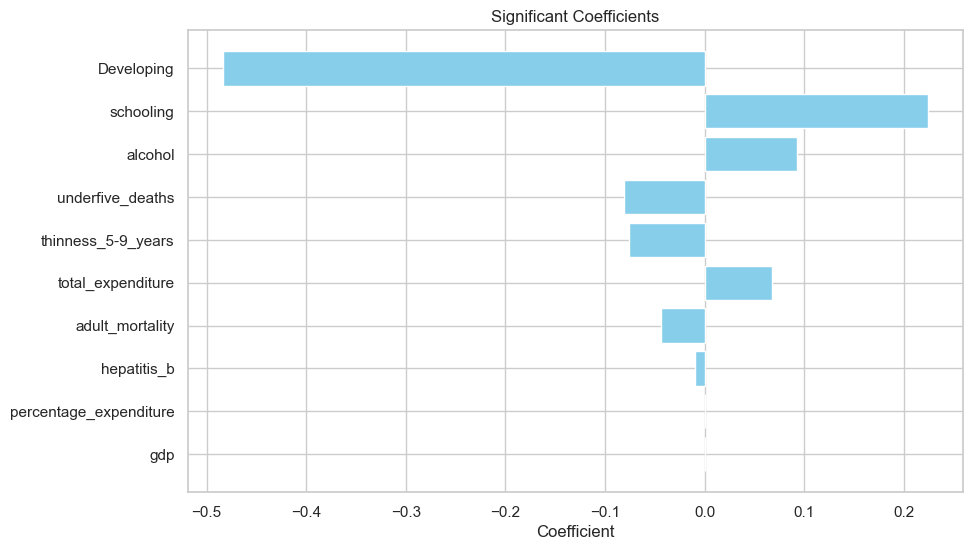

In [221]:
# Sort coefficients by magnitude
sorted_coefficients = significant_coefficients_names.items()
sorted_coefficients = sorted(sorted_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Extract variable names and coefficients
variables = [item[0] for item in sorted_coefficients]
coefficients = [item[1] for item in sorted_coefficients]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(variables, coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.title('Significant Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients at the top
plt.show()


In [ ]:
gsgdsg